# Ultrasonic Exploratory Data Analysis

This notebook will be exploring data from sensor using the version 2 platform.

The data collection procedure was as following
1. Mount arduino on the platform. During this Data collection we used arduino 1 only
2. Mount Ultrasonic Sensor that will be tested on to breadboard
3. Upload "automate_data_collection_v1.ino" and run "US_datacollection_v4.py"
4. Starting from delay 16800us and run "S" which is a sequence of datacollection that will automatically move the surface closer to ultrasonic sensor with set increments.
5. Repeat it by adjust delay into 10000us, 8000us,6000us, and 3000us 

## Load Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define the folder path
folder_path = '../ultra_sonic_sensor/fully_automate/data_v4'

# Check if the folder exists and list the files
if os.path.exists(folder_path):
    # Generate list of file paths
    file_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv')]
    print("List of CSV files:", file_paths)
else:
    print("Folder not found")

List of CSV files: ['../ultra_sonic_sensor/fully_automate/data_v4\\data_v4data_merged_w_Nan.csv', '../ultra_sonic_sensor/fully_automate/data_v4\\test_seq_ard1_sensor1_11_05_36_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4\\test_seq_ard1_sensor1_11_10_16_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4\\test_seq_ard1_sensor1_11_14_19_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4\\test_seq_ard1_sensor1_13_05_40_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4\\test_seq_ard1_sensor1_13_08_46_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4\\test_seq_ard1_sensor2_13_18_12_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4\\test_seq_ard1_sensor2_13_20_17_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4\\test_seq_ard1_sensor2_13_22_45_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4\\test_seq_ard1_sensor2_13_24_59_27062024.csv', '../ultra_sonic_sensor/fully_automate/data_v4\\test_seq_ard1_sens

In [2]:
def merge_csv_files(file_paths):
    """
    Merge multiple CSV files into a single DataFrame.

    Parameters:
    file_paths (list of str): List of file paths to the CSV files.

    Returns:
    DataFrame: Merged DataFrame containing data from all input CSV files.
    """
    dataframes = []
    for file in file_paths:
        df = pd.read_csv(file)
        dataframes.append(df)

    # Concatenate all DataFrames
    merged_df = pd.concat(dataframes, ignore_index=True)
    
    return merged_df

In [3]:
# Merge CSV files
merged_df = merge_csv_files(file_paths)
merged_df

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  Steps  \
0          0           3964             53            3039       16800      0   
1          1           3964             53            3043       16800      0   
2          2           3952             53            3035       16800      0   
3          3           3956             53            3035       16800      0   
4          4           3960             53            3039       16800      0   
...      ...            ...            ...             ...         ...    ...   
71995     95           9256             12             699        8000  10480   
71996     96           9280             12             723        8000  10480   
71997     97           9280             12             727        8000  10480   
71998     98           9260             12             699        8000  10480   
71999     99           9276             12             723        8000  10480   

       Arduino ID  Sensor ID  Range (cm)  Sensor length (cm)  ...  \
0              11          3          53                 NaN  ...   
1              11          3          53                 NaN  ...   
2              11          3          53                 NaN  ...   
3              11          3          53                 NaN  ...   
4              11          3          53                 NaN  ...   
...           ...        ...         ...                 ...  ...   
71995           1          6          13                 NaN  ...   
71996           1          6          13                 NaN  ...   
71997           1          6          13                 NaN  ...   
71998           1          6          13                 NaN  ...   
71999           1          6          13                 NaN  ...   

      Angle on XY plane  side a (cm)  side b (cm)  side c (cm)  \
0                   NaN          NaN          NaN          NaN   
1                   NaN          NaN          NaN          NaN   
2                   NaN          NaN          NaN          NaN   
3                   NaN          NaN          NaN          NaN   
4                   NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...   
71995               NaN          NaN          NaN          NaN   
71996               NaN          NaN          NaN          NaN   
71997               NaN          NaN          NaN          NaN   
71998               NaN          NaN          NaN          NaN   
71999               NaN          NaN          NaN          NaN   

       Angle on YZ plane  Sensor Configuration  Sensor Angle  \
0                    NaN                   NaN           NaN   
1                    NaN                   NaN           NaN   
2                    NaN                   NaN           NaN   
3                    NaN                   NaN           NaN   
4                    NaN                   NaN           NaN   
...                  ...                   ...           ...   
71995                NaN                   NaN           NaN   
71996                NaN                   NaN           NaN   
71997                NaN                   NaN           NaN   
71998                NaN                   NaN           NaN   
71999                NaN                   NaN           NaN   

       Surface material Surface Length (cm)  Surface Width (cm)  
0                  wood                 NaN                 NaN  
1                  wood                 NaN                 NaN  
2                  wood                 NaN                 NaN  
3                  wood                 NaN                 NaN  
4                  wood                 NaN                 NaN  
...                 ...                 ...                 ...  
71995              wood                 NaN                 NaN  
71996              wood                 NaN                 NaN  
71997              wood                 NaN      

In [4]:
merged_df.columns

Index(['Trial', 'Ping Duration', 'Distance (cm)', 'Ping Time (us)',
       'Delay (us)', 'Steps', 'Arduino ID', 'Sensor ID', 'Range (cm)',
       'Sensor length (cm)', 'Color of sensor', 'Angle on XY plane',
       'side a (cm)', 'side b (cm)', 'side c (cm)', 'Angle on YZ plane',
       'Sensor Configuration', 'Sensor Angle', 'Surface material',
       'Surface Length (cm)', 'Surface Width (cm)'],
      dtype='object')

In [5]:
df_step_zero=merged_df[merged_df.Steps == 0]
df_step_zero

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  Steps  \
0          0           3964             53            3039       16800      0   
1          1           3964             53            3043       16800      0   
2          2           3952             53            3035       16800      0   
3          3           3956             53            3035       16800      0   
4          4           3960             53            3039       16800      0   
...      ...            ...            ...             ...         ...    ...   
70895     95          11608             53            3047        8000      0   
70896     96          11604             53            3051        8000      0   
70897     97          11596             53            3047        8000      0   
70898     98          11600             53            3051        8000      0   
70899     99          11604             53            3051        8000      0   

       Arduino ID  Sensor ID  Range (cm)  Sensor length (cm)  ...  \
0              11          3          53                 NaN  ...   
1              11          3          53                 NaN  ...   
2              11          3          53                 NaN  ...   
3              11          3          53                 NaN  ...   
4              11          3          53                 NaN  ...   
...           ...        ...         ...                 ...  ...   
70895           1          6          53                 NaN  ...   
70896           1          6          53                 NaN  ...   
70897           1          6          53                 NaN  ...   
70898           1          6          53                 NaN  ...   
70899           1          6          53                 NaN  ...   

      Angle on XY plane  side a (cm)  side b (cm)  side c (cm)  \
0                   NaN          NaN          NaN          NaN   
1                   NaN          NaN          NaN          NaN   
2                   NaN          NaN          NaN          NaN   
3                   NaN          NaN          NaN          NaN   
4                   NaN          NaN          NaN          NaN   
...                 ...          ...          ...          ...   
70895               NaN          NaN          NaN          NaN   
70896               NaN          NaN          NaN          NaN   
70897               NaN          NaN          NaN          NaN   
70898               NaN          NaN          NaN          NaN   
70899               NaN          NaN          NaN          NaN   

       Angle on YZ plane  Sensor Configuration  Sensor Angle  \
0                    NaN                   NaN           NaN   
1                    NaN                   NaN           NaN   
2                    NaN                   NaN           NaN   
3                    NaN                   NaN           NaN   
4                    NaN                   NaN           NaN   
...                  ...                   ...           ...   
70895                NaN                   NaN           NaN   
70896                NaN                   NaN           NaN   
70897                NaN                   NaN           NaN   
70898                NaN                   NaN           NaN   
70899                NaN                   NaN           NaN   

       Surface material Surface Length (cm)  Surface Width (cm)  
0                  wood                 NaN                 NaN  
1                  wood                 NaN                 NaN  
2                  wood                 NaN                 NaN  
3                  wood                 NaN                 NaN  
4                  wood                 NaN                 NaN  
...                 ...                 ...                 ...  
70895              wood                 NaN                 NaN  
70896              wood                 NaN                 NaN  
70897              wood                 NaN      

In [6]:
df_step_zero["Range (cm)"].unique()

array([53], dtype=int64)

In [7]:
df_step_zero[df_step_zero["Range (cm)"] != 53]

Empty DataFrame
Columns: [Trial, Ping Duration, Distance (cm), Ping Time (us), Delay (us), Steps, Arduino ID, Sensor ID, Range (cm), Sensor length (cm), Color of sensor, Angle on XY plane, side a (cm), side b (cm), side c (cm), Angle on YZ plane, Sensor Configuration, Sensor Angle, Surface material, Surface Length (cm), Surface Width (cm)]
Index: []

[0 rows x 21 columns]

### Clean data 

Remove columns with NaN. Currently NaN column are irrelevant so would be dropped

In [8]:
# Remove columns with any NaN values
cleaned_df = merged_df.dropna(axis=1)
cleaned_df

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  Steps  \
0          0           3964             53            3039       16800      0   
1          1           3964             53            3043       16800      0   
2          2           3952             53            3035       16800      0   
3          3           3956             53            3035       16800      0   
4          4           3960             53            3039       16800      0   
...      ...            ...            ...             ...         ...    ...   
71995     95           9256             12             699        8000  10480   
71996     96           9280             12             723        8000  10480   
71997     97           9280             12             727        8000  10480   
71998     98           9260             12             699        8000  10480   
71999     99           9276             12             723        8000  10480   

       Arduino ID  Sensor ID  Range (cm) Color of sensor Surface material  
0              11          3          53               b             wood  
1              11          3          53               b             wood  
2              11          3          53               b             wood  
3              11          3          53               b             wood  
4              11          3          53               b             wood  
...           ...        ...         ...             ...              ...  
71995           1          6          13               b             wood  
71996           1          6          13               b             wood  
71997           1          6          13               b             wood  
71998           1          6          13               b             wood  
71999           1          6          13               b             wood  

[72000 rows x 11 columns]

## Visual analysis on effect of delay and range on Ping Time 

### Visualization by Range

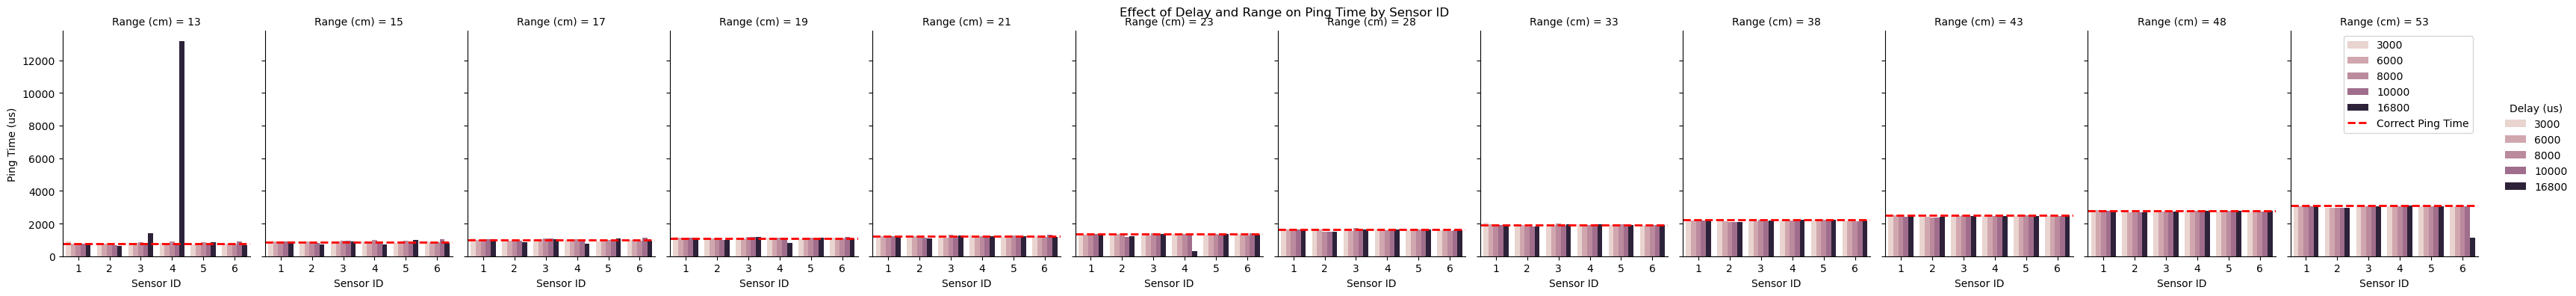

In [9]:
# Function to visualize the effect of delay and range on ping time
def visualize_delay_and_range_effect_on_ping_time(df):
    """
    Visualize the effect of delay and range on ping time.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    
    # Group by sensor ID, delay, and range, then calculate the mean ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])['Ping Time (us)'].mean().reset_index()
    
    # Create the visualization
    g = sns.catplot(
        x='Sensor ID', 
        y='Ping Time (us)', 
        hue='Delay (us)', 
        col='Range (cm)', 
        data=grouped_df, 
        kind='bar', 
        height=4, 
        aspect=0.7
    )
    
    # Add horizontal lines for correct ping times based on range
    for ax in g.axes.flatten():
        range_val = float(ax.get_title().split('=')[1].strip())
        correct_ping_time = (2 * range_val / 100) / 343 * 1e6
        ax.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
    
    plt.subplots_adjust(top=0.9)
    plt.suptitle('Effect of Delay and Range on Ping Time by Sensor ID')
    plt.legend()
    plt.show()


# Visualize the effect of delay and range on ping time
visualize_delay_and_range_effect_on_ping_time(cleaned_df)


we can see there are notable outliers present for each sensor in particular ranges. Most notable thing from this graph is sensor 4 where sometime it gives over and under measurement while it is on delay 16800. Later will be printing bigger graph to investigate this further. 

So far there are some distinct characteristics been catured and this will later be captured through machine learning method for characterization. 

In [10]:
# Function to visualize the effect of delay and range on ping time
def visualize_delay_and_range_effect_on_ping_time(df, target = 0):
    """
    Visualize the effect of delay and range on ping time.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    # Group by sensor ID, delay, and range, then calculate the mean ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])['Ping Time (us)'].mean().reset_index()
    # Create individual plots for each range
    unique_ranges = grouped_df['Range (cm)'].unique()
    
    if target == 0:
        for range_val in unique_ranges:
            subset_df = grouped_df[grouped_df['Range (cm)'] == range_val]
            plt.figure(figsize=(14, 10))
            sns.barplot(
                x='Sensor ID', 
                y='Ping Time (us)', 
                hue='Delay (us)', 
                data=subset_df
            )
            
            correct_ping_time = (2 * range_val / 100) / 343 * 1e6
            plt.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
            
            plt.title(f'Effect of Delay on Ping Time by Sensor ID for Range {range_val} cm')
            plt.xlabel('Sensor ID')
            plt.ylabel('Mean Ping Time (us)')
            plt.legend(title='Delay (us)')
            plt.xticks(rotation=45)
            # Adjust y-axis limits and ticks for better precision
            min_ping_time = subset_df['Ping Time (us)'].min()
            max_ping_time = subset_df['Ping Time (us)'].max()
            plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
            plt.yticks(range(int(min_ping_time) - 50, int(max_ping_time) + 50, 50))  # Adjust the step as needed
            plt.show()
    else:
        if target in unique_ranges:
            subset_df = grouped_df[grouped_df['Range (cm)'] == target]
            plt.figure(figsize=(14, 10))
            sns.barplot(
                x='Sensor ID', 
                y='Ping Time (us)', 
                hue='Delay (us)', 
                data=subset_df
            )
            
            correct_ping_time = (2 * target / 100) / 343 * 1e6
            plt.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
            
            plt.title(f'Effect of Delay on Ping Time by Sensor ID for Range {target} cm')
            plt.xlabel('Sensor ID')
            plt.ylabel('Mean Ping Time (us)')
            plt.legend(title='Delay (us)')
            plt.xticks(rotation=45)
            # Adjust y-axis limits and ticks for better precision
            min_ping_time = subset_df['Ping Time (us)'].min()
            max_ping_time = subset_df['Ping Time (us)'].max()
            plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
            plt.yticks(range(int(min_ping_time) - 50, int(max_ping_time) + 50, 50))  # Adjust the step as needed
            plt.show()

This function will be generating graph in bigger scale for better analysis.

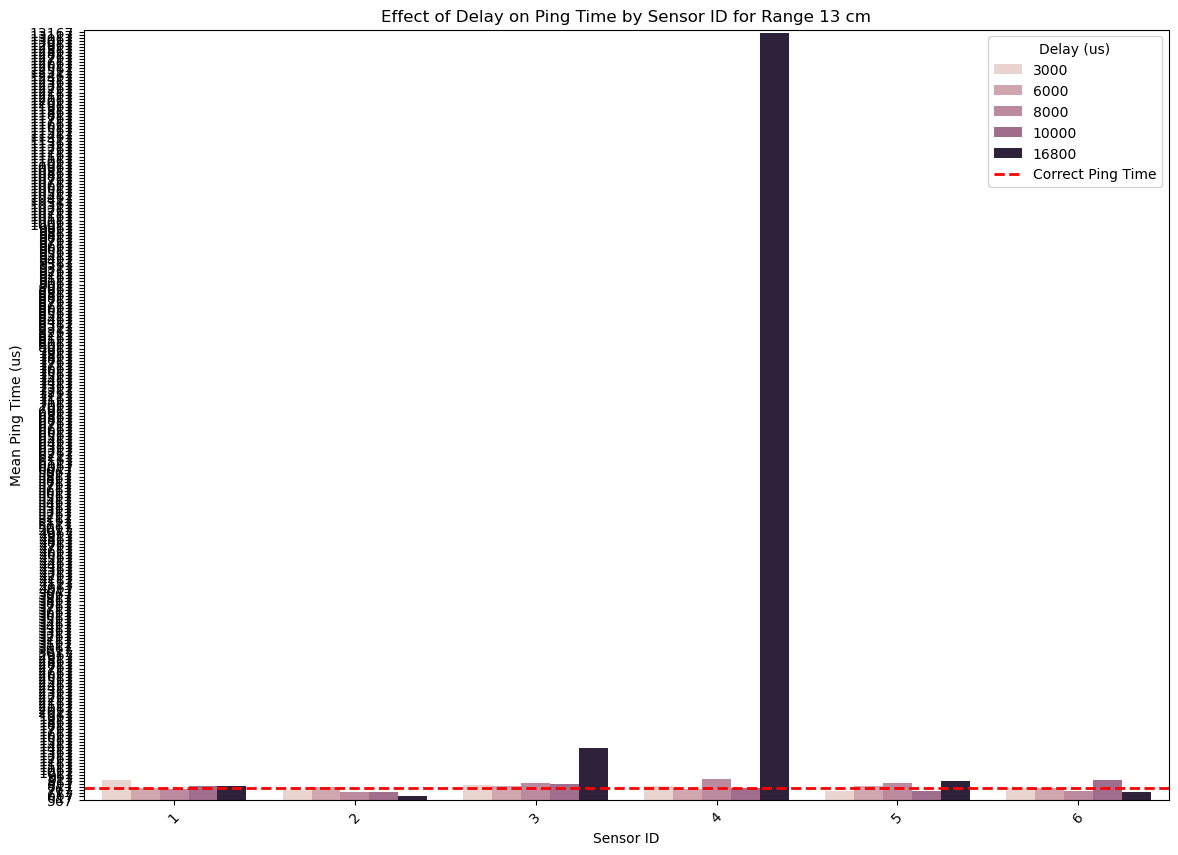

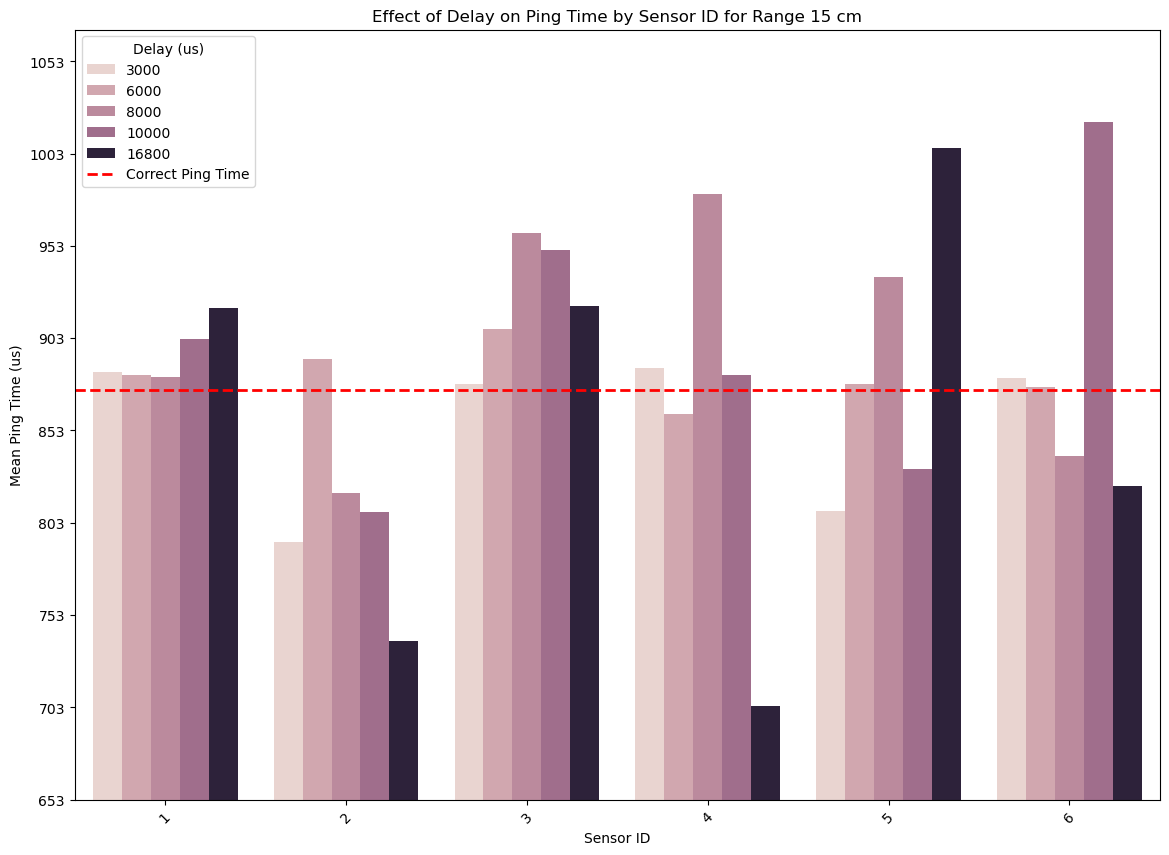

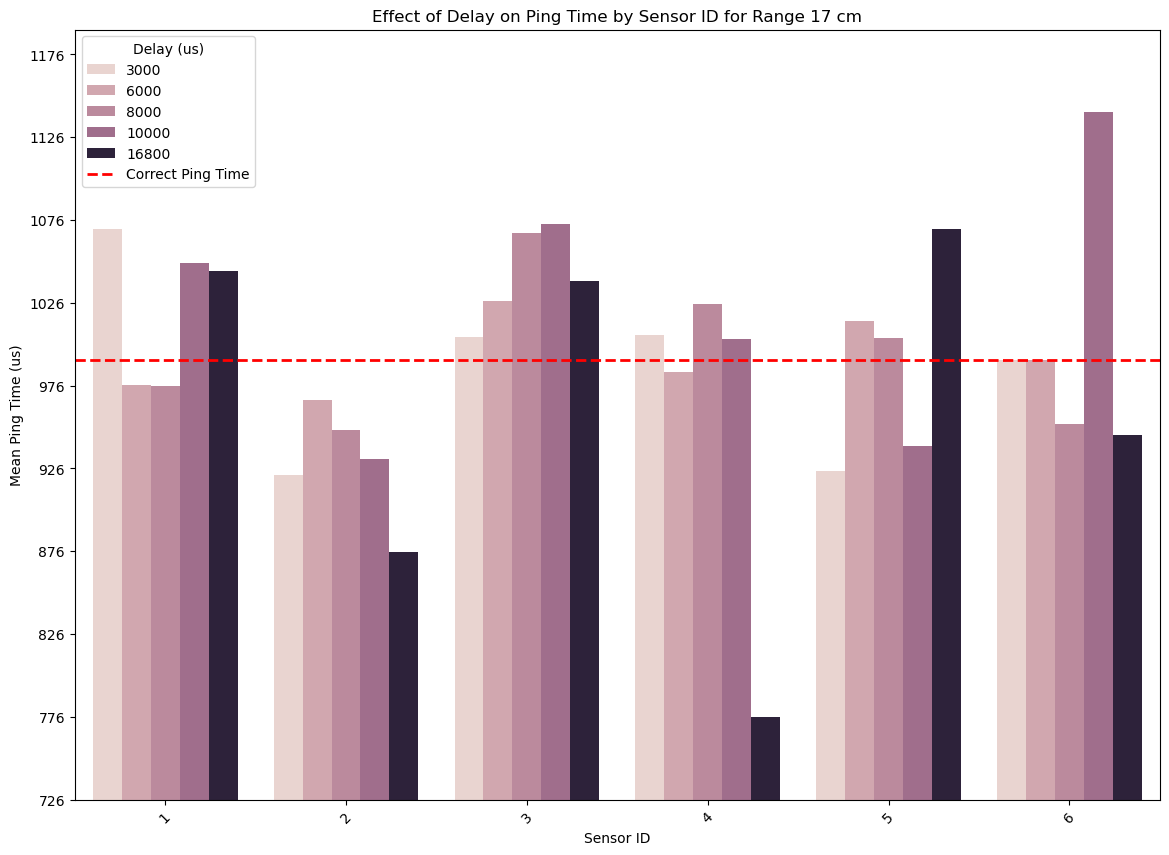

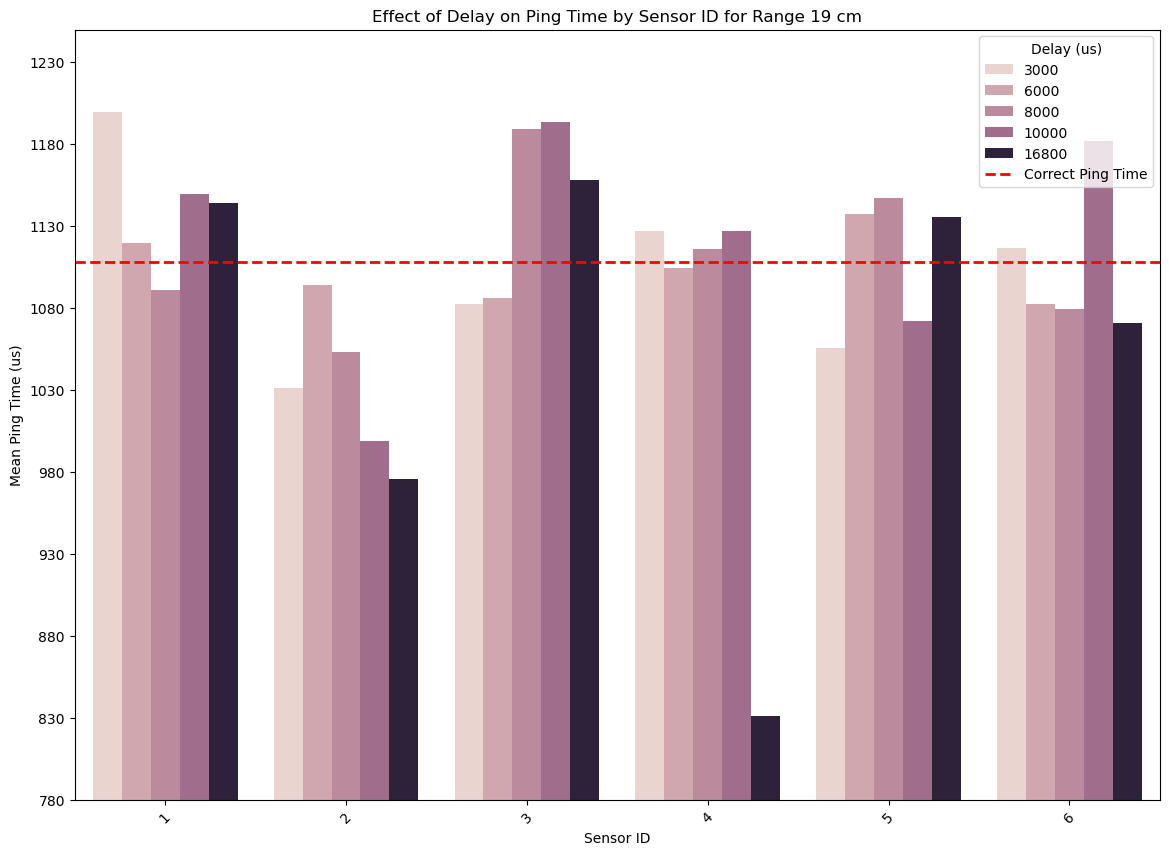

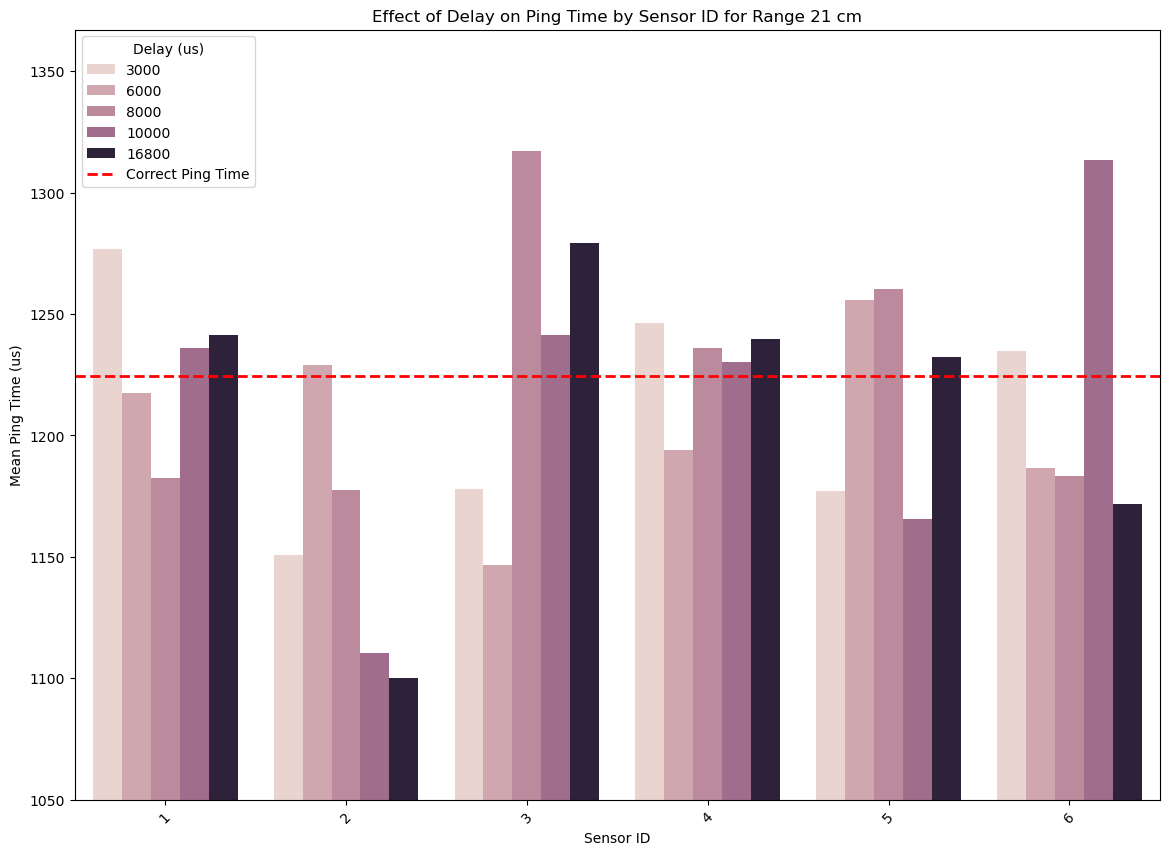

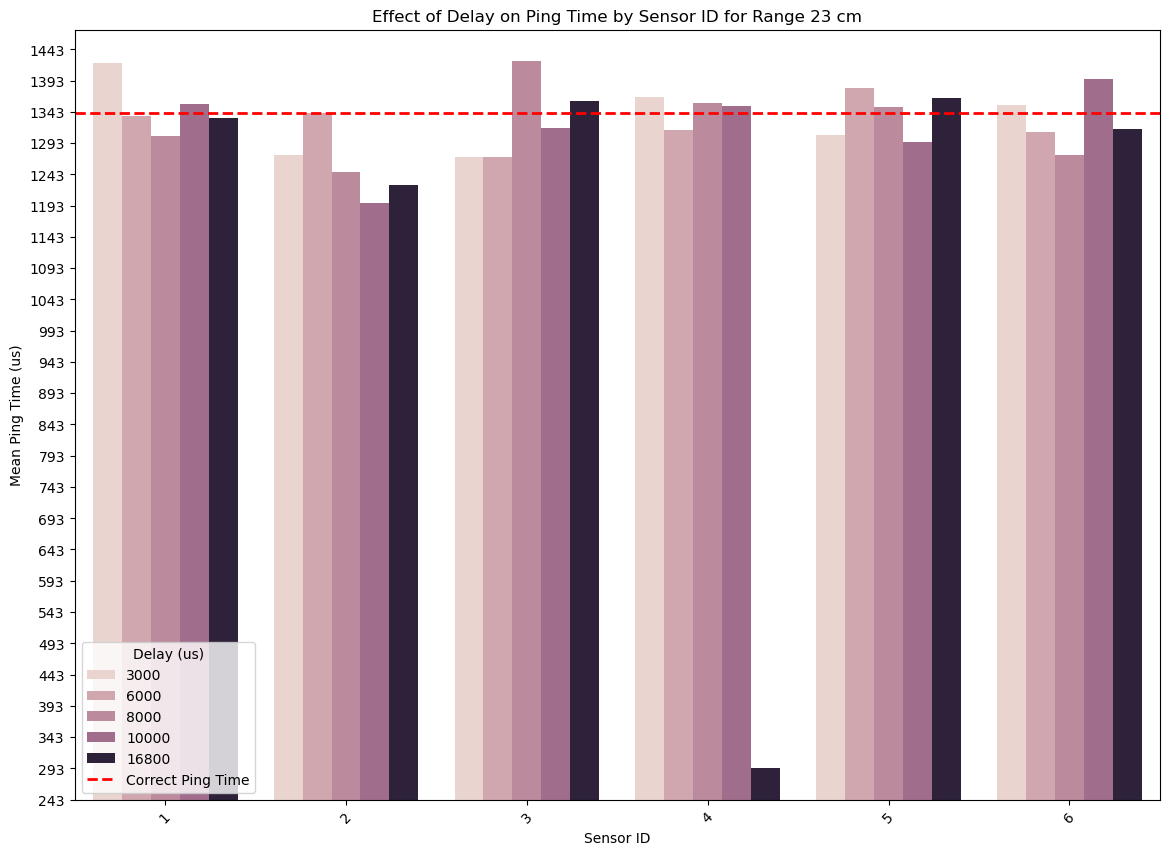

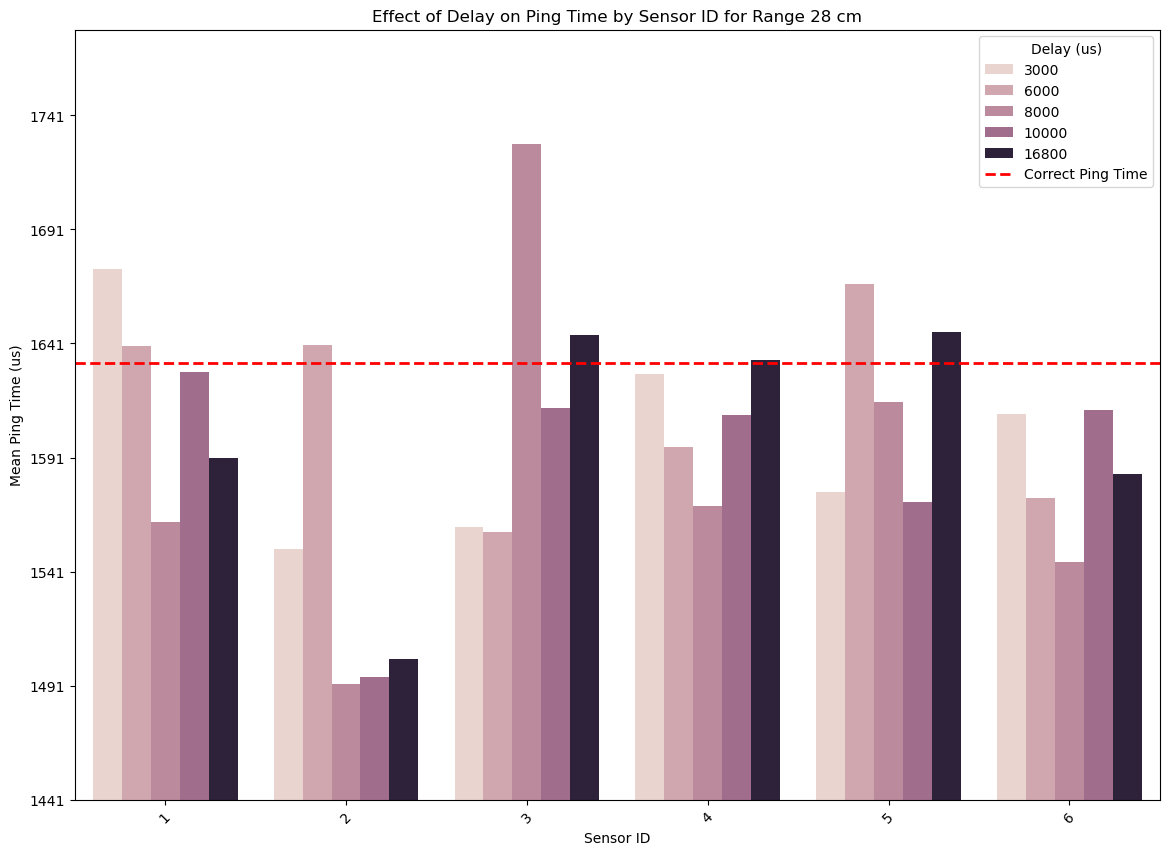

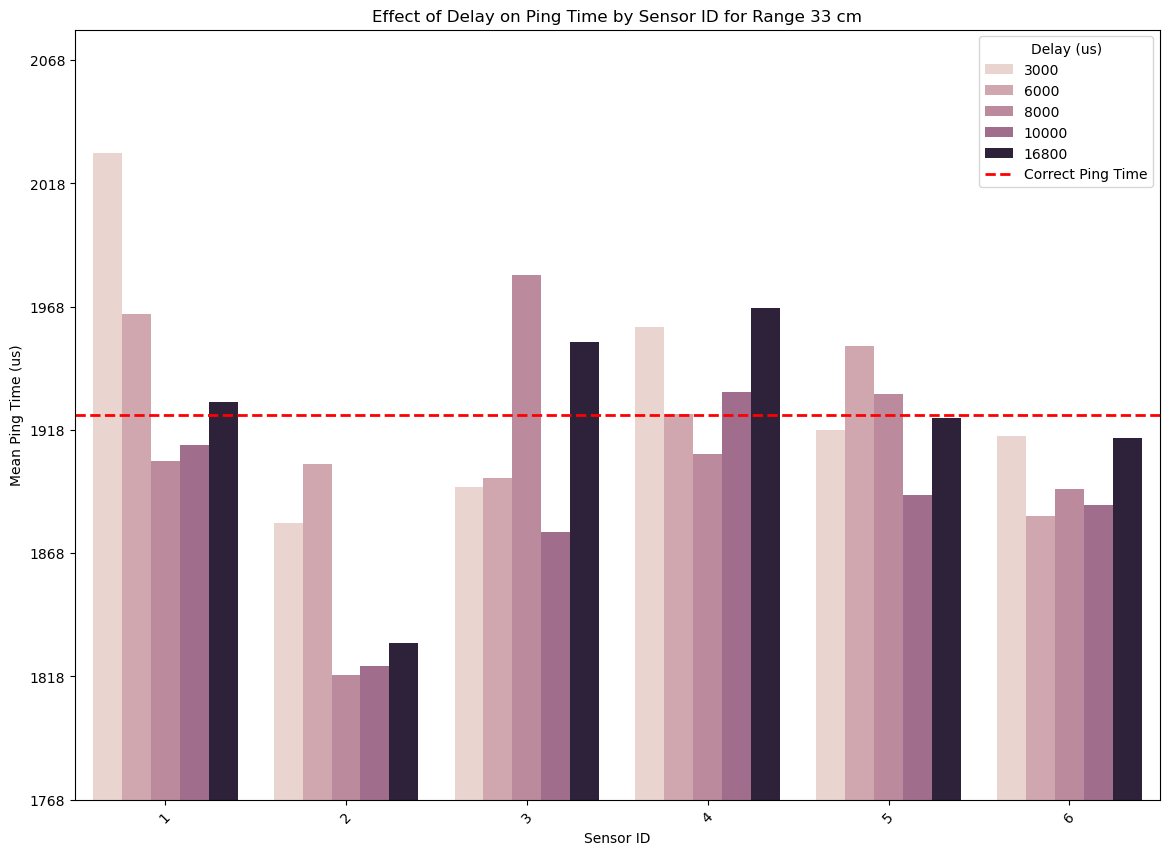

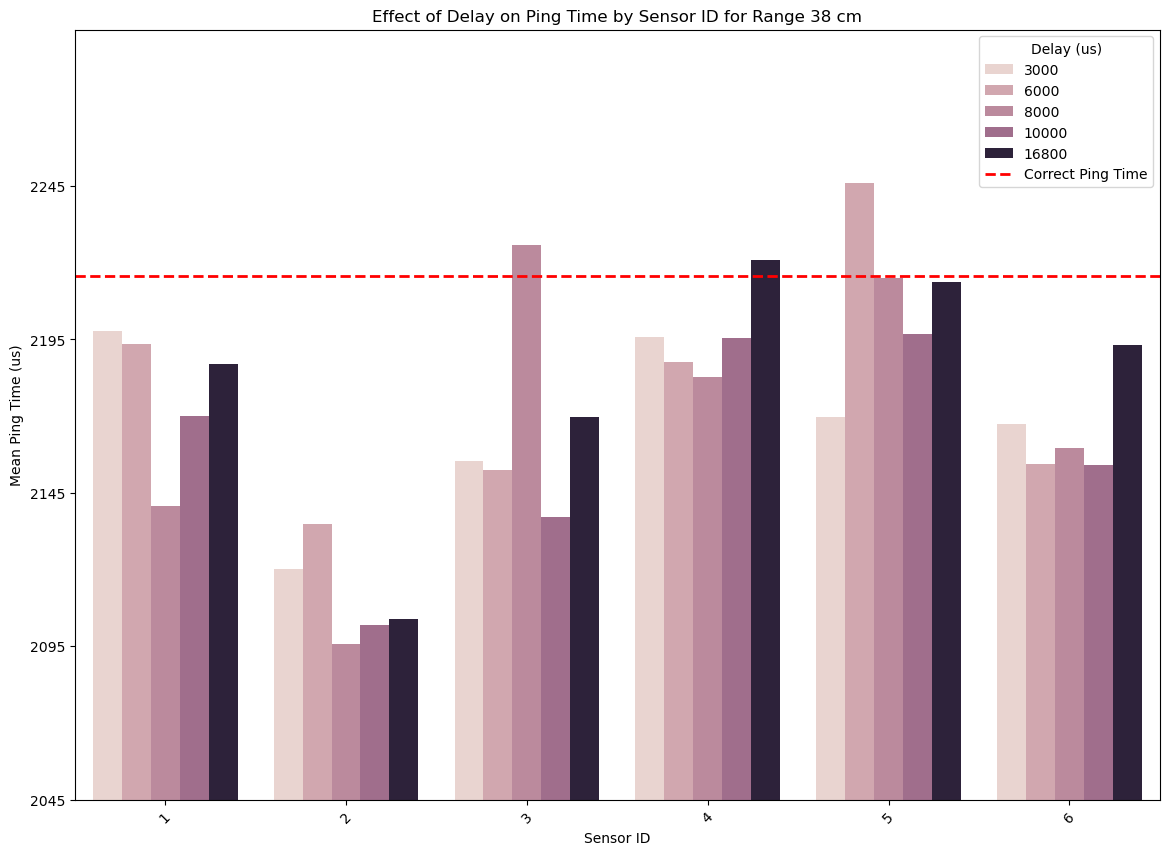

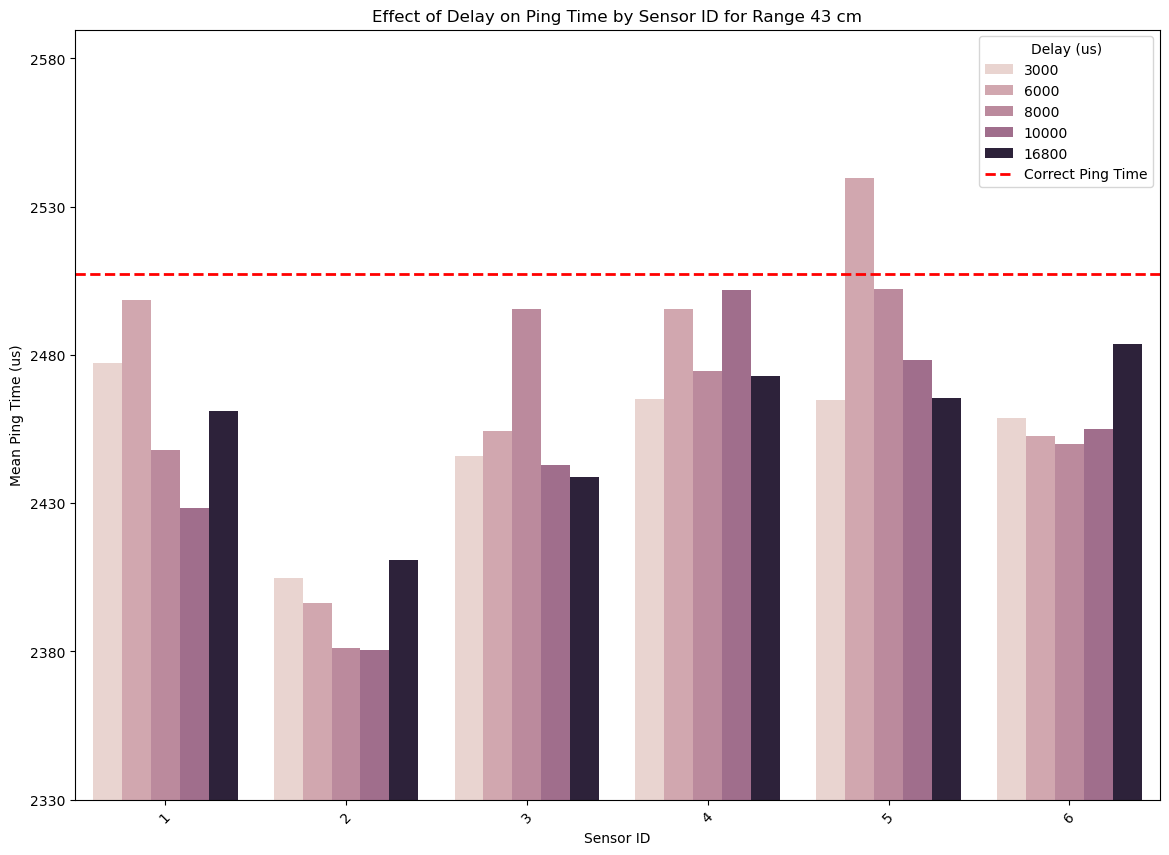

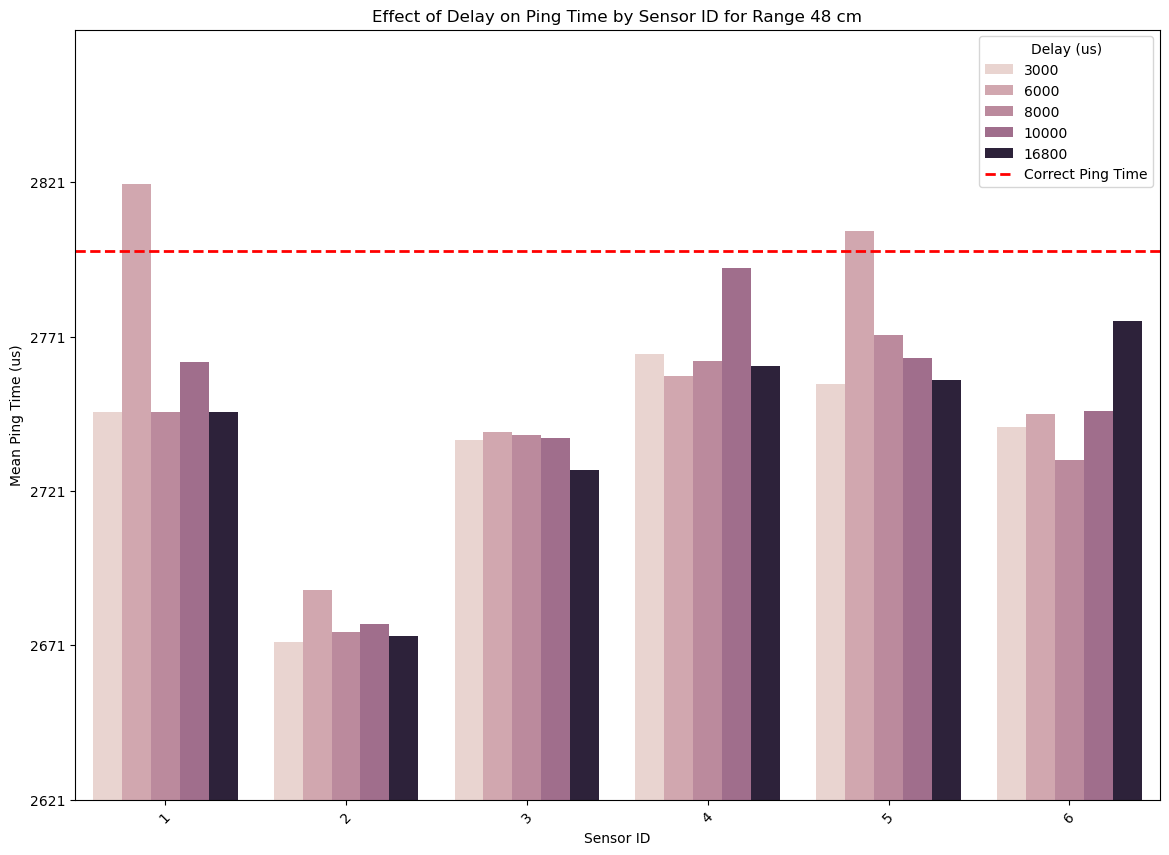

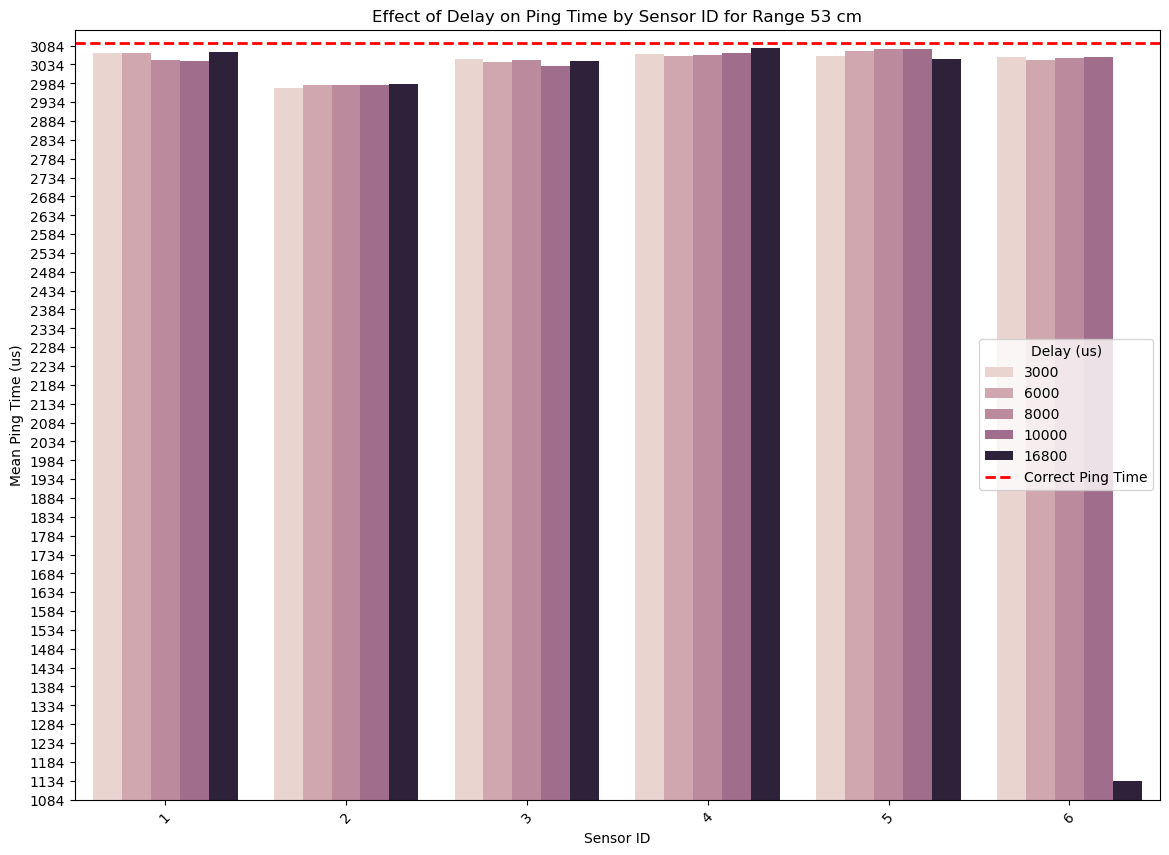

In [11]:
# Print all
visualize_delay_and_range_effect_on_ping_time(cleaned_df)

Sensor 1:
 - under measure
 - Constently struggle to under measure when delay is 8000

 Sensor 2: 
 - in general under measure by big time
 - most stable while its delay 6000 

 Sensor 3:
 - under measure 
 - however with delay 8000 it tends to over measure

 Sensor 4:
 - When its delay 16800 it fail to measure correctly and fails miserably.

 Sensor 5:
 - Constant over estimation at delay 6000

 Sensor 6:
 - Surprisingly with delay 16800 they are in consistent

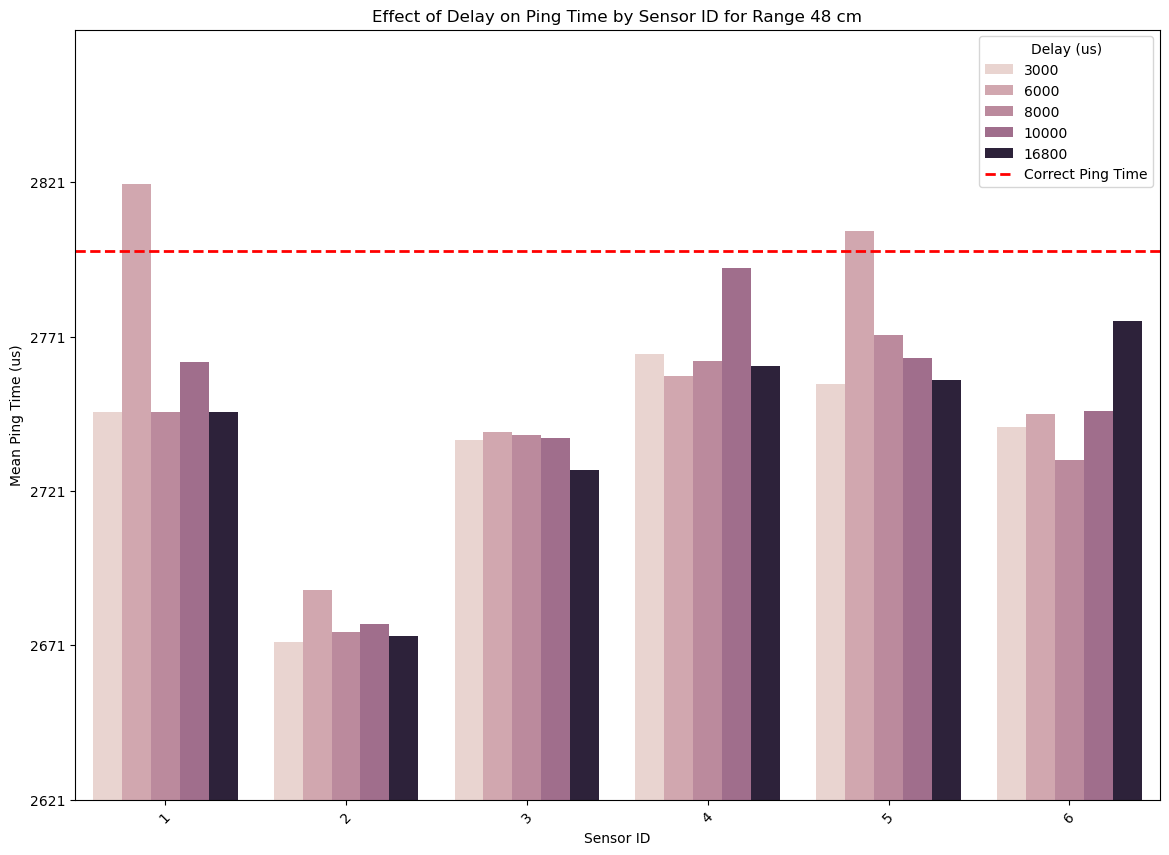

In [12]:
visualize_delay_and_range_effect_on_ping_time(cleaned_df, 48)

### Visualization by Sensor

Do another analysis based on sensors

In [13]:
# Function to visualize the effect of delay and range on ping time
def visualize_effect_on_ping_time_sensors(df, target = 0):
    """
    Visualize the effect of delay and range on ping time.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    # Group by sensor ID, delay, and range, then calculate the mean ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])['Ping Time (us)'].mean().reset_index()
    # Create individual plots for each range
    unique_sensors = grouped_df['Sensor ID'].unique()
    
    if target == 0:
        for id_val in unique_sensors:
            subset_df = grouped_df[grouped_df['Sensor ID'] == id_val]
            plt.figure(figsize=(14, 10))
            sns.barplot(
                x='Range (cm)', 
                y='Ping Time (us)', 
                hue='Delay (us)', 
                data=subset_df
            )
            
            plt.title(f'Effect of Delay on Ping Time by Range on Sensor {id_val}')
            plt.xlabel('Range (cm)')
            plt.ylabel('Mean Ping Time (us)')
            plt.legend(title='Delay (us)')
            plt.xticks(rotation=45)
            # Adjust y-axis limits and ticks for better precision
            min_ping_time = subset_df['Ping Time (us)'].min()
            max_ping_time = subset_df['Ping Time (us)'].max()
            plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
            plt.yticks(range(int(min_ping_time) - 50, int(max_ping_time) + 50, 50))  # Adjust the step as needed
            plt.show()
    else:
        if target in unique_sensors:
            subset_df = grouped_df[grouped_df['Sensor ID'] == target]
            plt.figure(figsize=(14, 10))
            sns.barplot(
                x='Range (cm)', 
                y='Ping Time (us)', 
                hue='Delay (us)', 
                data=subset_df
            )
            
            plt.title(f'Effect of Delay on Ping Time by Range on Sensor {target}')
            plt.xlabel('Range (cm)')
            plt.ylabel('Mean Ping Time (us)')
            plt.legend(title='Delay (us)')
            plt.xticks(rotation=45)
            # Adjust y-axis limits and ticks for better precision
            min_ping_time = subset_df['Ping Time (us)'].min()
            max_ping_time = subset_df['Ping Time (us)'].max()
            plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
            plt.yticks(range(int(min_ping_time) - 50, int(max_ping_time) + 50, 50))  # Adjust the step as needed
            plt.show()

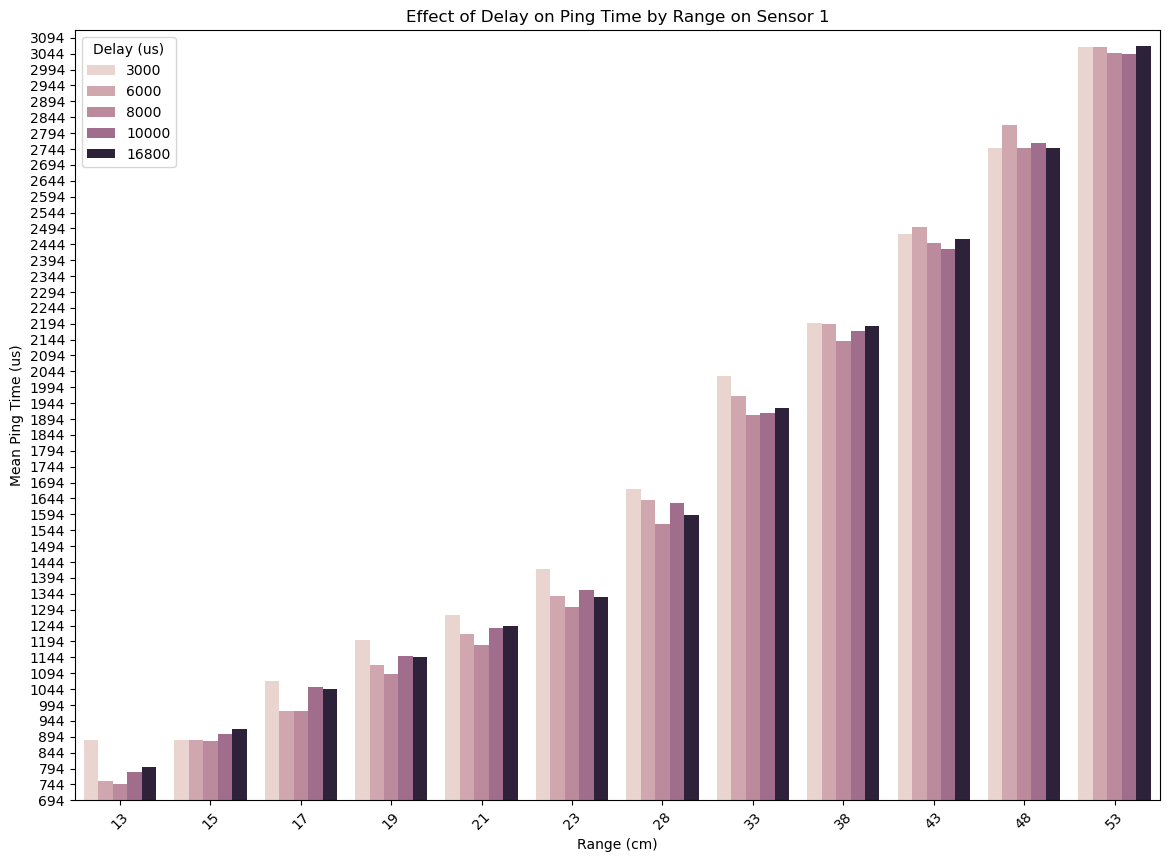

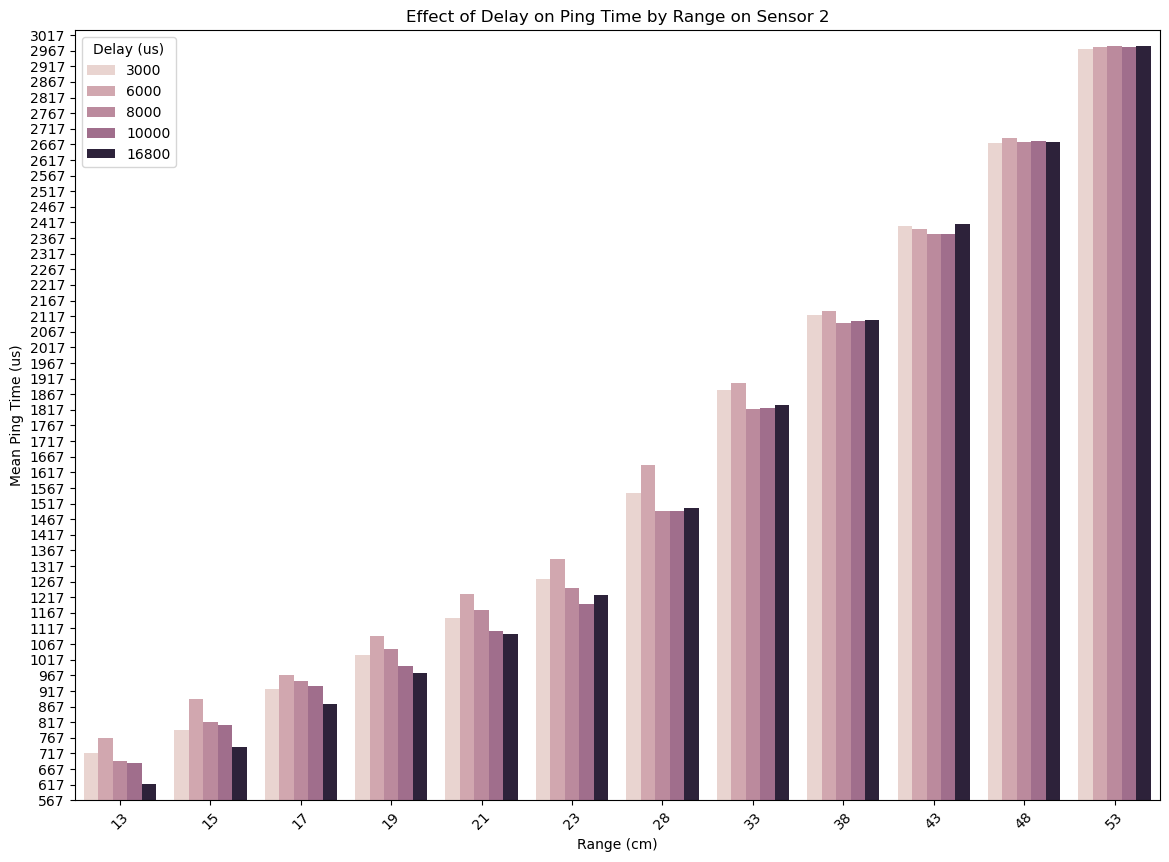

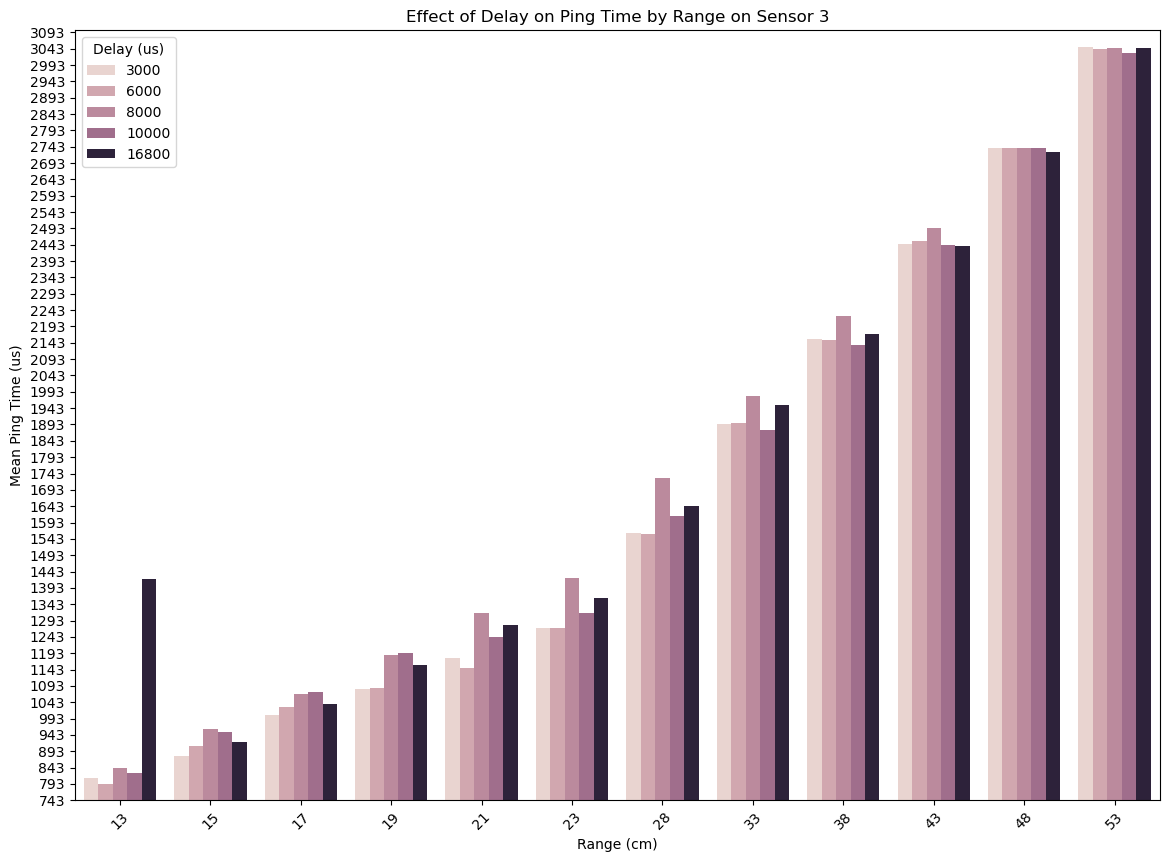

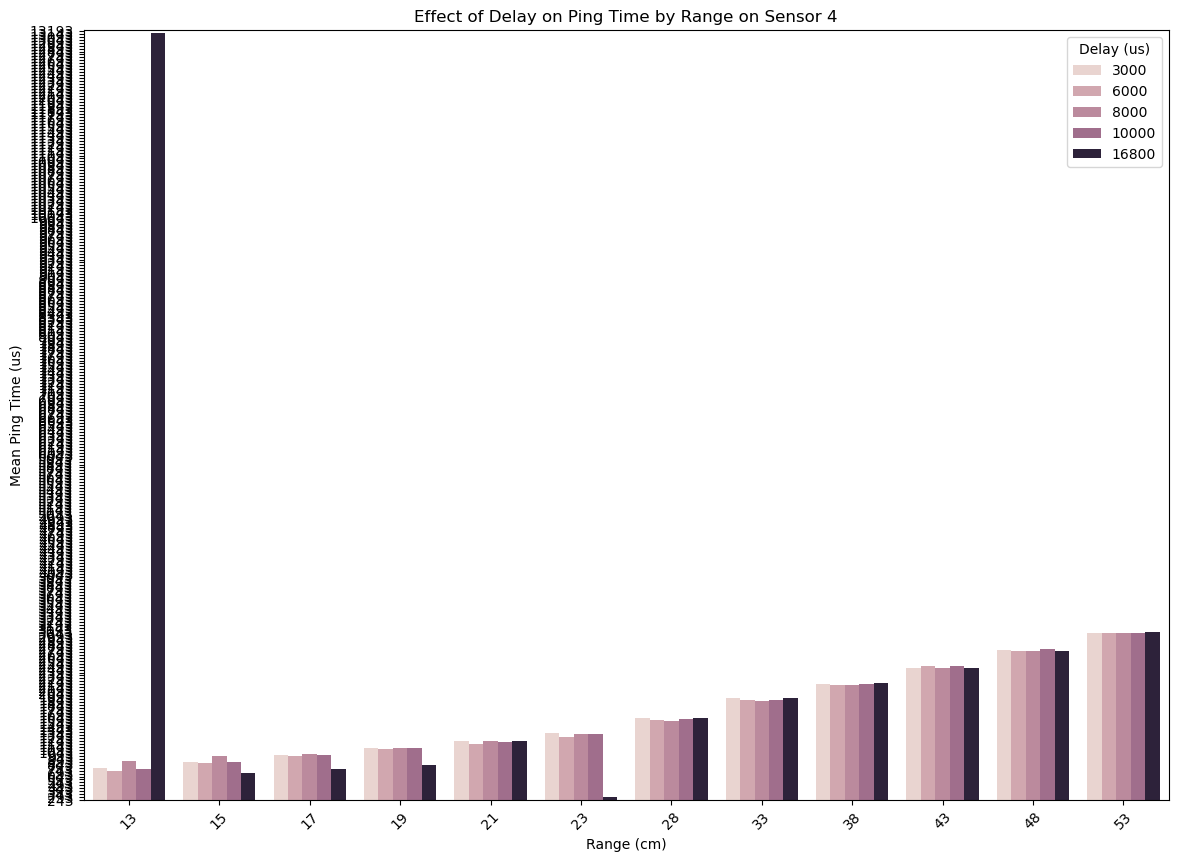

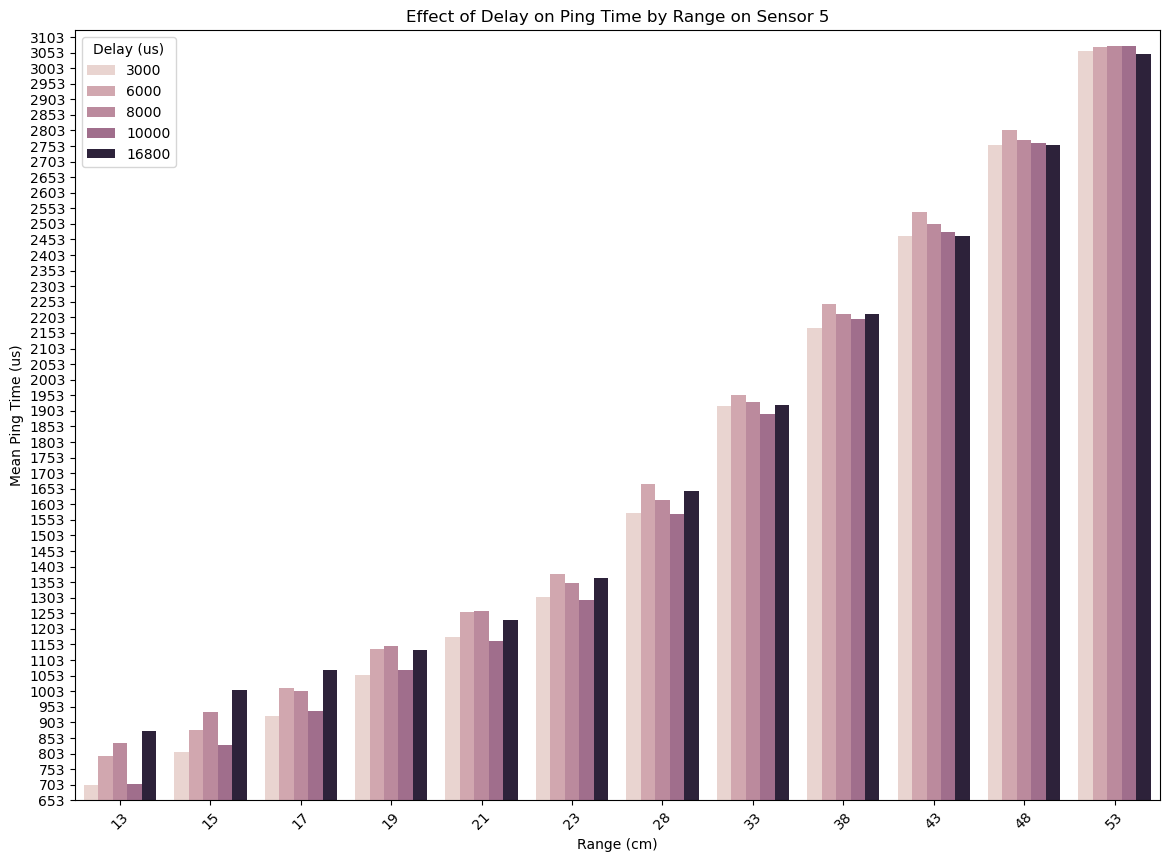

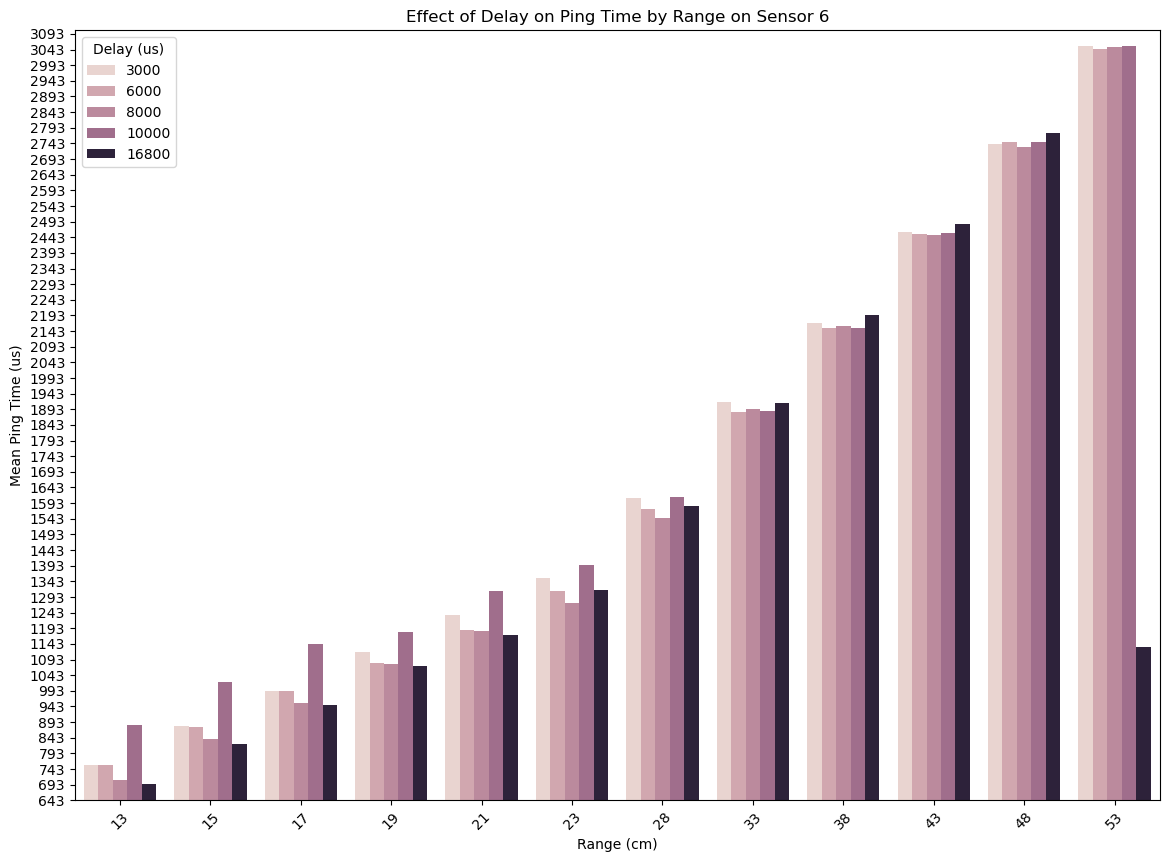

In [14]:
visualize_effect_on_ping_time_sensors(cleaned_df)

From these graph we can see that the each sensor have distinct graph shapes. This make the outlook of the project to characterize the sensor more promising.

### Line plot by range

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


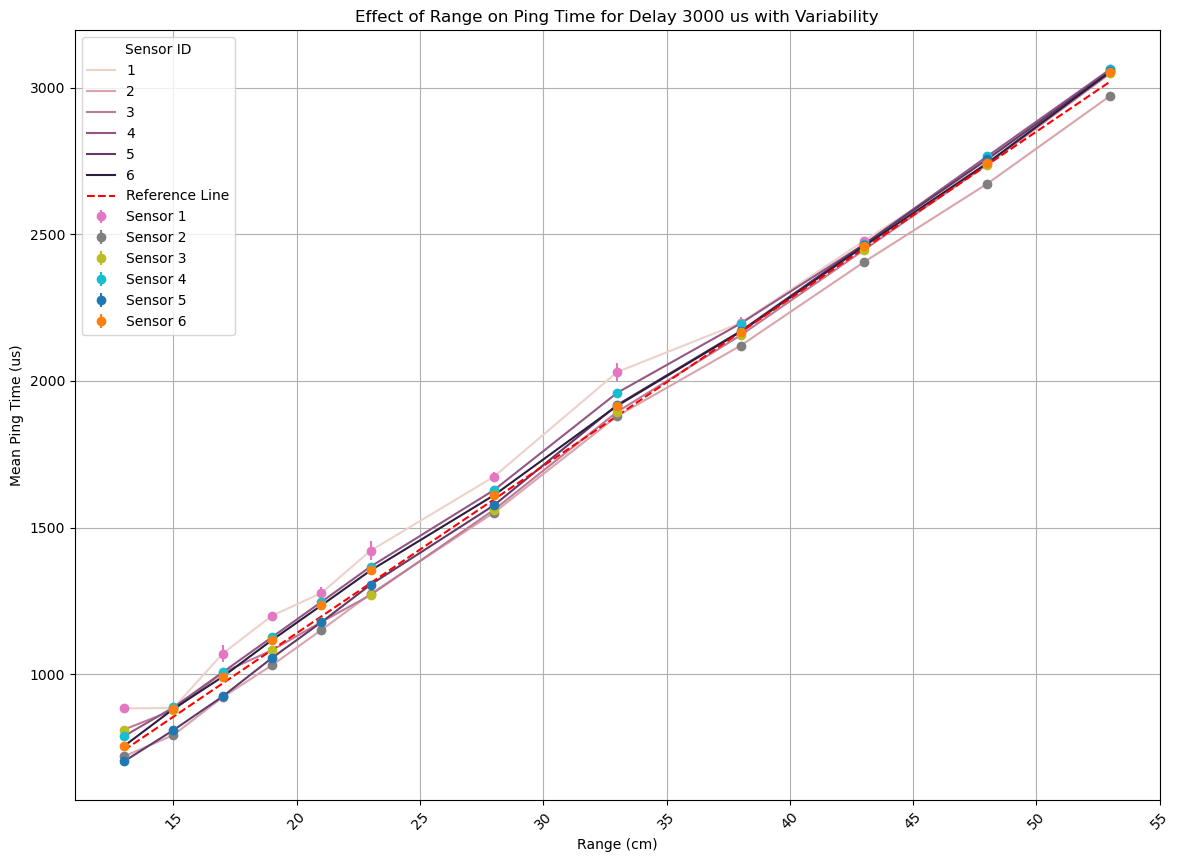

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


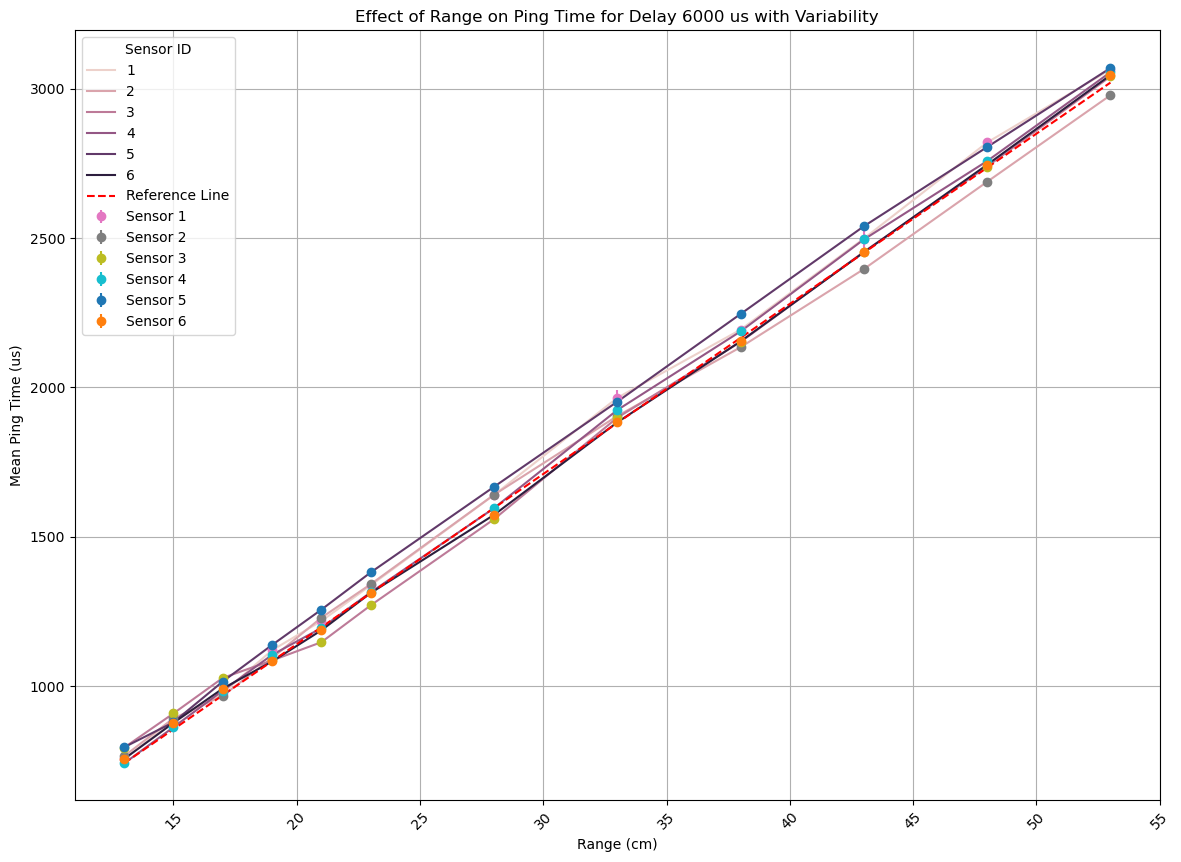

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


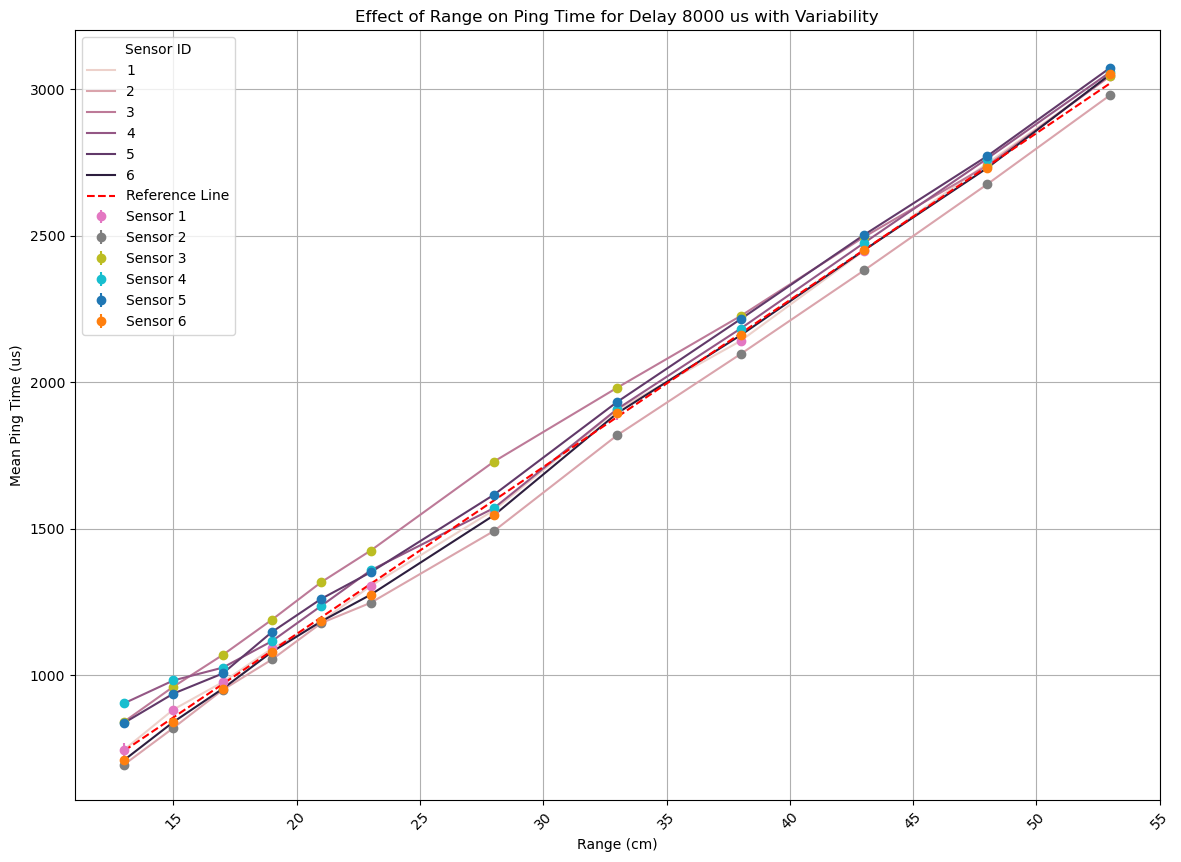

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


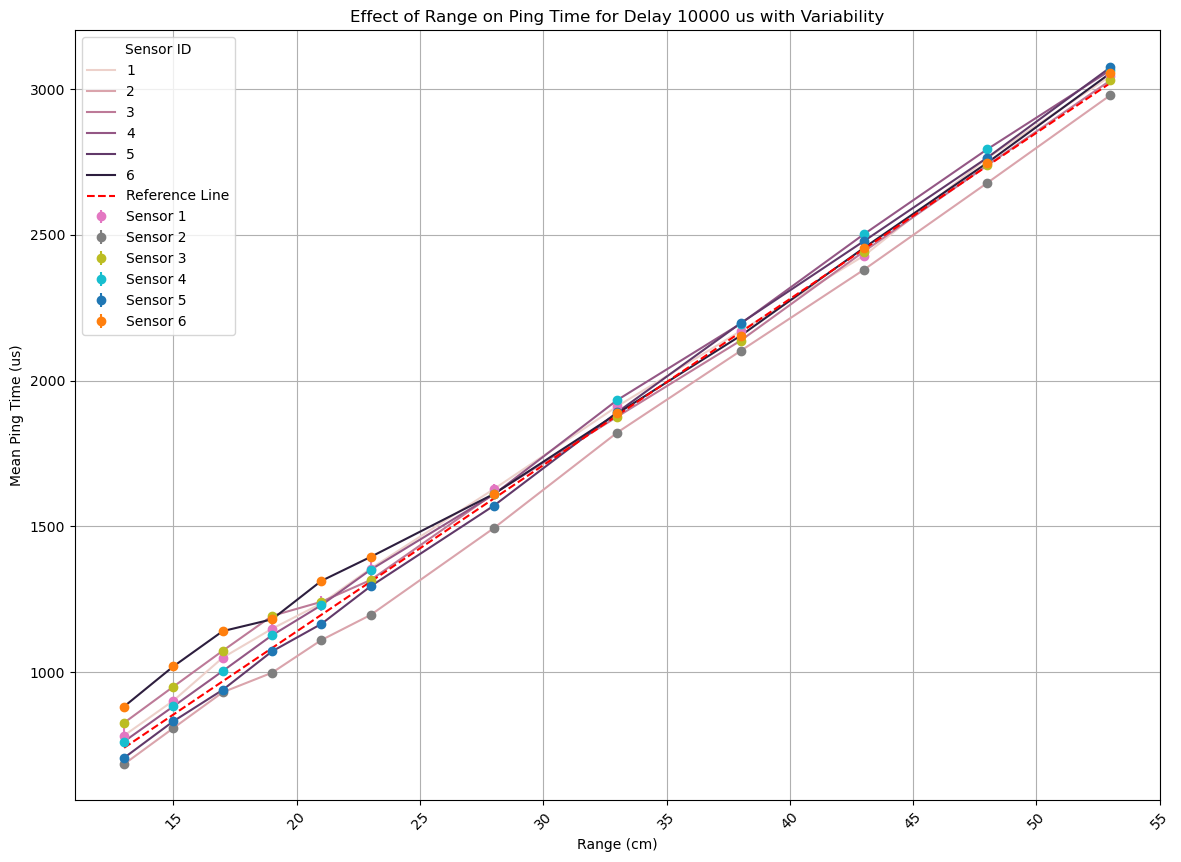

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


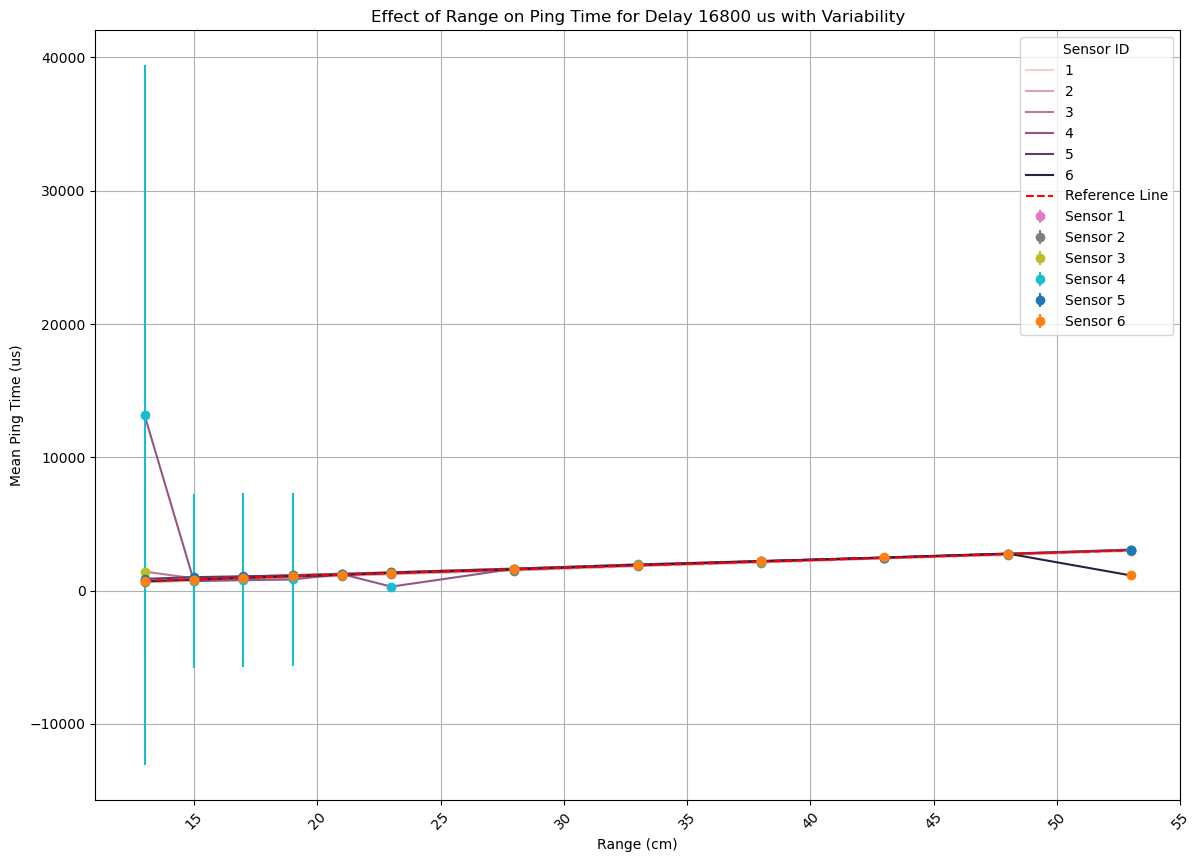

In [15]:
def visualize_lineplot_ping_time_with_variability(df):
    """
    Visualize the effect of range on ping time for each delay separately with variability.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    # Group by sensor ID, delay, and range, then calculate the mean and standard deviation of ping time
    grouped_df = df.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)']).agg(
        mean_ping_time=('Ping Time (us)', 'mean'),
        std_ping_time=('Ping Time (us)', 'std')
    ).reset_index()

    # Get unique delays
    unique_delays = grouped_df['Delay (us)'].unique()

    for delay in unique_delays:
        plt.figure(figsize=(14, 10))
        subset_df = grouped_df[grouped_df['Delay (us)'] == delay]
        sns.lineplot(
            x='Range (cm)', 
            y='mean_ping_time', 
            hue='Sensor ID', 
            data=subset_df,
            markers=True,
            dashes=False,
            err_style="bars", 
            ci=None
        )
        
        # Adding error bars
        for sensor_id in subset_df['Sensor ID'].unique():
            sensor_data = subset_df[subset_df['Sensor ID'] == sensor_id]
            plt.errorbar(sensor_data['Range (cm)'], sensor_data['mean_ping_time'], yerr=sensor_data['std_ping_time'], fmt='o', label=f'Sensor {sensor_id}')
        # Plot reference line
        ranges = np.linspace(subset_df['Range (cm)'].min(), subset_df['Range (cm)'].max(), 100)
        reference_ping_times = 57 * ranges
        plt.plot(ranges, reference_ping_times, color='red', linestyle='--', label='Reference Line')
        

        plt.title(f'Effect of Range on Ping Time for Delay {delay} us with Variability')
        plt.xlabel('Range (cm)')
        plt.ylabel('Mean Ping Time (us)')
        plt.legend(title='Sensor ID')
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.show()

# Call the function to visualize the plot
visualize_lineplot_ping_time_with_variability(cleaned_df)


## Identifying outliers and doing outlier analysis


#### Visualize Box Plot

In [16]:
def visualize_stacked_box_plots(df):
    """
    Visualize the effect of range on ping time using stacked box plots for each delay.

    Parameters:
    df (DataFrame): The DataFrame containing the data.
    """
    # Get unique delay values
    unique_ranges = df['Range (cm)'].unique()
    
    for range_val in unique_ranges:
        subset_df = df[df['Range (cm)'] == range_val]
        plt.figure(figsize=(16, 12))
        sns.boxplot(
            x='Sensor ID', 
            y='Ping Time (us)', 
            hue='Delay (us)', 
            data=subset_df
        )
        correct_ping_time = (2 * range_val / 100) / 343 * 1e6
        plt.axhline(correct_ping_time, color='red', linestyle='--', linewidth=2, label='Correct Ping Time')
                
        plt.title(f'Stacked Box Plot of Ping Time (us) Grouped by Delay (us) for Range {range_val} cm')
        plt.xlabel('Sensor ID')
        plt.ylabel('Ping Time (us)')
        plt.legend(title='Sensor ID', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True)
        plt.xticks(rotation=45)
        # Adjust y-axis limits for better precision
        min_ping_time = subset_df['Ping Time (us)'].min()
        max_ping_time = subset_df['Ping Time (us)'].max()
        plt.ylim(min_ping_time - 50, max_ping_time + 50)  # Adjust the limits as needed
        plt.show()

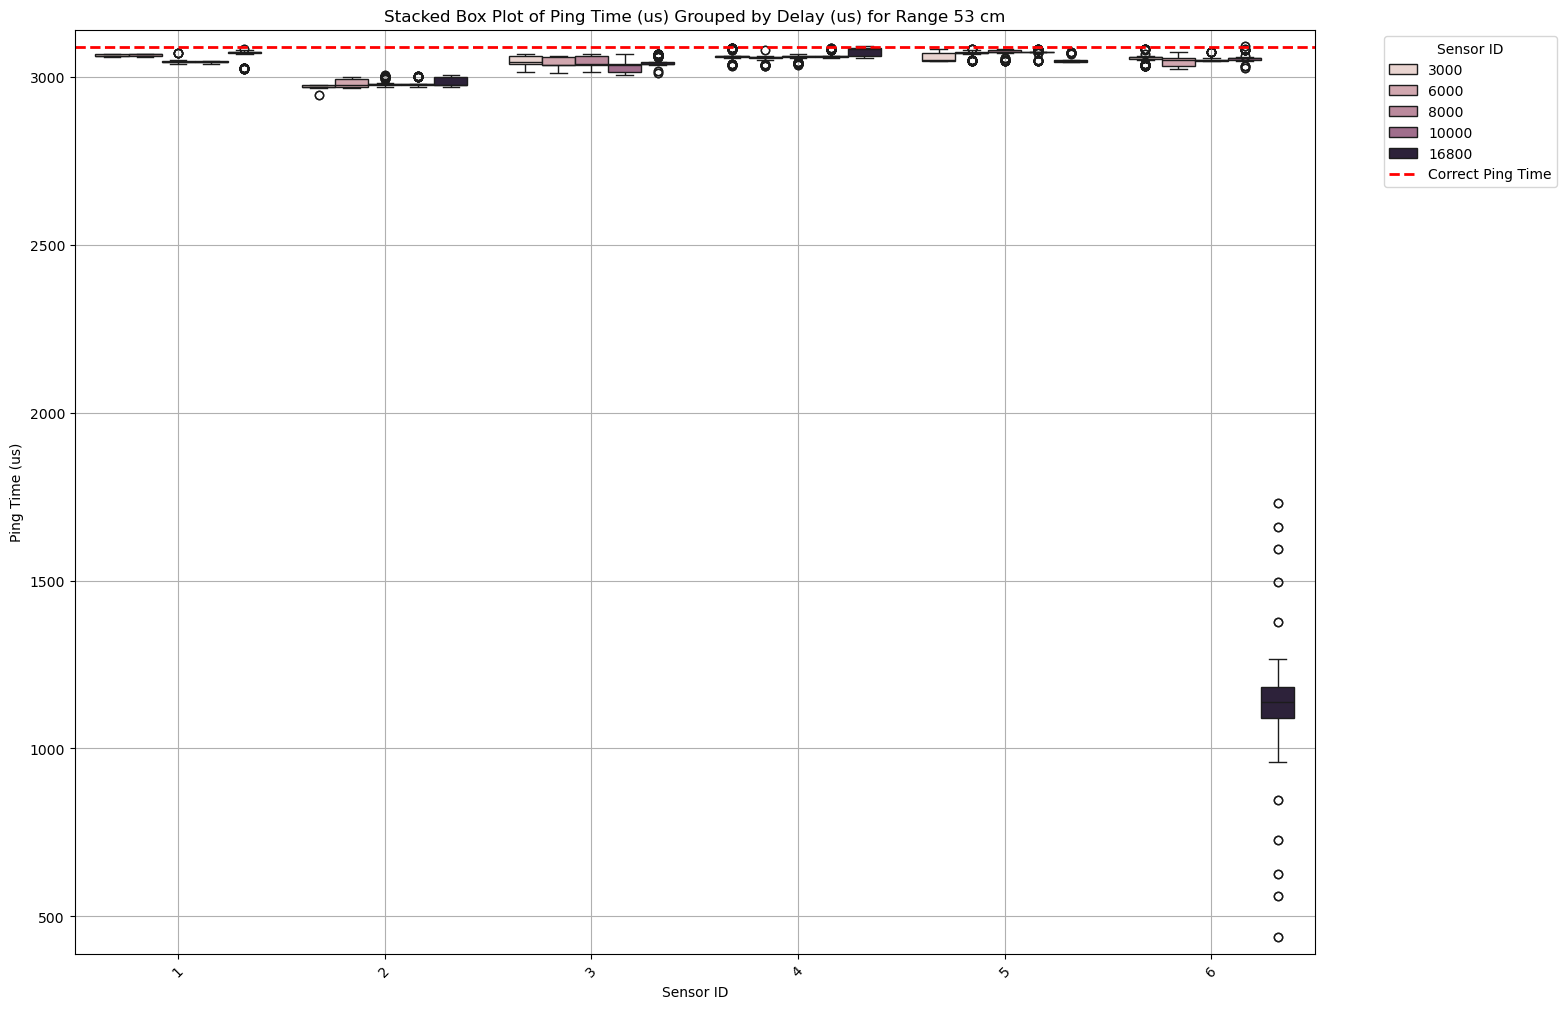

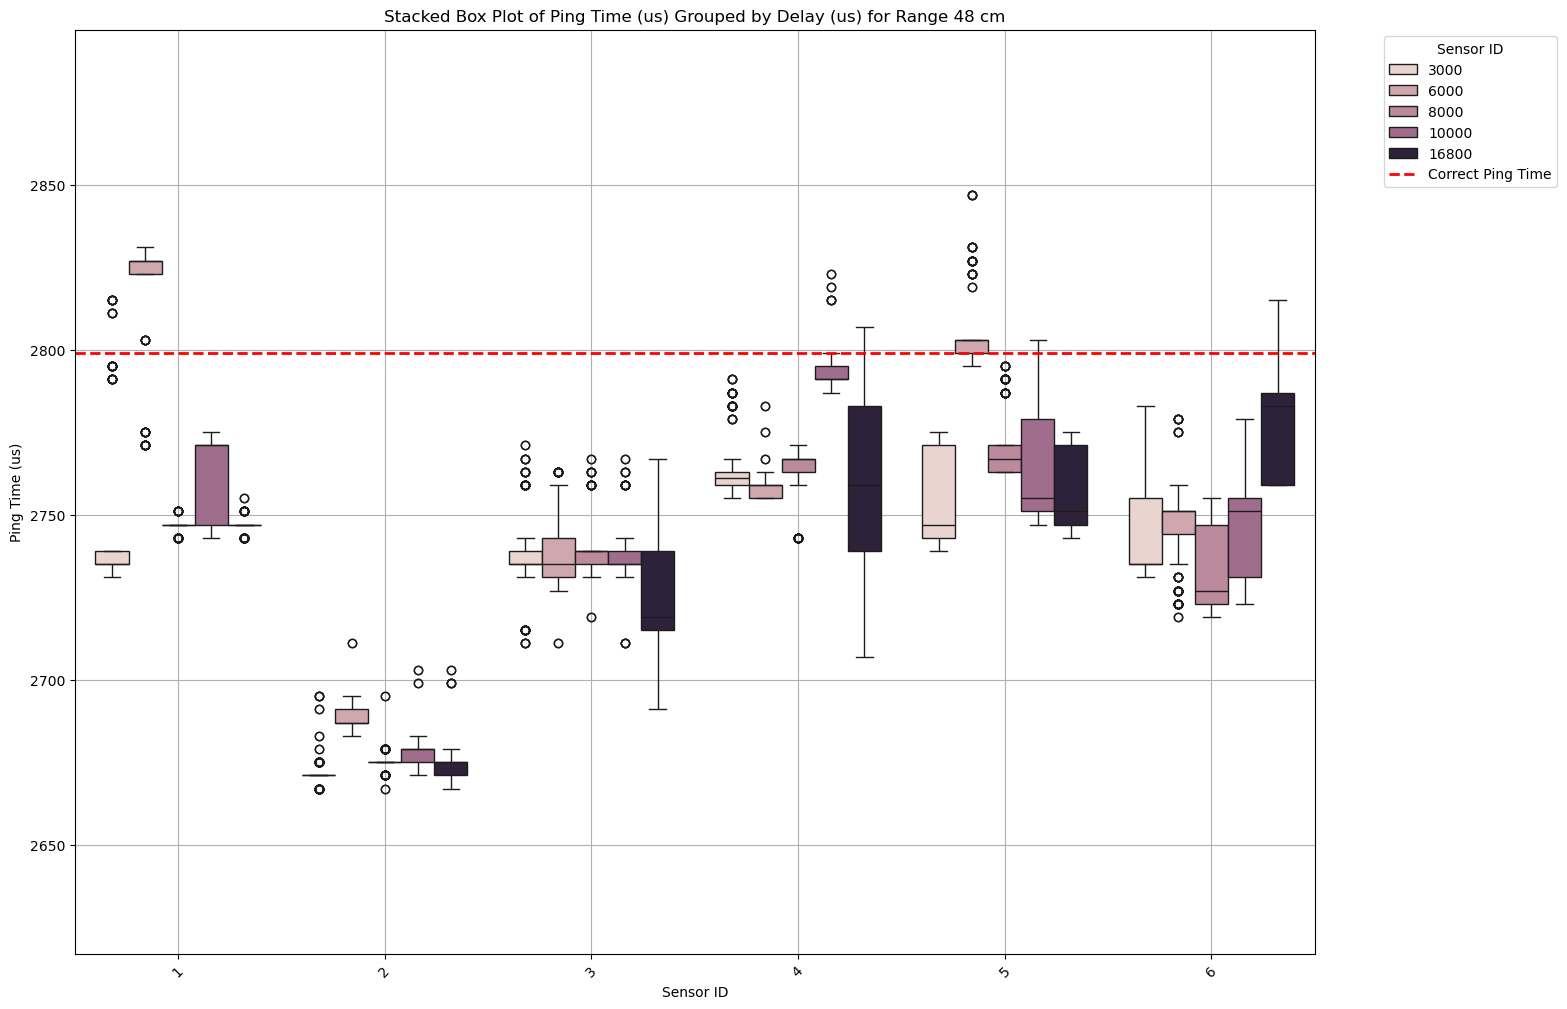

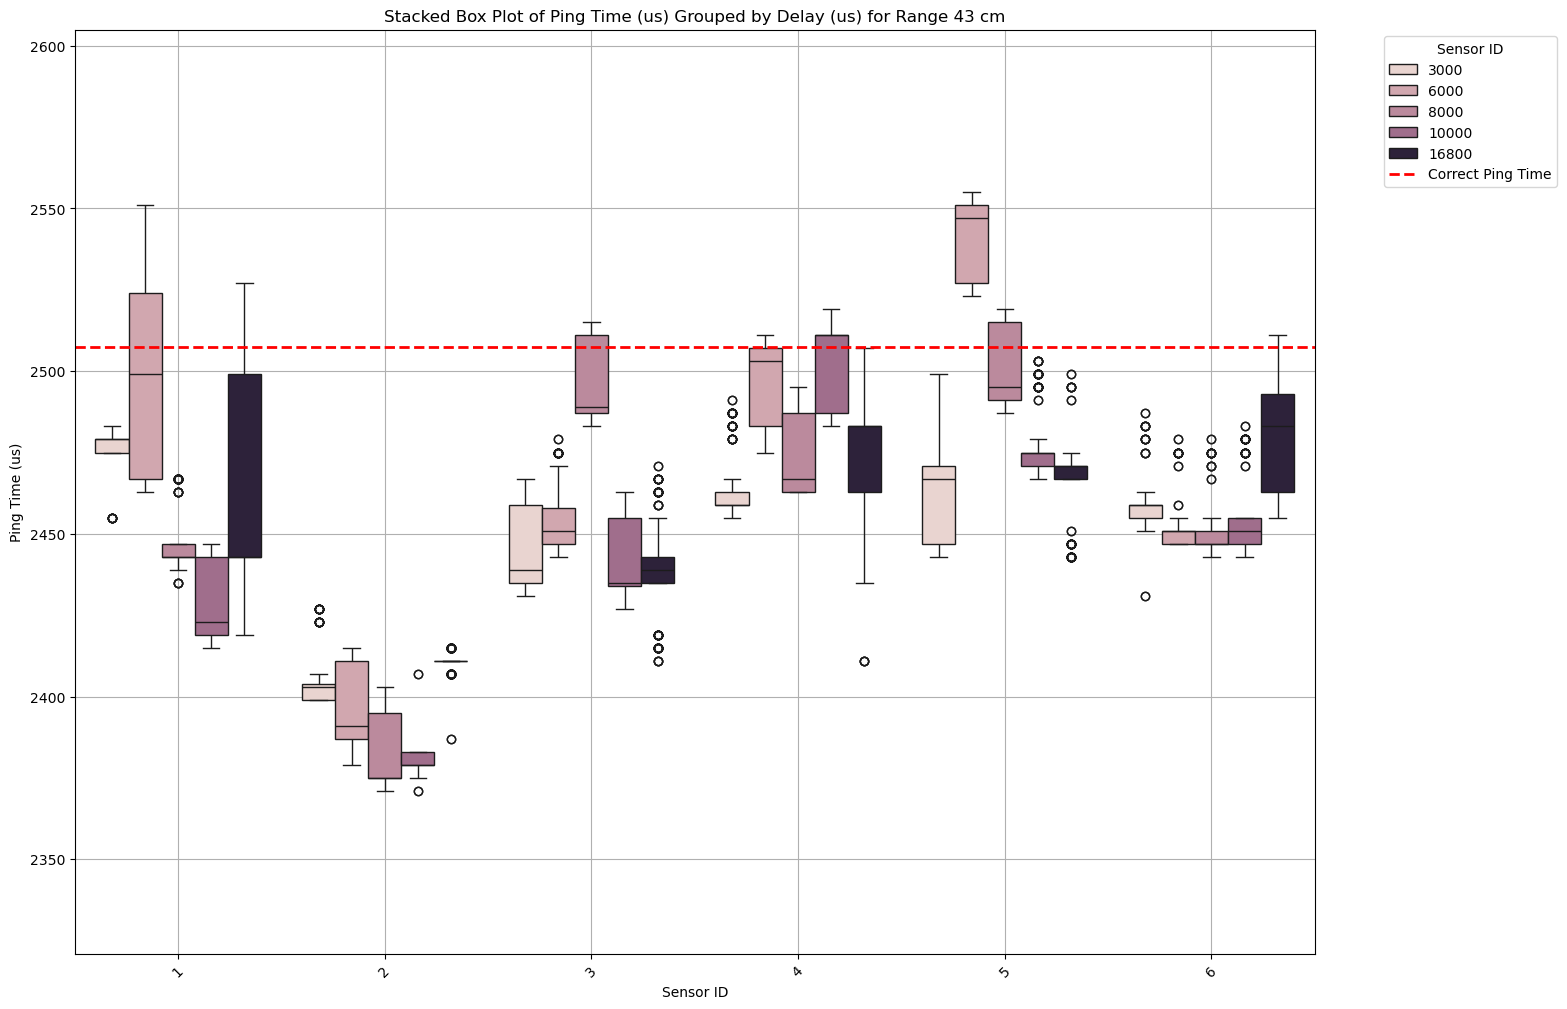

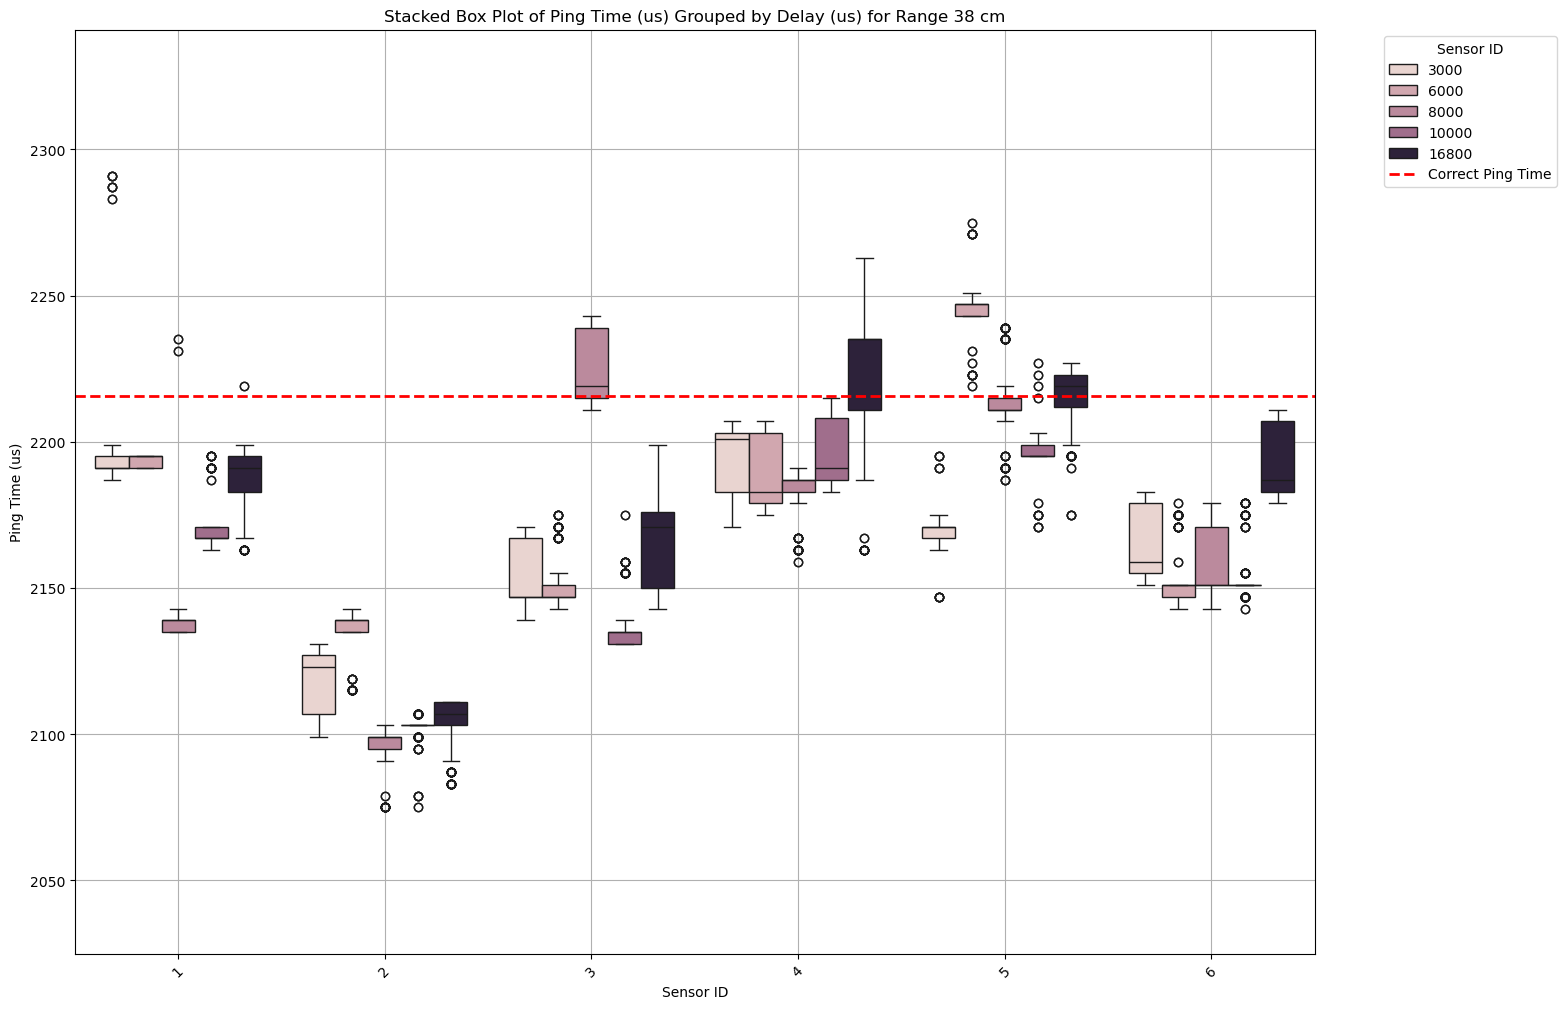

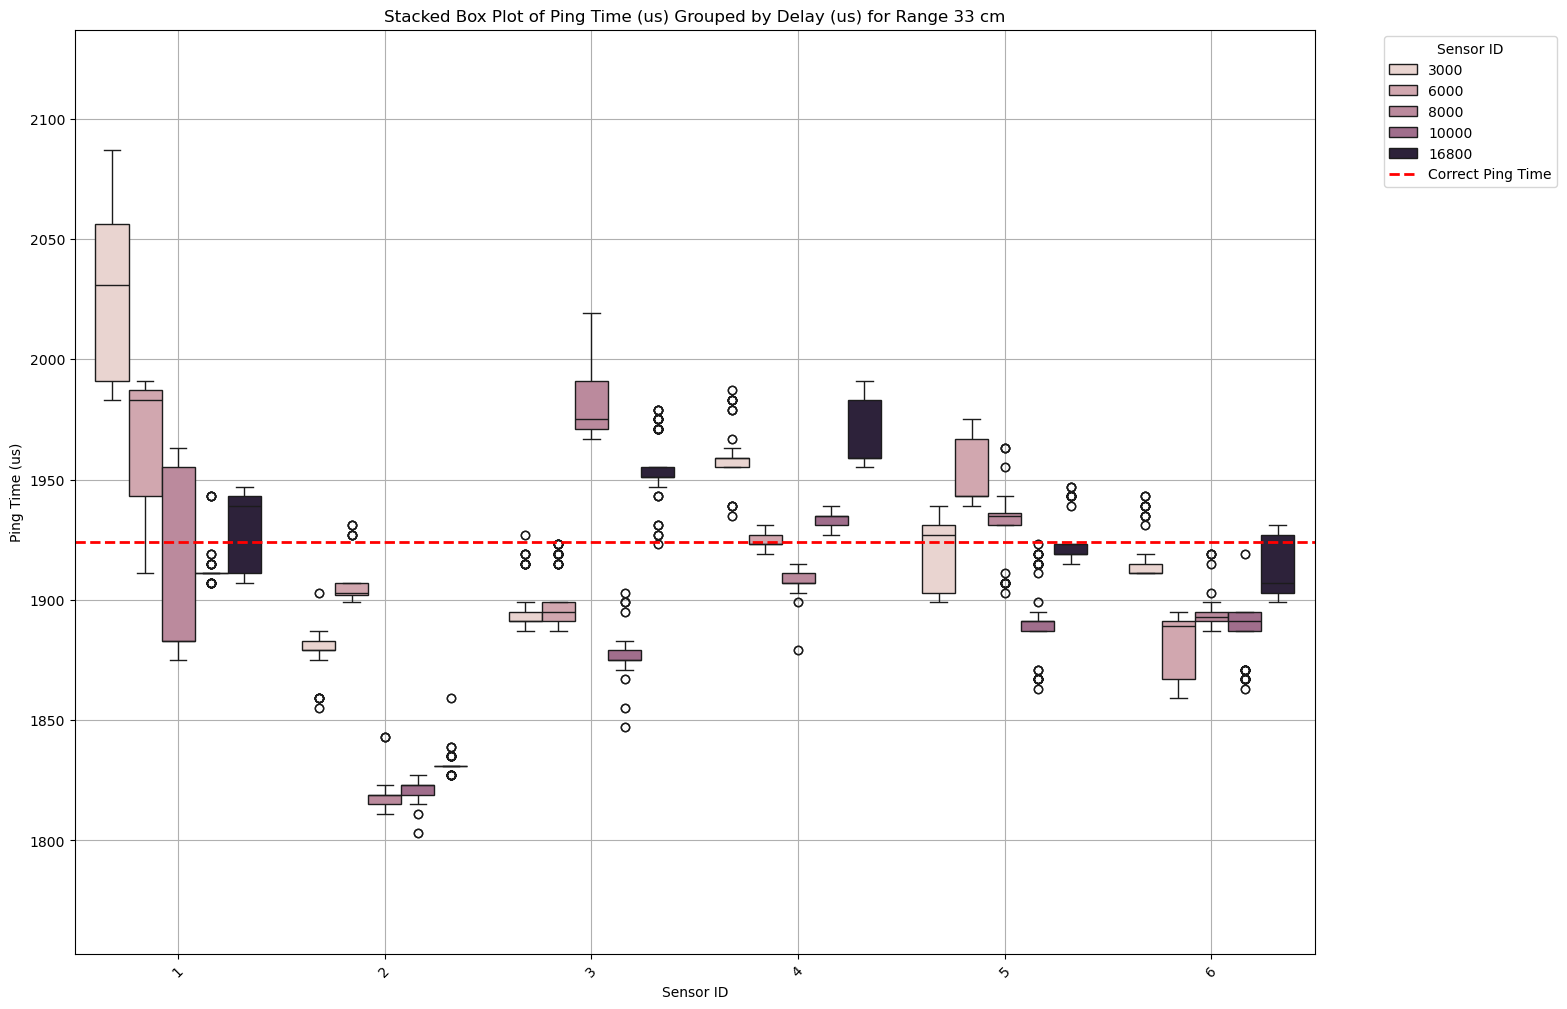

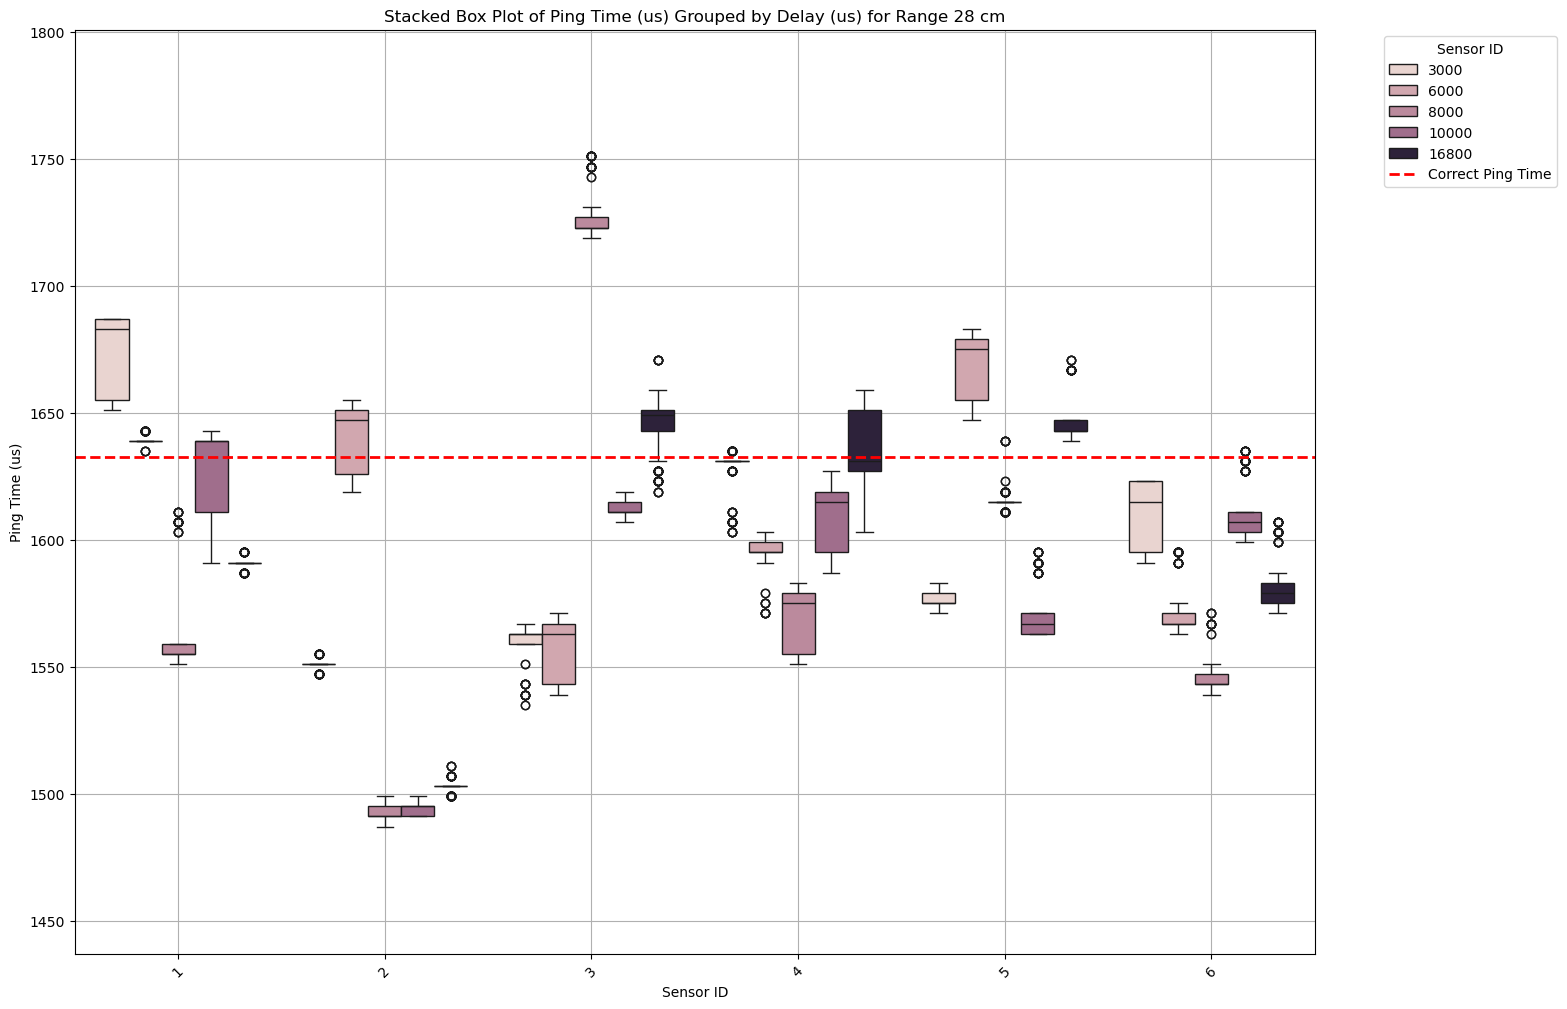

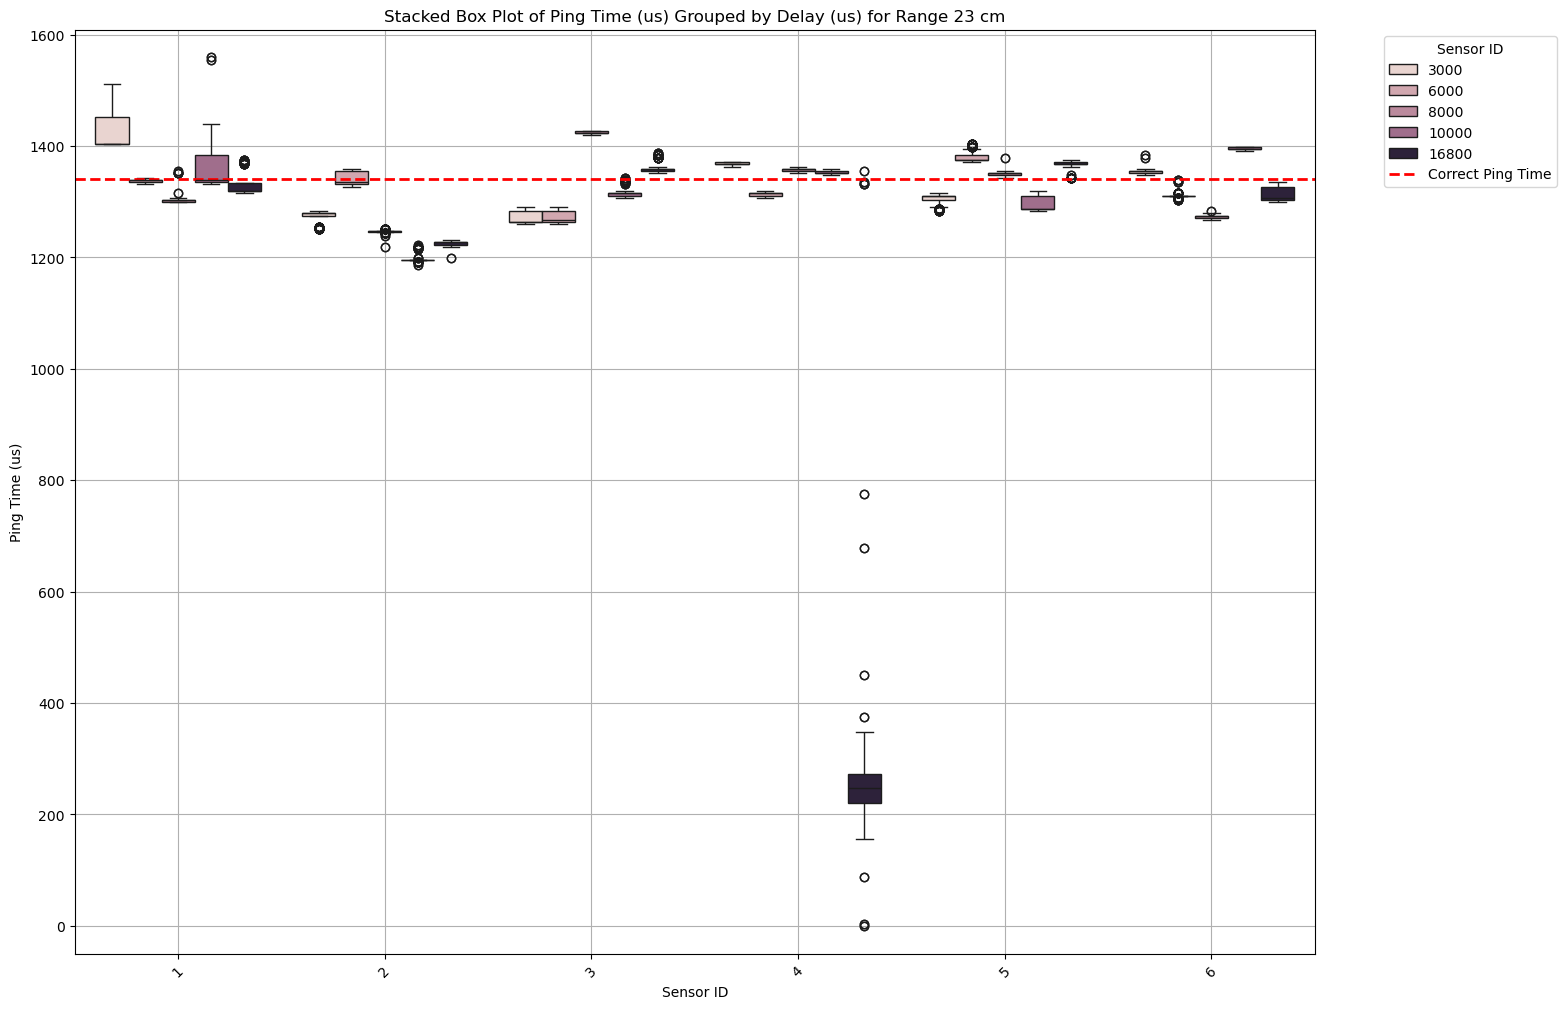

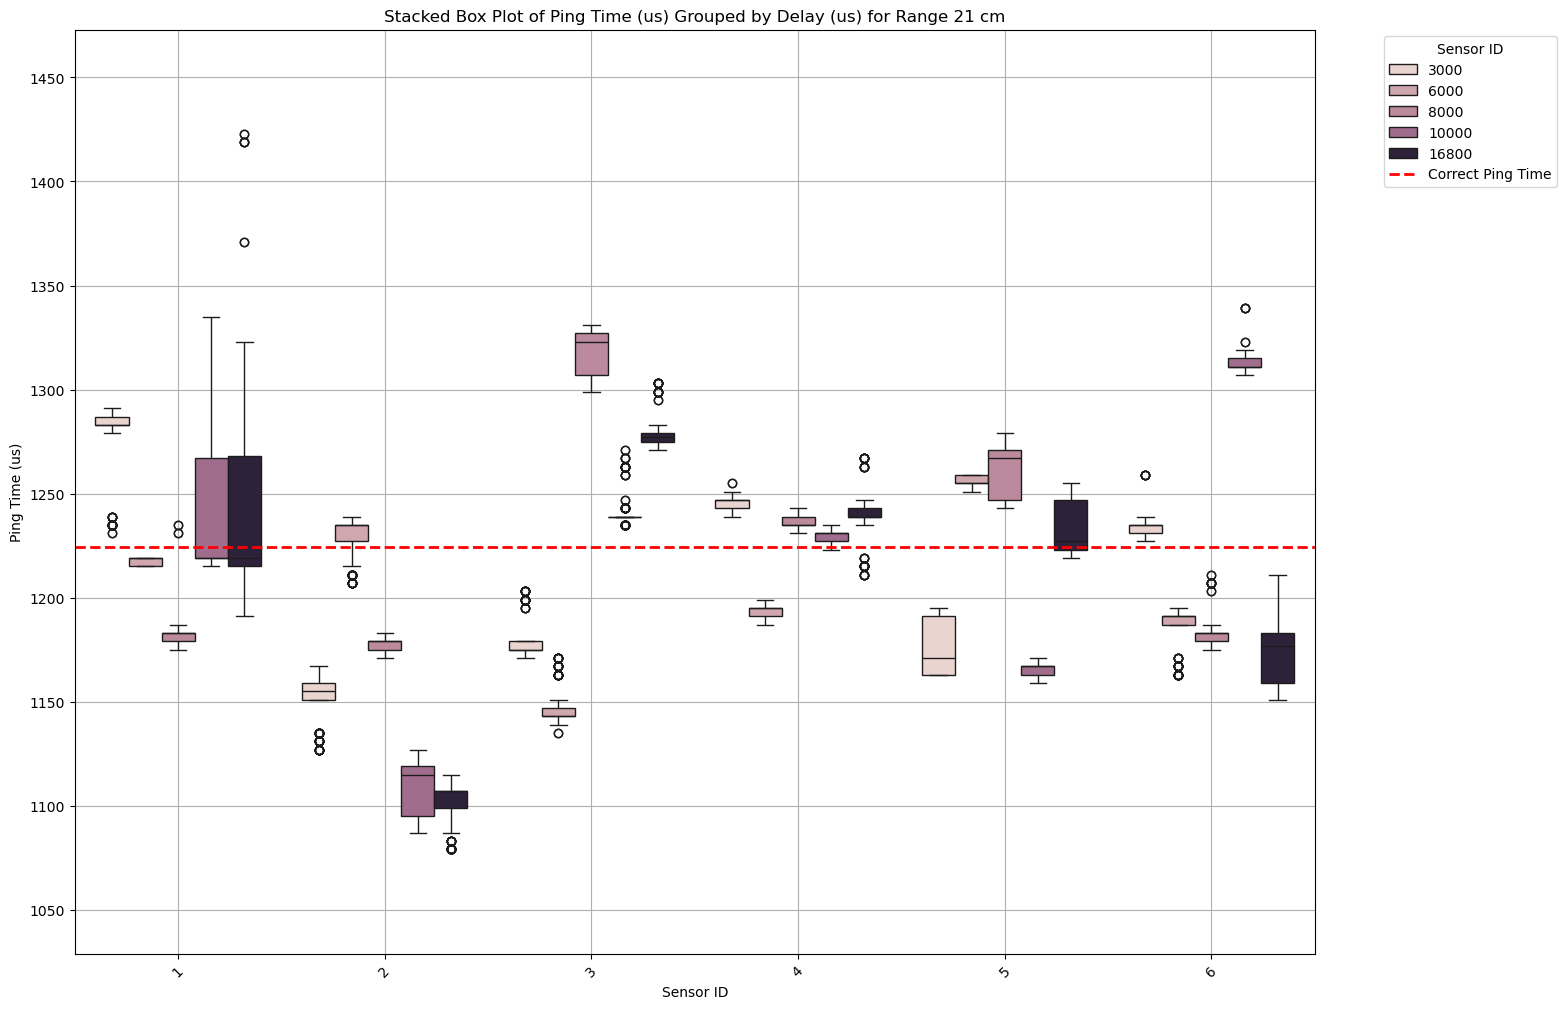

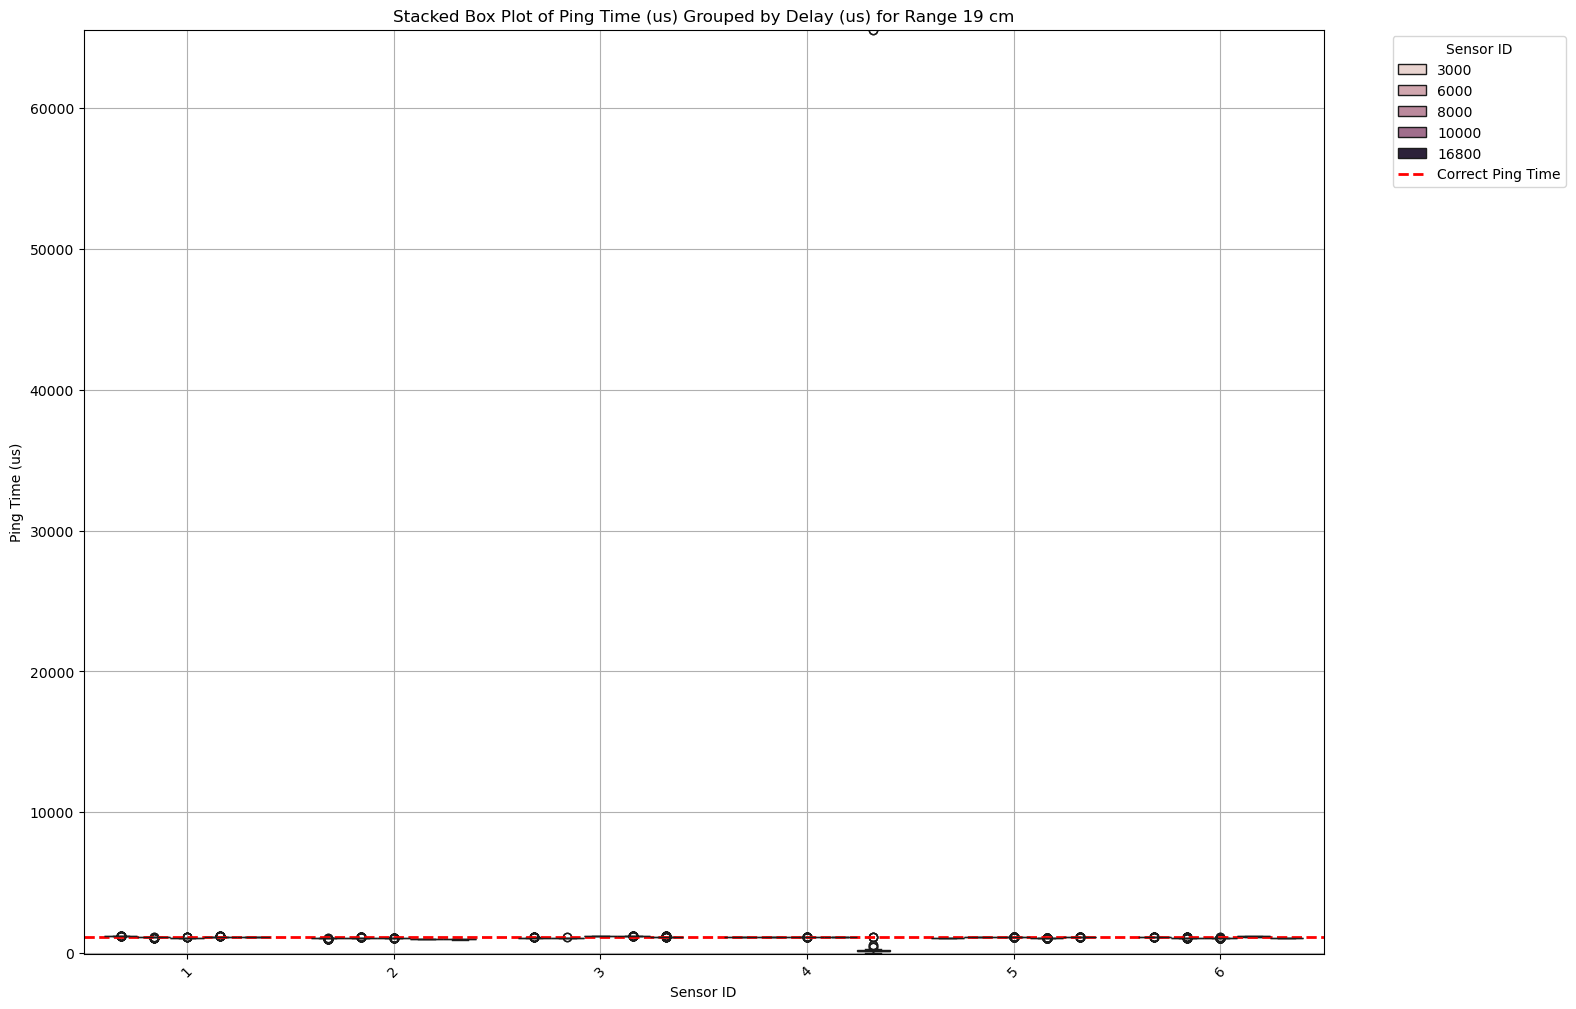

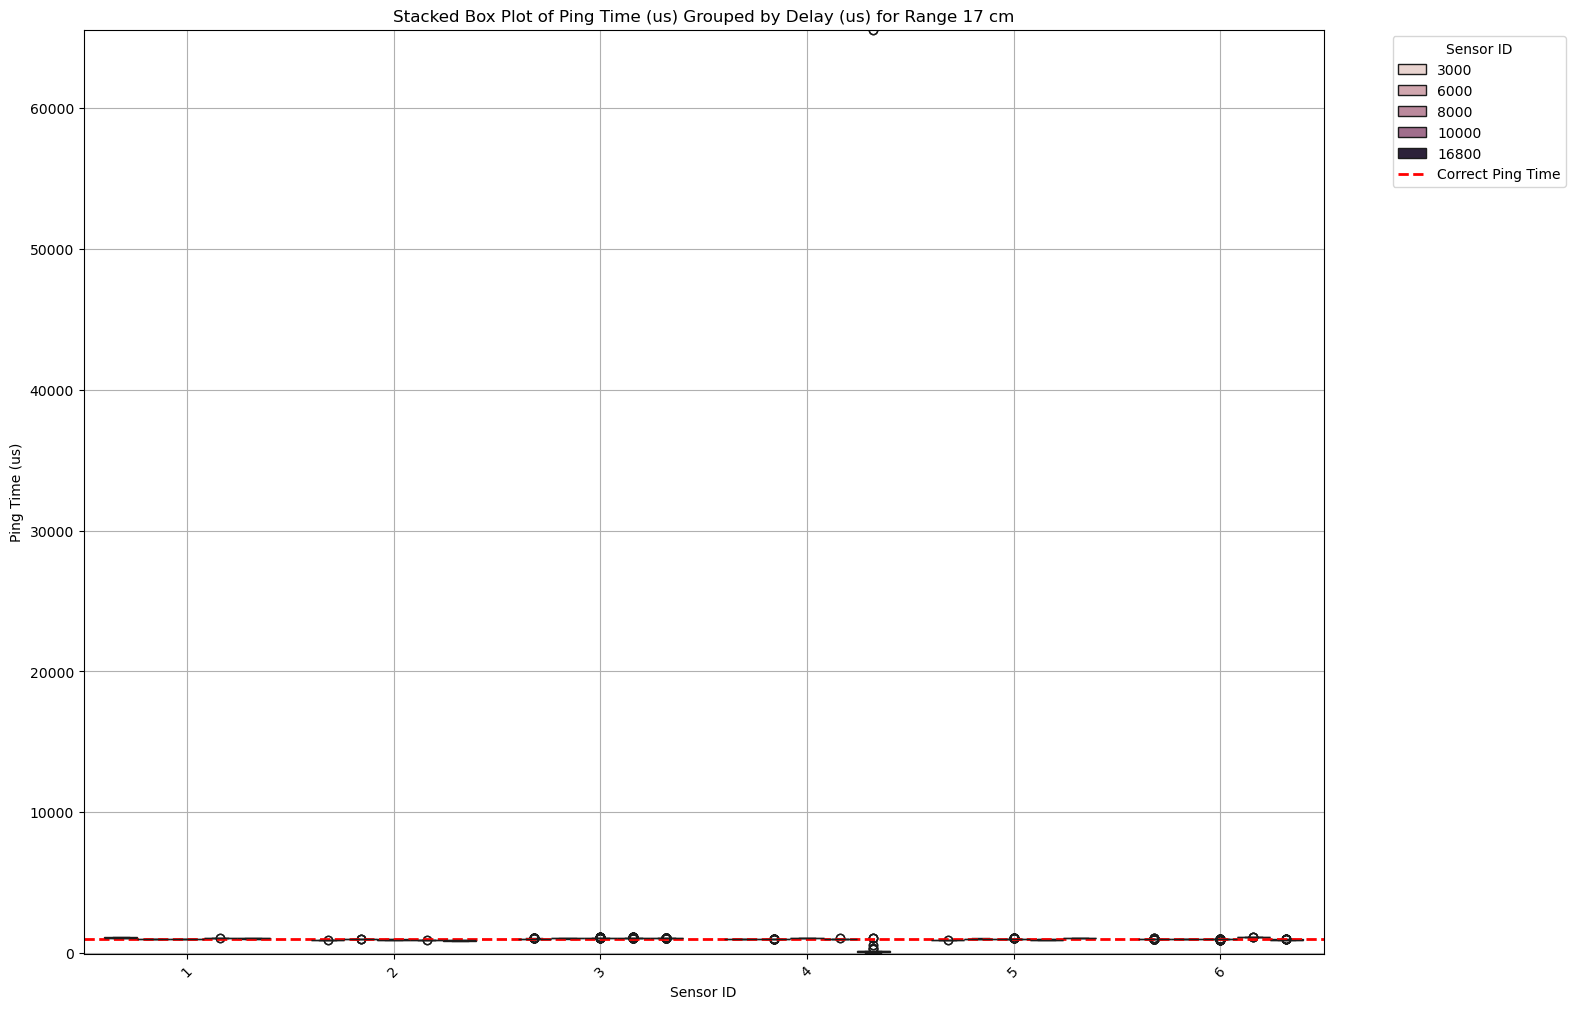

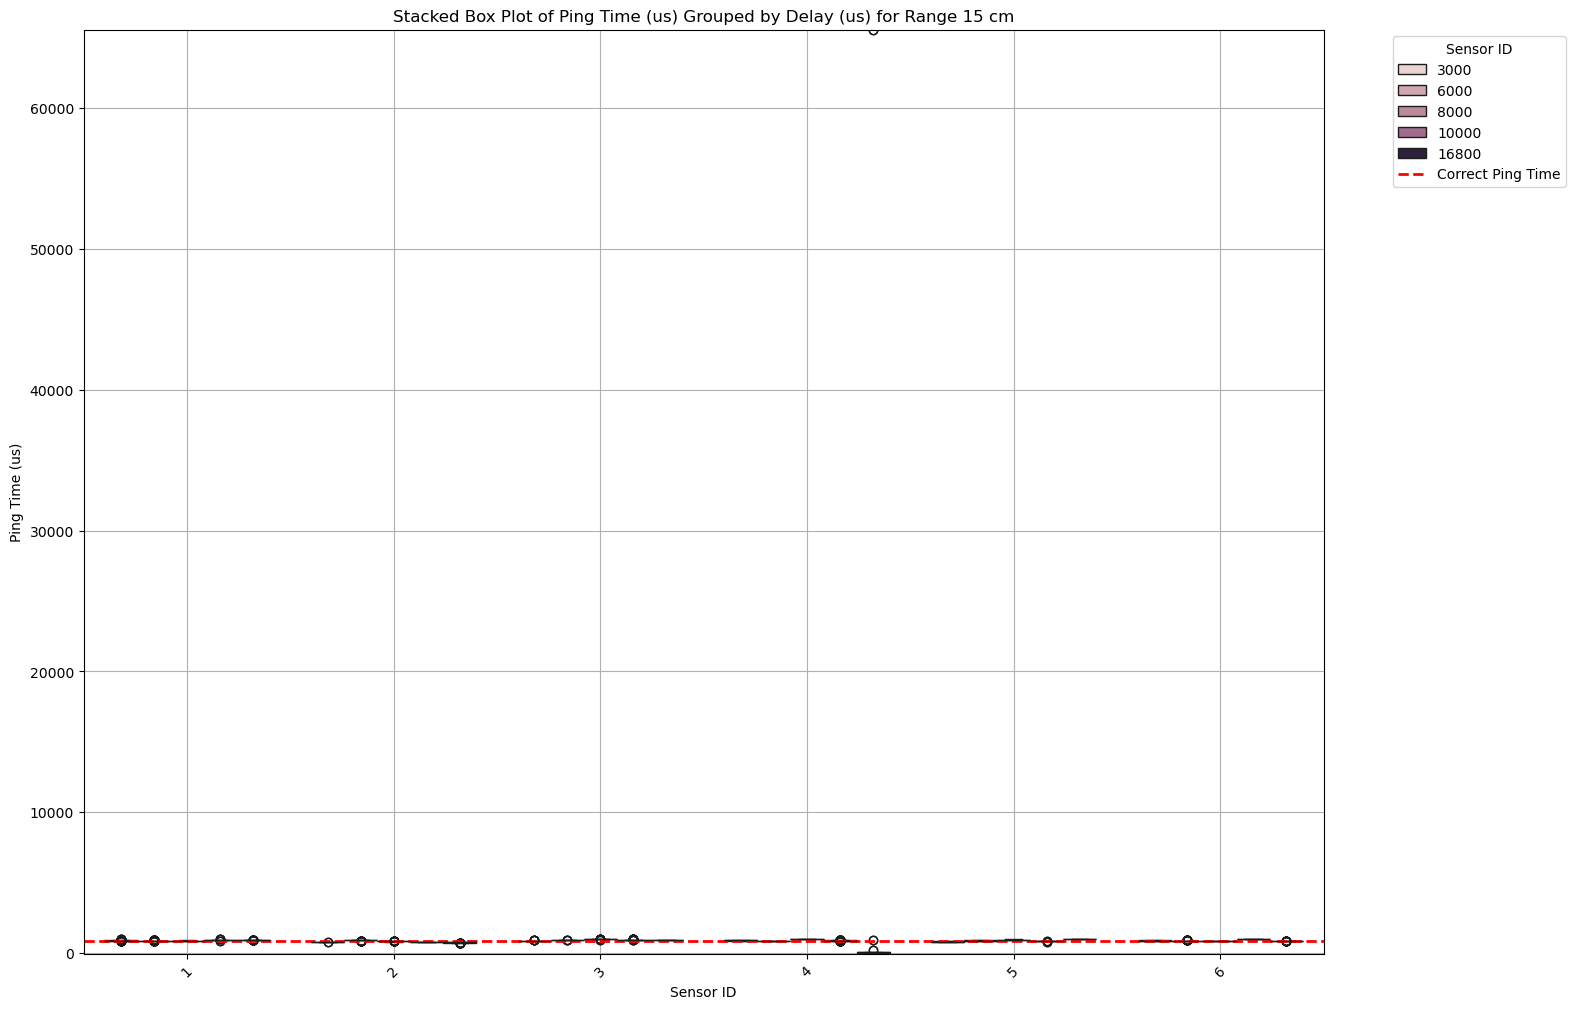

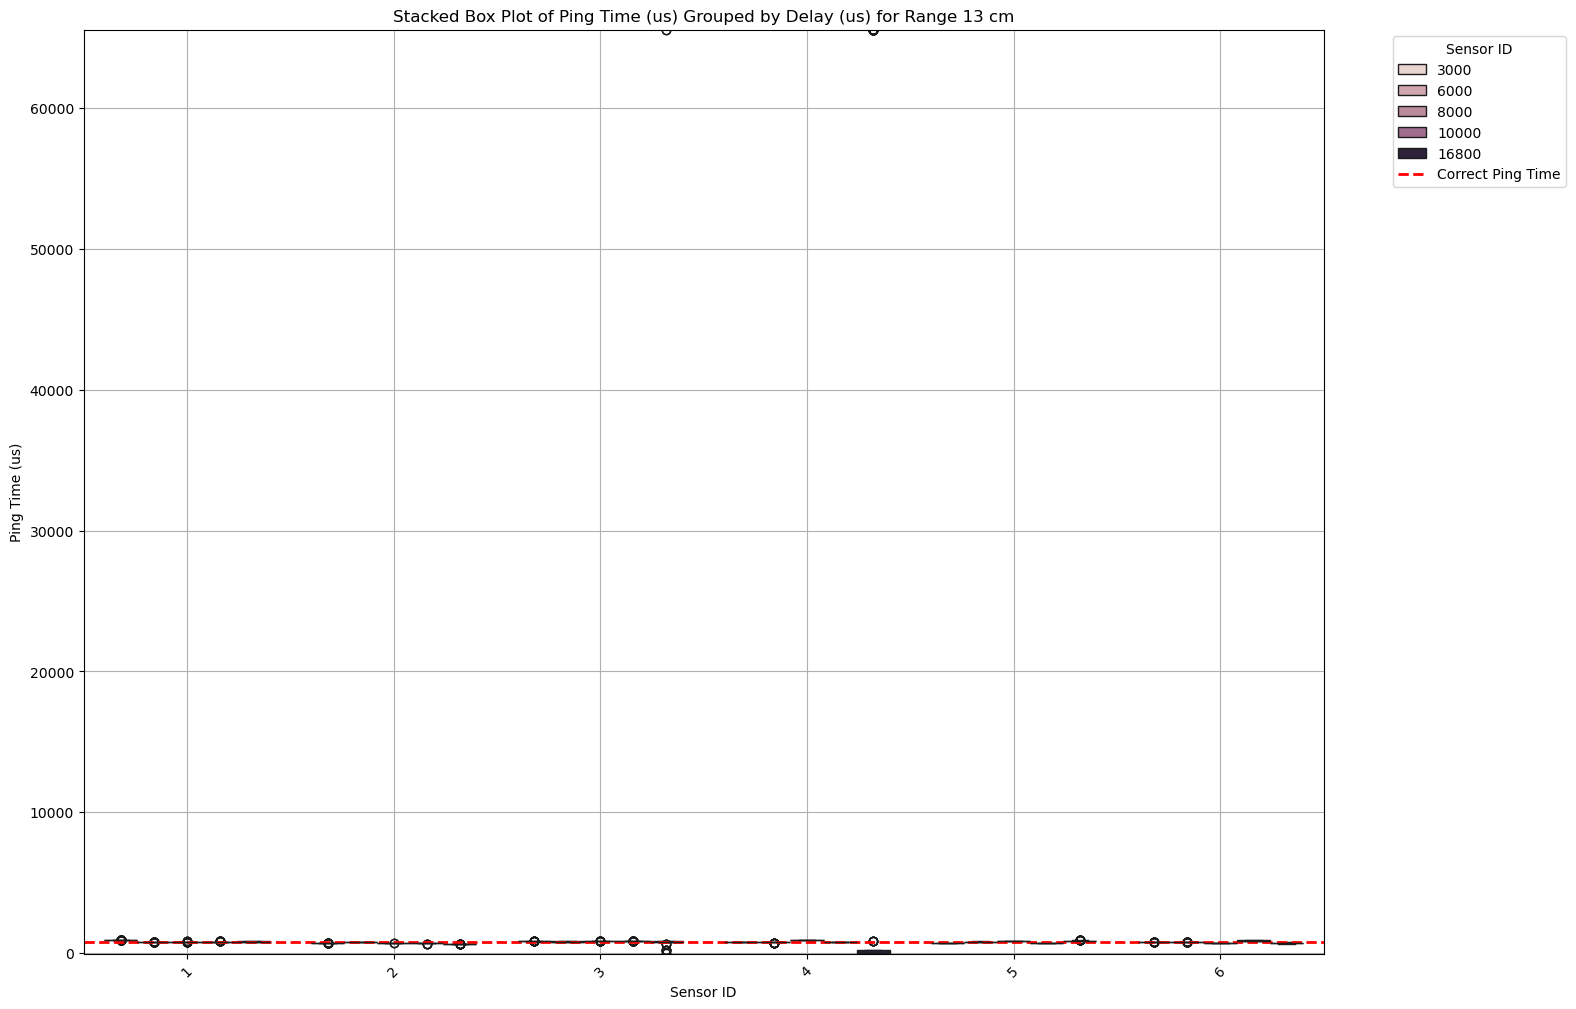

In [17]:
visualize_stacked_box_plots(cleaned_df)

#### Getting data ready


Even though this project has a some aspect of anamoly detection we will separate lower bound and upper bound to do the analysis.

To do so we will use the box plot where it will take lower 25% and upper 25%.

In [18]:
def identify_and_remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    df_outliers_lower = df[(df[column] <= lower_bound)]
    df_outliers_upper = df[(df[column] >= upper_bound)]
    return df_no_outliers,df_outliers_lower,df_outliers_upper

To remove outliers it will be done by groups where we group by 'Sensor ID', 'Delay (us)' and 'Range (cm)'. 
This will treat one stationary data collection done during sequence data collection command as a group and from those group we will identify outliers.

This will ensure fairness of removing process rather than doing as a whole.

In [19]:
# Group the data by 'Sensor ID', 'Delay (us)', and 'Range (cm)'
cleaned_data = cleaned_df.copy()
grouped = cleaned_data.groupby(['Sensor ID', 'Delay (us)', 'Range (cm)'])

# Identify and remove outliers for each group
middle_quartile = []
lower_quartile = []
upper_quartile = []

for name, group in grouped:
    cleaned_group = group.copy()
    for column in ['Ping Time (us)']:
        middle_quartile_group,lower_quartile_group,upper_quartile_group = identify_and_remove_outliers(cleaned_group, column)
    middle_quartile.append(middle_quartile_group)
    lower_quartile.append(lower_quartile_group)
    upper_quartile.append(upper_quartile_group)

In [20]:
# Combine the cleaned groups into a single DataFrame
df_removed_outliers = pd.concat(middle_quartile)
df_outliers_lower = pd.concat(lower_quartile)
df_outliers_upper = pd.concat(upper_quartile)

Result of the split

In [21]:
df_removed_outliers

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  Steps  \
31103      3           6124             15             883        3000  10480   
31104      4           6124             15             883        3000  10480   
31105      5           6128             15             883        3000  10480   
31107      7           6124             15             883        3000  10480   
31108      8           6128             15             883        3000  10480   
...      ...            ...            ...             ...         ...    ...   
66095     95           1996             18            1067       16800      0   
66096     96           2108             20            1179       16800      0   
66097     97           2020             19            1091       16800      0   
66098     98           2108             20            1187       16800      0   
66099     99           2040             19            1115       16800      0   

       Arduino ID  Sensor ID  Range (cm) Color of sensor Surface material  
31103           1          1          13               b             wood  
31104           1          1          13               b             wood  
31105           1          1          13               b             wood  
31107           1          1          13               b             wood  
31108           1          1          13               b             wood  
...           ...        ...         ...             ...              ...  
66095           1          6          53               b             wood  
66096           1          6          53               b             wood  
66097           1          6          53               b             wood  
66098           1          6          53               b             wood  
66099           1          6          53               b             wood  

[65308 rows x 11 columns]

In [22]:
df_outliers_lower

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  Steps  \
31100      0           6148             15             879        3000  10480   
31101      1           6148             15             879        3000  10480   
31102      2           6148             15             879        3000  10480   
31134     34           6124             15             879        3000  10480   
31137     37           6124             15             879        3000  10480   
...      ...            ...            ...             ...         ...    ...   
66000      0           1368              7             439       16800      0   
66002      2           1492              9             559       16800      0   
66004      4           1560             11             627       16800      0   
66006      6           1656             12             727       16800      0   
66008      8           1776             14             847       16800      0   

       Arduino ID  Sensor ID  Range (cm) Color of sensor Surface material  
31100           1          1          13               b             wood  
31101           1          1          13               b             wood  
31102           1          1          13               b             wood  
31134           1          1          13               b             wood  
31137           1          1          13               b             wood  
...           ...        ...         ...             ...              ...  
66000           1          6          53               b             wood  
66002           1          6          53               b             wood  
66004           1          6          53               b             wood  
66006           1          6          53               b             wood  
66008           1          6          53               b             wood  

[7172 rows x 11 columns]

In [23]:
df_outliers_upper

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  Steps  \
31106      6           6128             15             887        3000  10480   
31109      9           6128             15             887        3000  10480   
31112     12           6128             15             887        3000  10480   
31115     15           6128             15             887        3000  10480   
31116     16           6128             15             887        3000  10480   
...      ...            ...            ...             ...         ...    ...   
66001      1           2660             30            1731       16800      0   
66003      3           2592             29            1659       16800      0   
66005      5           2520             27            1595       16800      0   
66007      7           2428             26            1495       16800      0   
66009      9           2296             24            1375       16800      0   

       Arduino ID  Sensor ID  Range (cm) Color of sensor Surface material  
31106           1          1          13               b             wood  
31109           1          1          13               b             wood  
31112           1          1          13               b             wood  
31115           1          1          13               b             wood  
31116           1          1          13               b             wood  
...           ...        ...         ...             ...              ...  
66001           1          6          53               b             wood  
66003           1          6          53               b             wood  
66005           1          6          53               b             wood  
66007           1          6          53               b             wood  
66009           1          6          53               b             wood  

[8426 rows x 11 columns]

#### Visualize Effect of delay and range

This will show how middle quartile where there are no outliers would portray similar shape of graphs. 

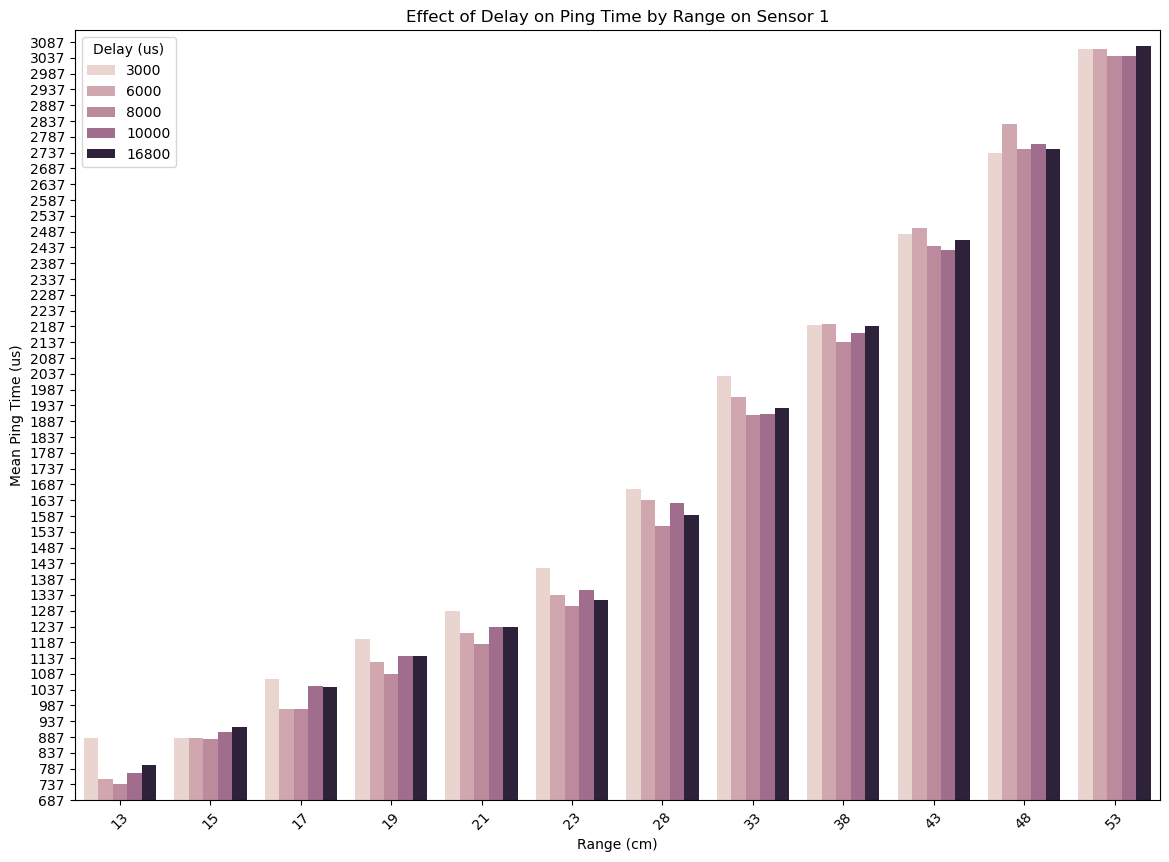

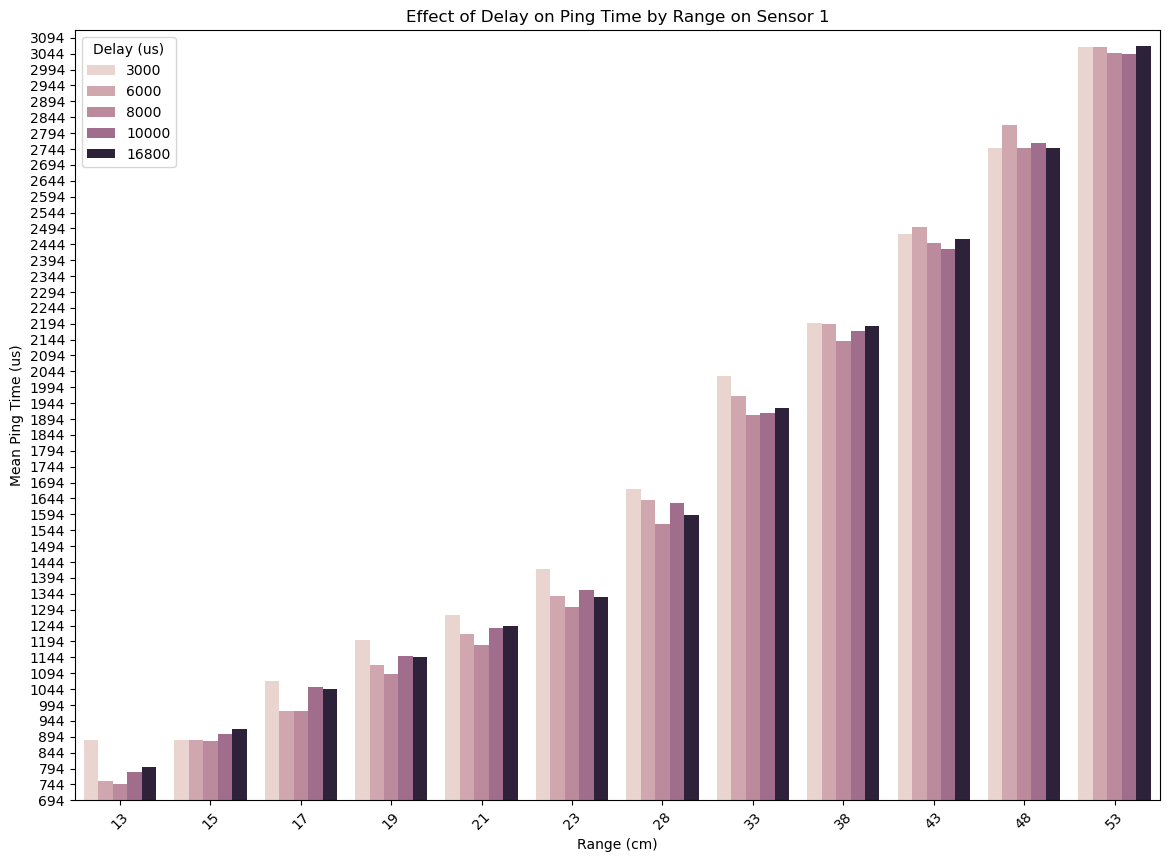

In [24]:
# visualize sensor 1
visualize_effect_on_ping_time_sensors(df_removed_outliers,1)
visualize_effect_on_ping_time_sensors(cleaned_df,1)

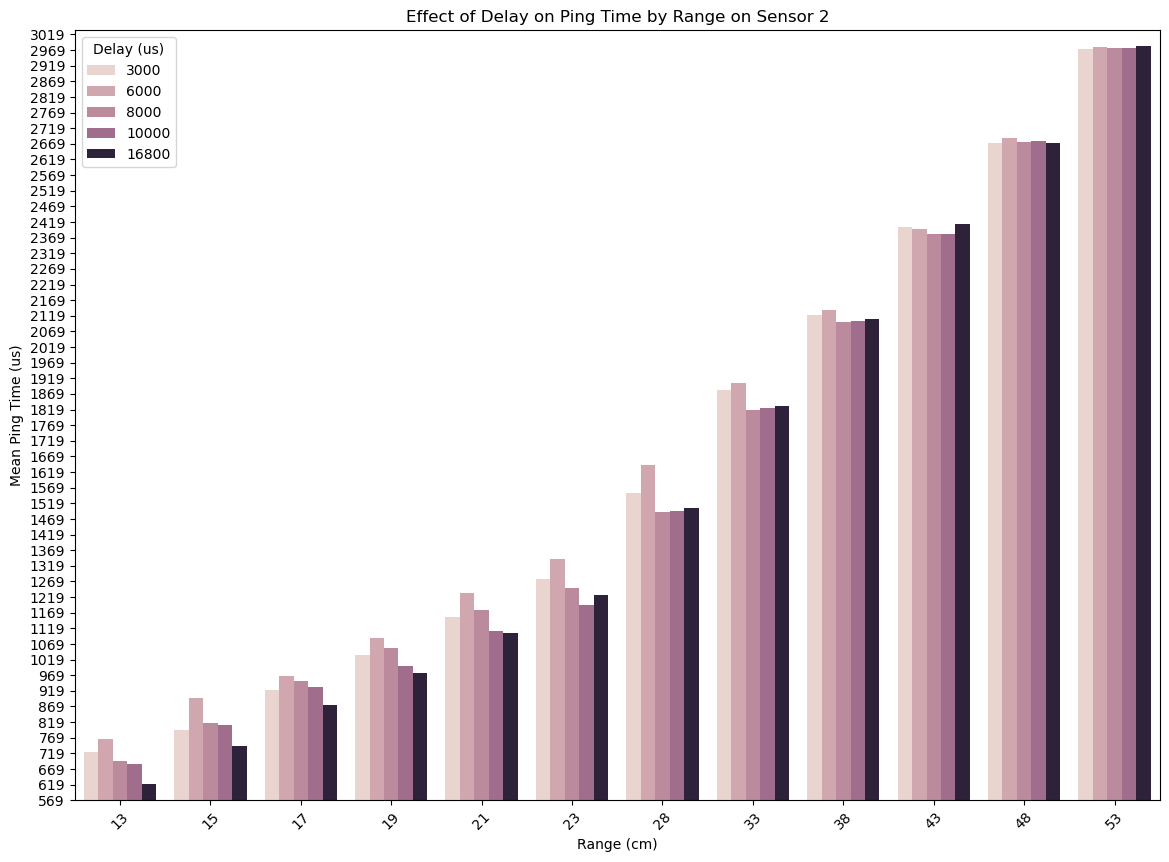

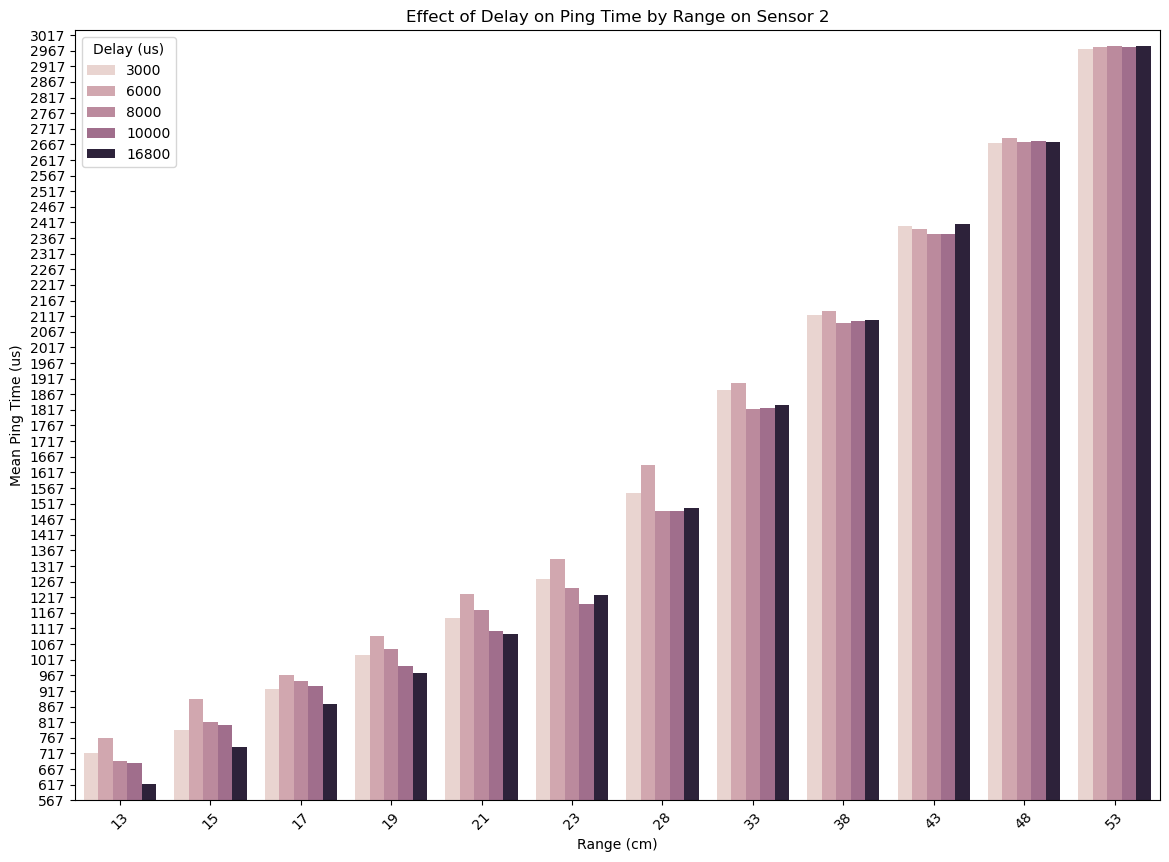

In [25]:
# visualize sensor 2
visualize_effect_on_ping_time_sensors(df_removed_outliers,2)
visualize_effect_on_ping_time_sensors(cleaned_df,2)

Sensor 1 and 2 doesn't show much difference 

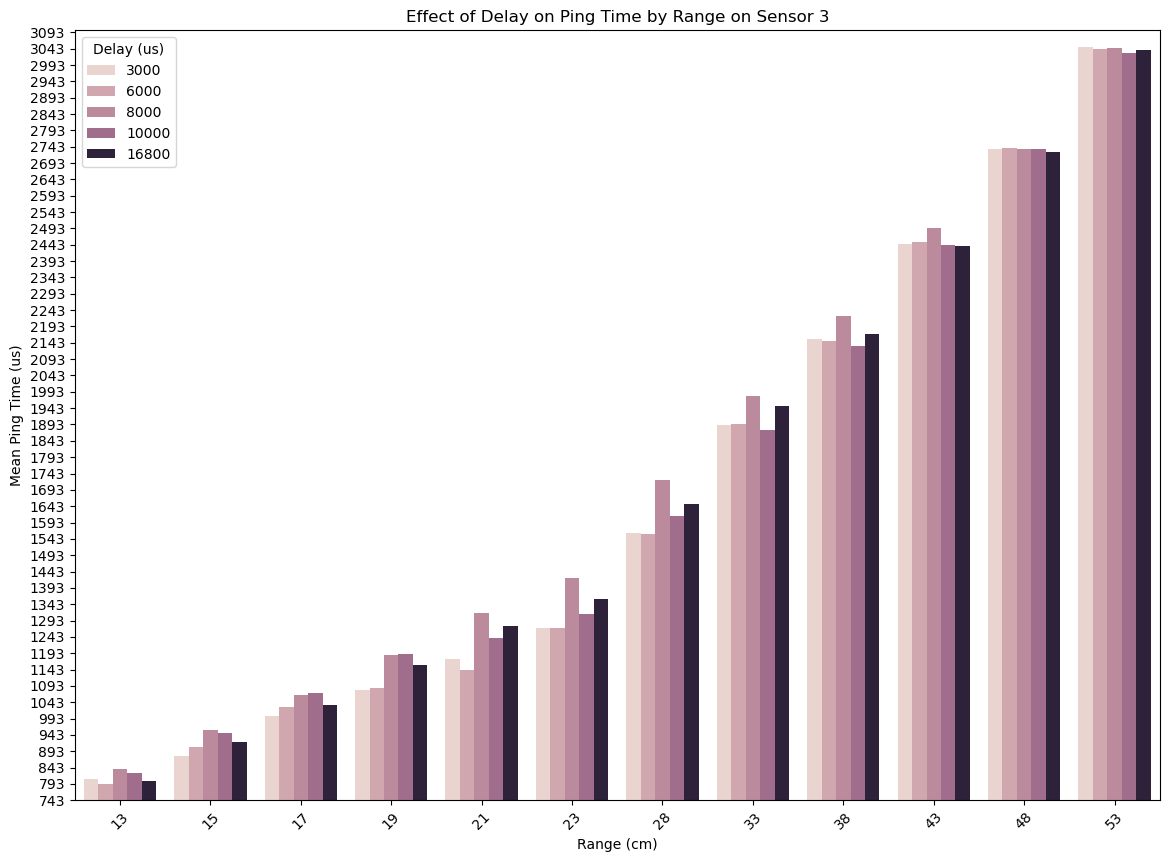

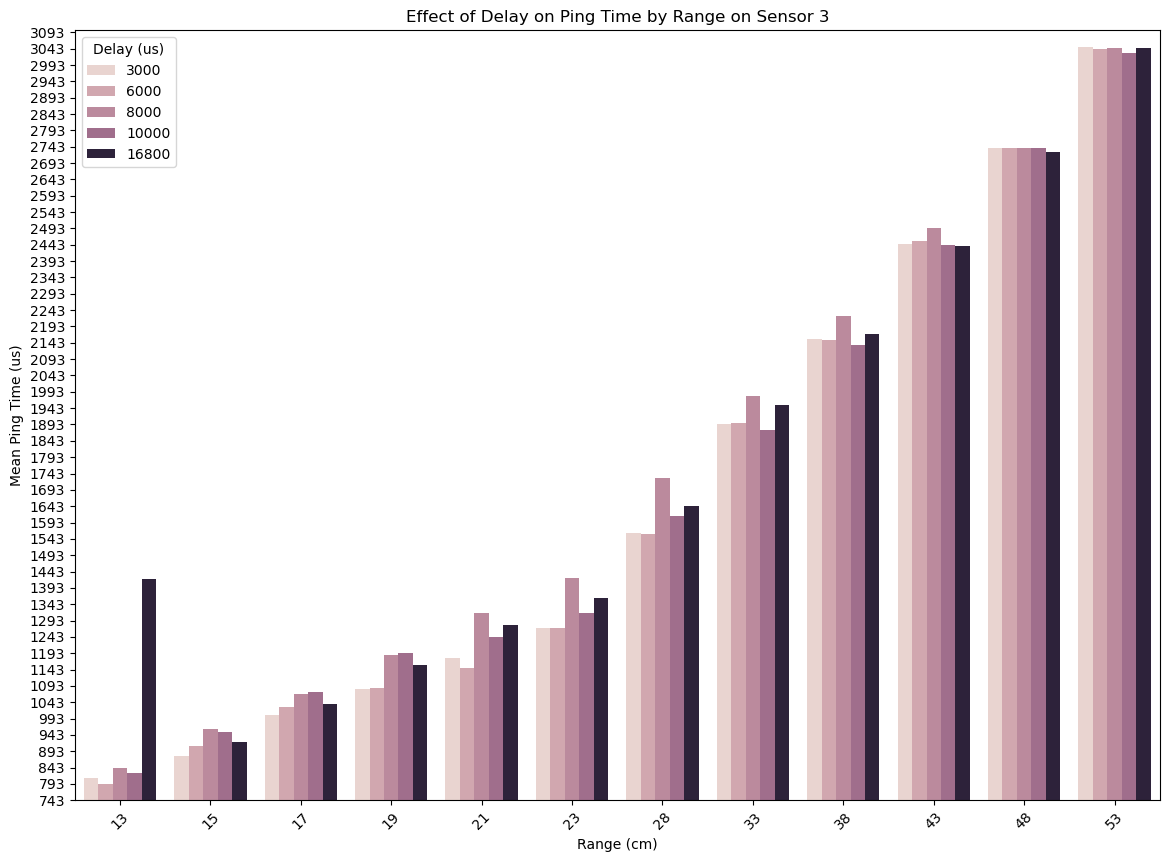

In [26]:
# visualize sensor 3
visualize_effect_on_ping_time_sensors(df_removed_outliers,3)
visualize_effect_on_ping_time_sensors(cleaned_df,3)

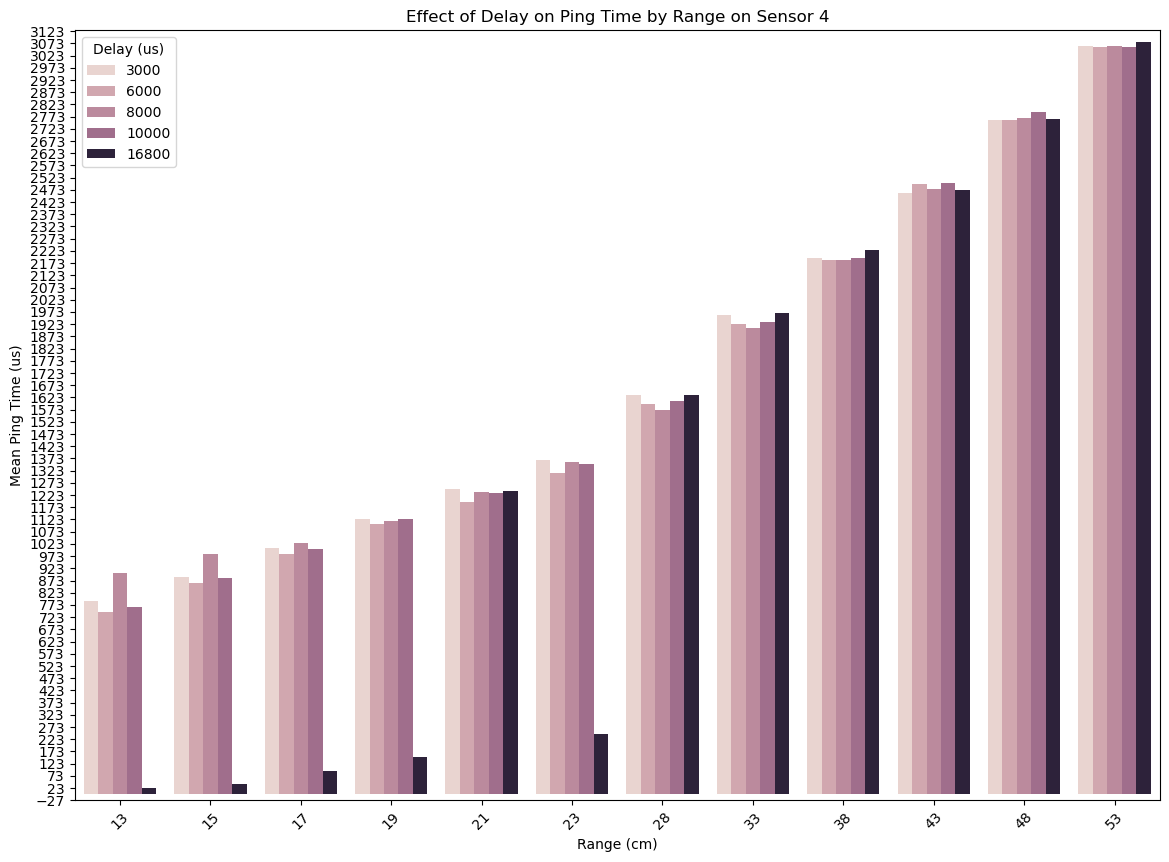

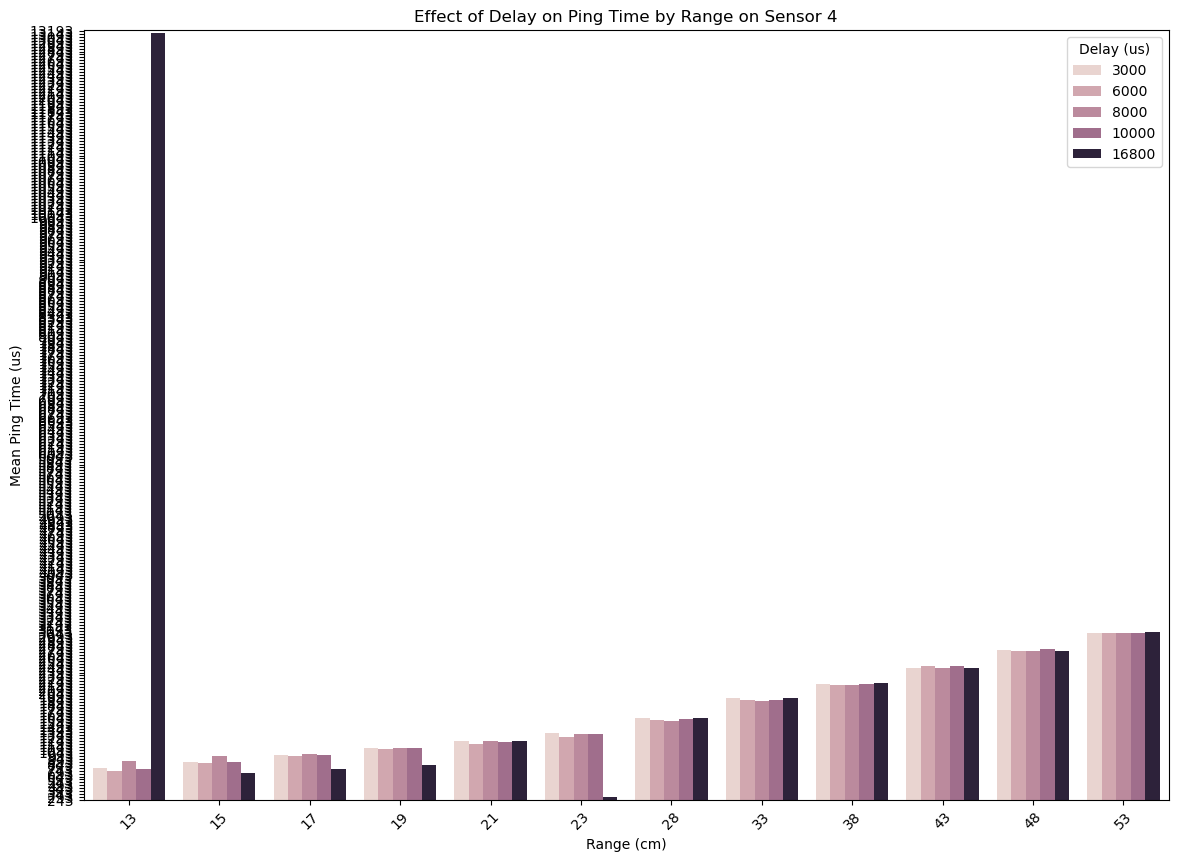

In [27]:
# visualize sensor 4
visualize_effect_on_ping_time_sensors(df_removed_outliers,4)
visualize_effect_on_ping_time_sensors(cleaned_df,4)

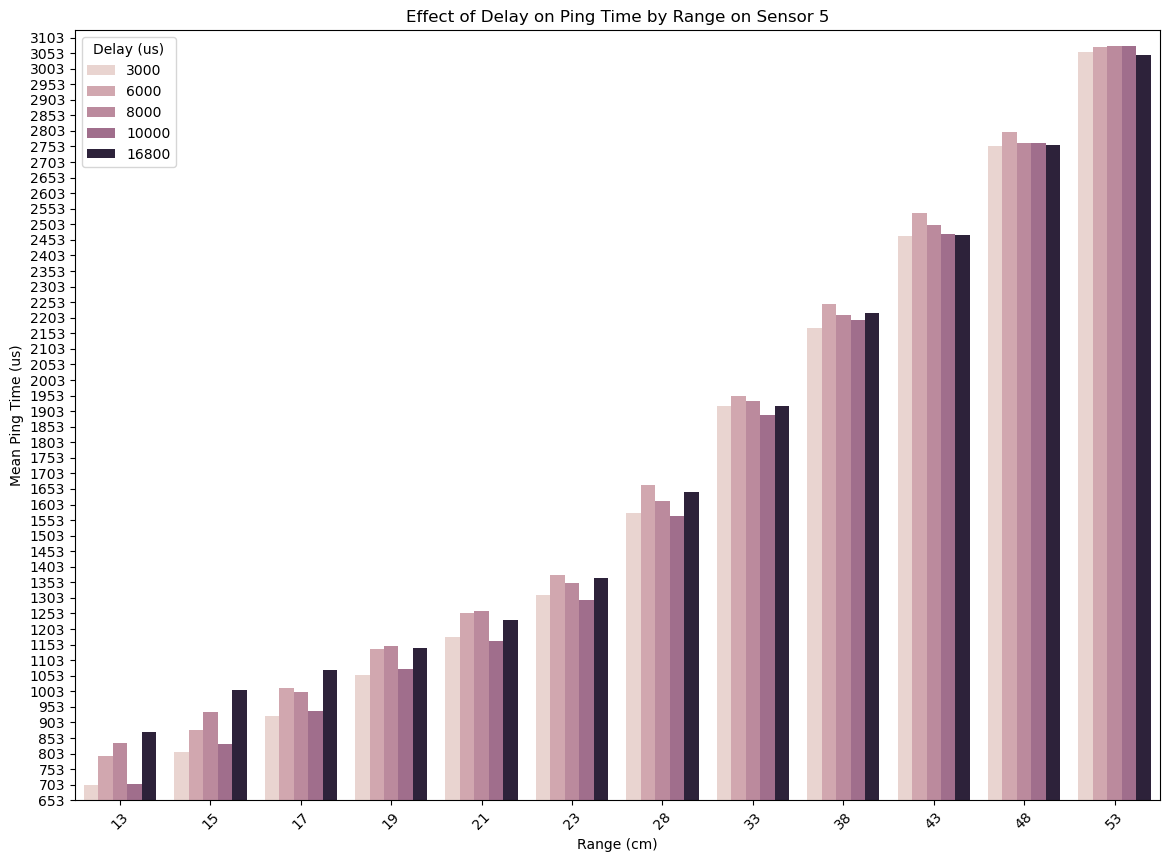

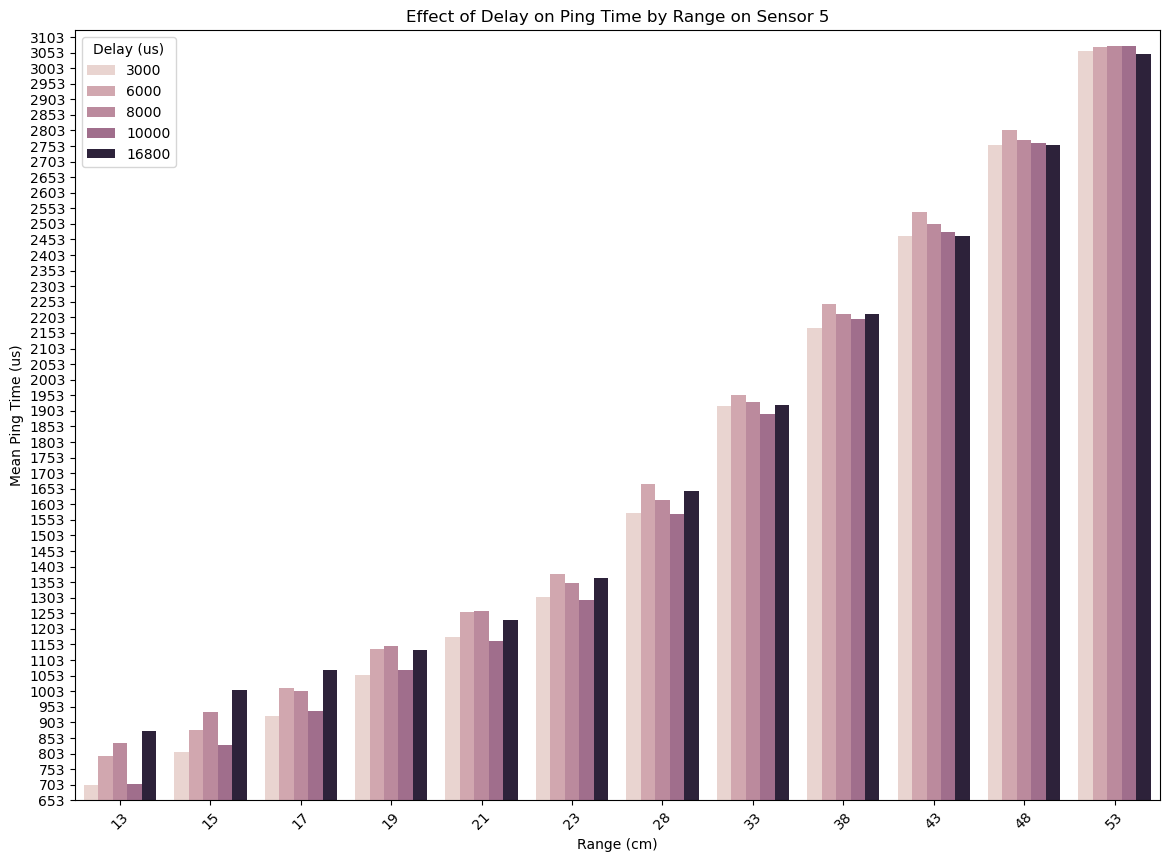

In [28]:
# visualize sensor 5
visualize_effect_on_ping_time_sensors(df_removed_outliers,5)
visualize_effect_on_ping_time_sensors(cleaned_df,5)

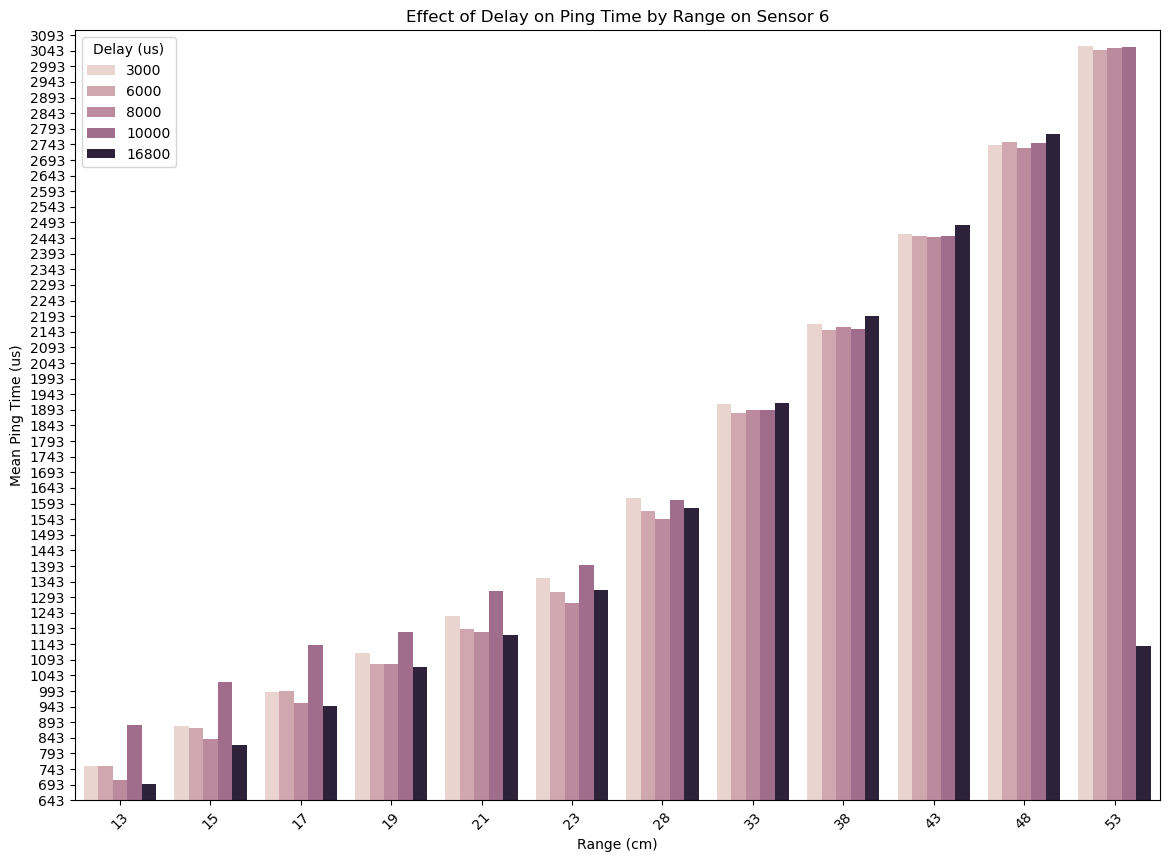

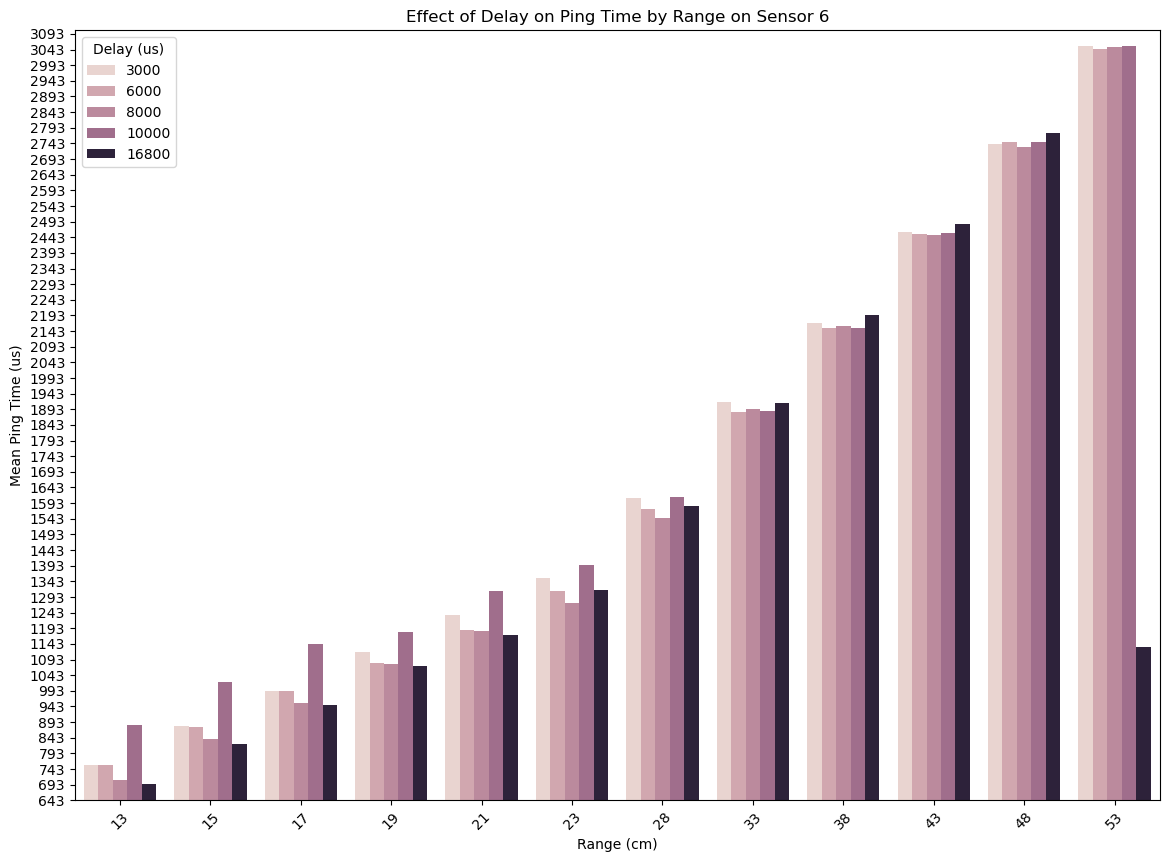

In [29]:
# visualize sensor 6
visualize_effect_on_ping_time_sensors(df_removed_outliers,6)
visualize_effect_on_ping_time_sensors(cleaned_df,6)

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


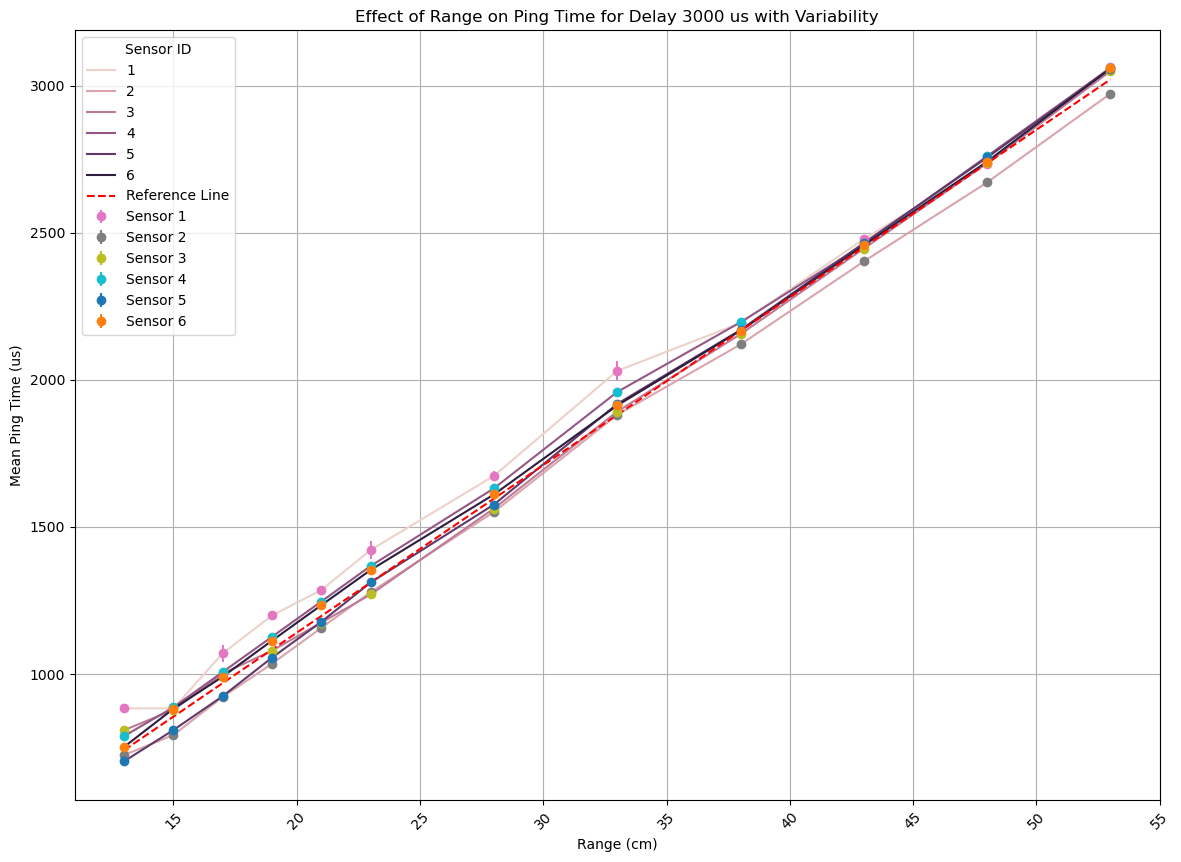

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


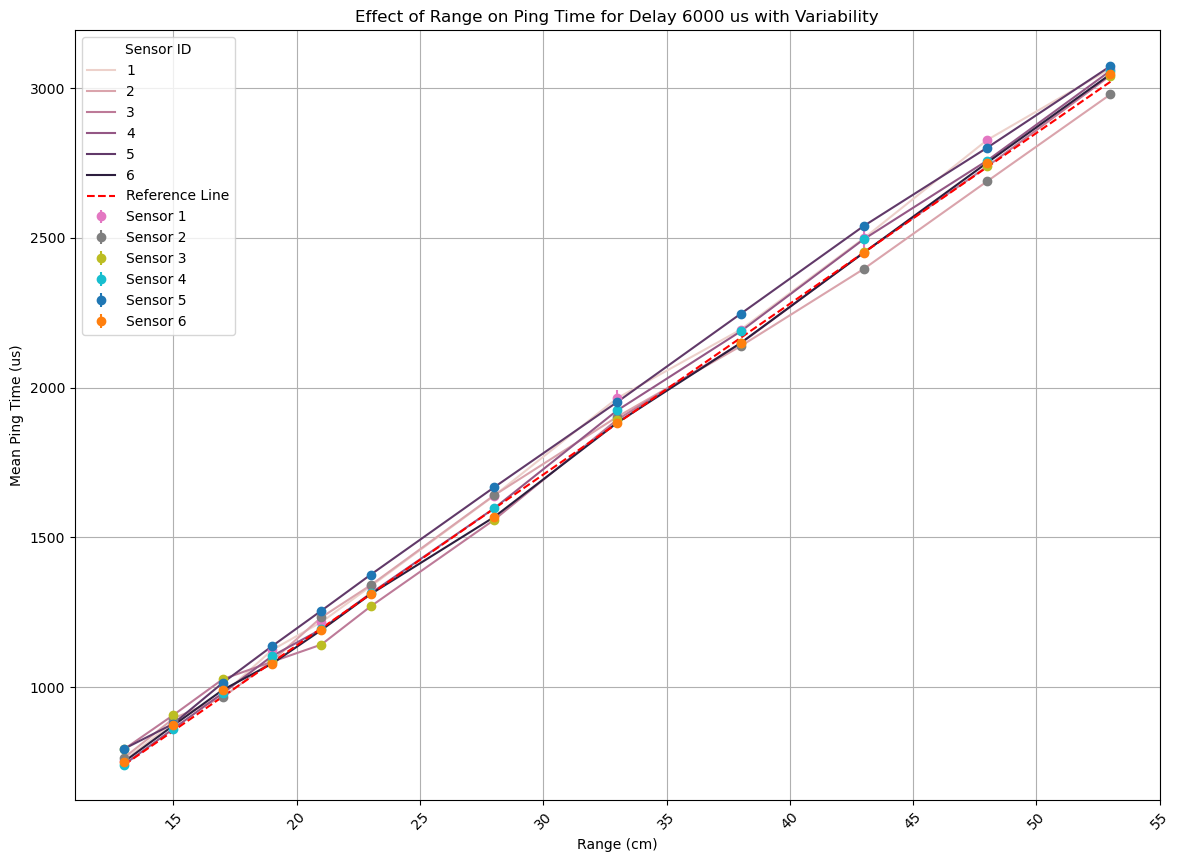

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


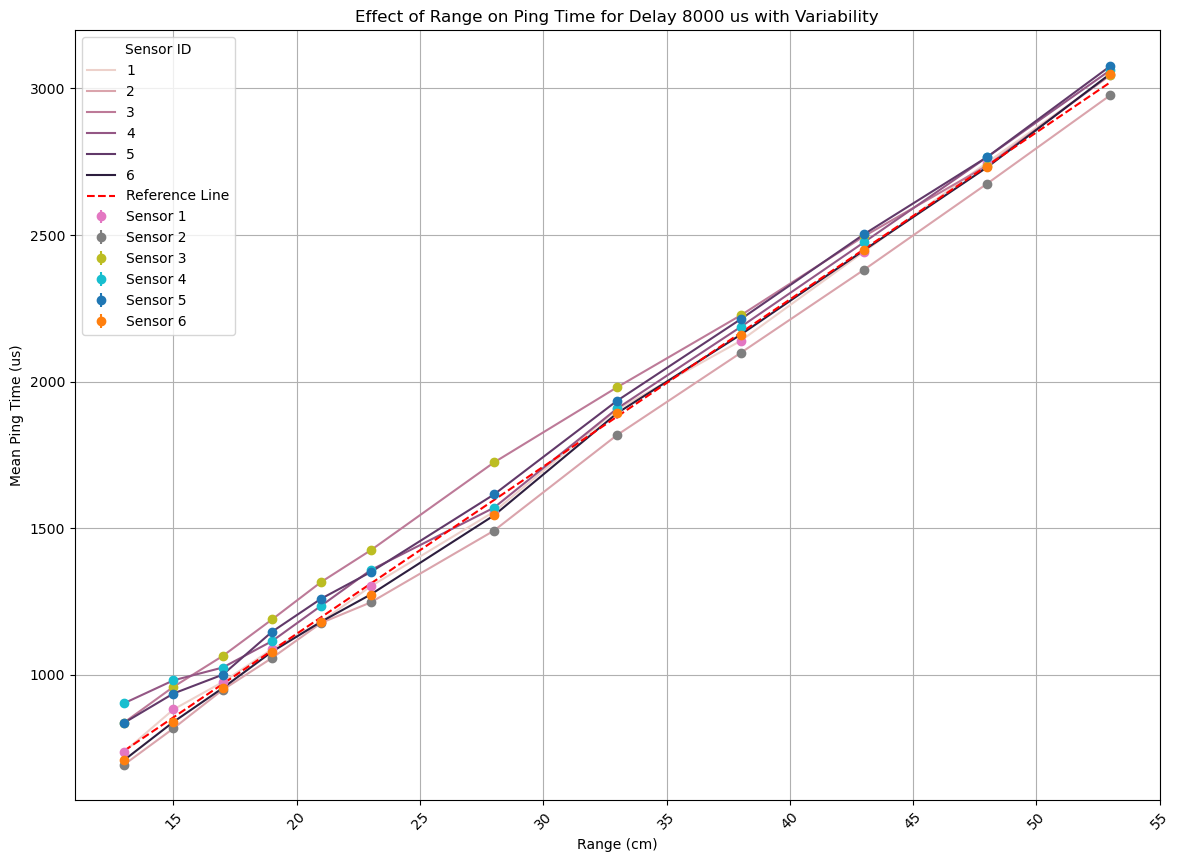

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


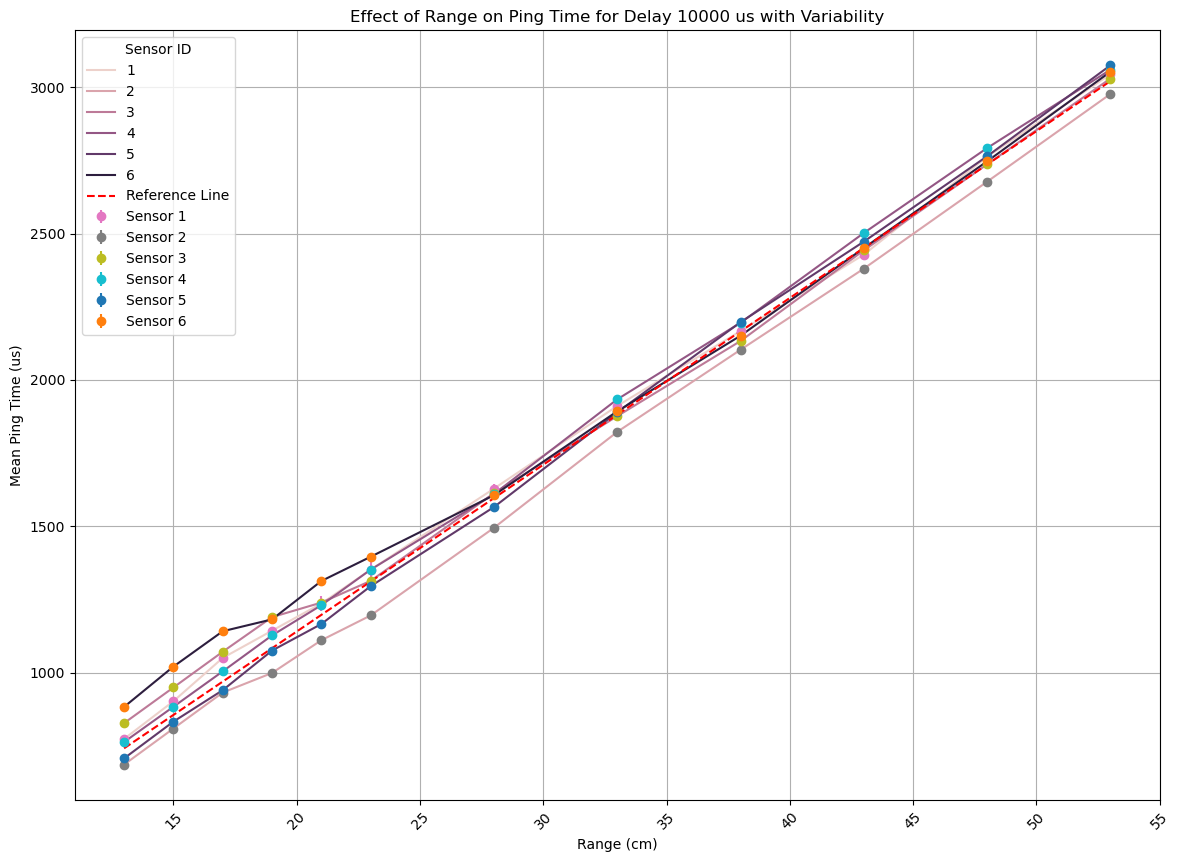

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


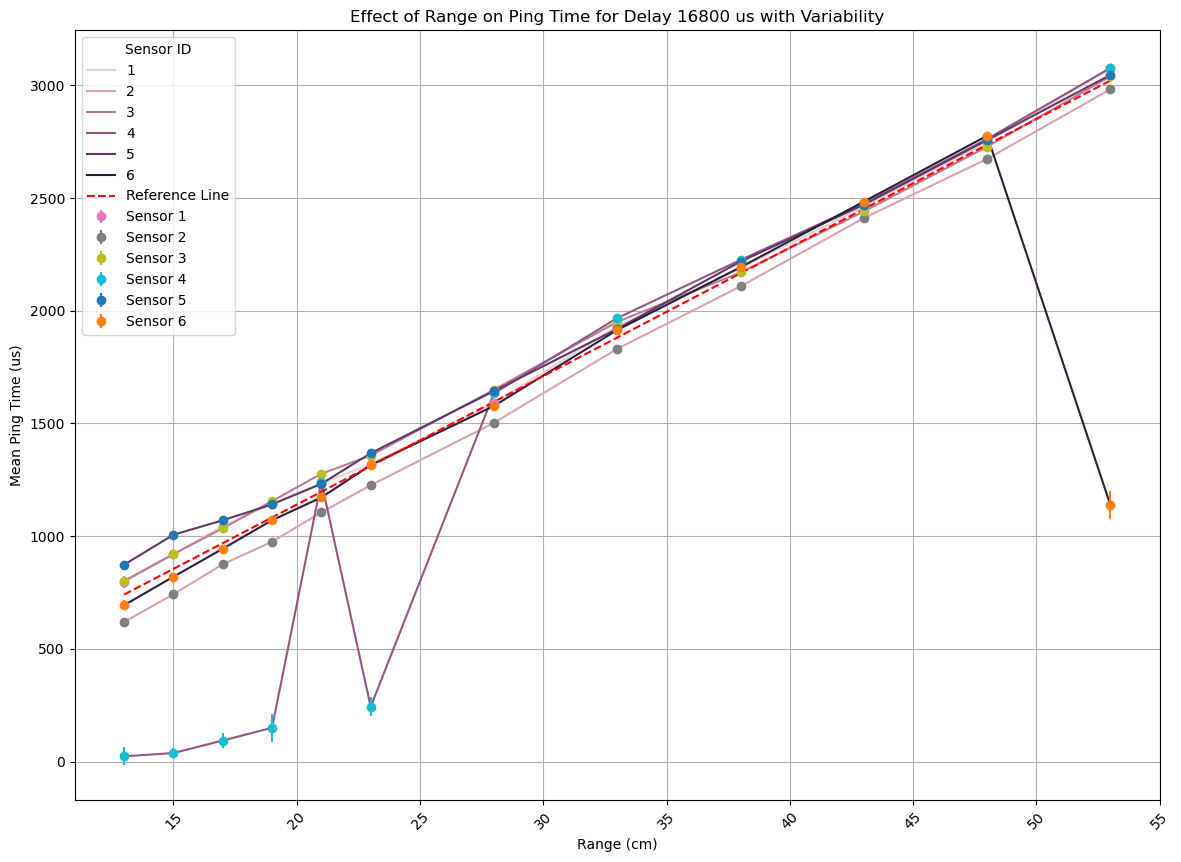

In [30]:
visualize_lineplot_ping_time_with_variability(df_removed_outliers)

### Investigate lower and upper bounds

From this analysis we will see if they will express characters

In [31]:
df_outliers_lower

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  Steps  \
31100      0           6148             15             879        3000  10480   
31101      1           6148             15             879        3000  10480   
31102      2           6148             15             879        3000  10480   
31134     34           6124             15             879        3000  10480   
31137     37           6124             15             879        3000  10480   
...      ...            ...            ...             ...         ...    ...   
66000      0           1368              7             439       16800      0   
66002      2           1492              9             559       16800      0   
66004      4           1560             11             627       16800      0   
66006      6           1656             12             727       16800      0   
66008      8           1776             14             847       16800      0   

       Arduino ID  Sensor ID  Range (cm) Color of sensor Surface material  
31100           1          1          13               b             wood  
31101           1          1          13               b             wood  
31102           1          1          13               b             wood  
31134           1          1          13               b             wood  
31137           1          1          13               b             wood  
...           ...        ...         ...             ...              ...  
66000           1          6          53               b             wood  
66002           1          6          53               b             wood  
66004           1          6          53               b             wood  
66006           1          6          53               b             wood  
66008           1          6          53               b             wood  

[7172 rows x 11 columns]

In [32]:
df_outliers_upper

Trial  Ping Duration  Distance (cm)  Ping Time (us)  Delay (us)  Steps  \
31106      6           6128             15             887        3000  10480   
31109      9           6128             15             887        3000  10480   
31112     12           6128             15             887        3000  10480   
31115     15           6128             15             887        3000  10480   
31116     16           6128             15             887        3000  10480   
...      ...            ...            ...             ...         ...    ...   
66001      1           2660             30            1731       16800      0   
66003      3           2592             29            1659       16800      0   
66005      5           2520             27            1595       16800      0   
66007      7           2428             26            1495       16800      0   
66009      9           2296             24            1375       16800      0   

       Arduino ID  Sensor ID  Range (cm) Color of sensor Surface material  
31106           1          1          13               b             wood  
31109           1          1          13               b             wood  
31112           1          1          13               b             wood  
31115           1          1          13               b             wood  
31116           1          1          13               b             wood  
...           ...        ...         ...             ...              ...  
66001           1          6          53               b             wood  
66003           1          6          53               b             wood  
66005           1          6          53               b             wood  
66007           1          6          53               b             wood  
66009           1          6          53               b             wood  

[8426 rows x 11 columns]

#### Visualize the lower bound and upper bound effect on ping time

First we will look at the effect on ping time graph

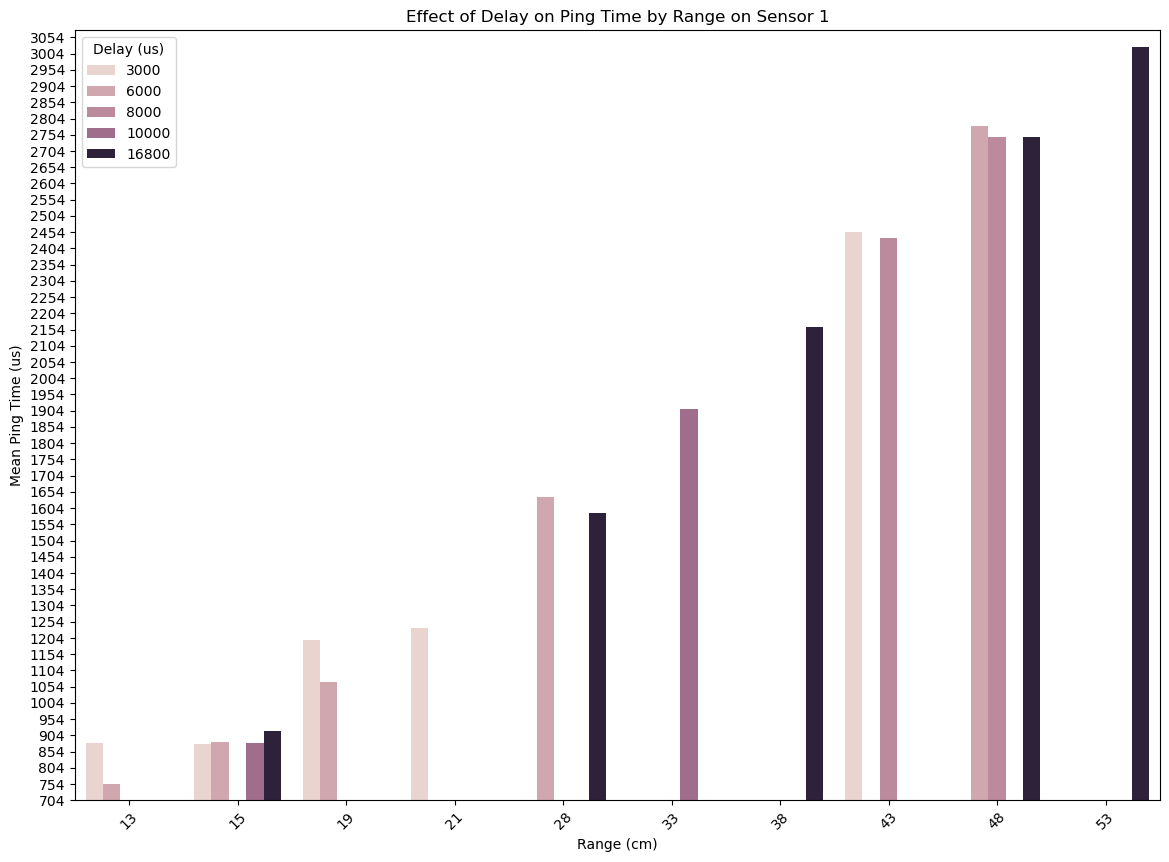

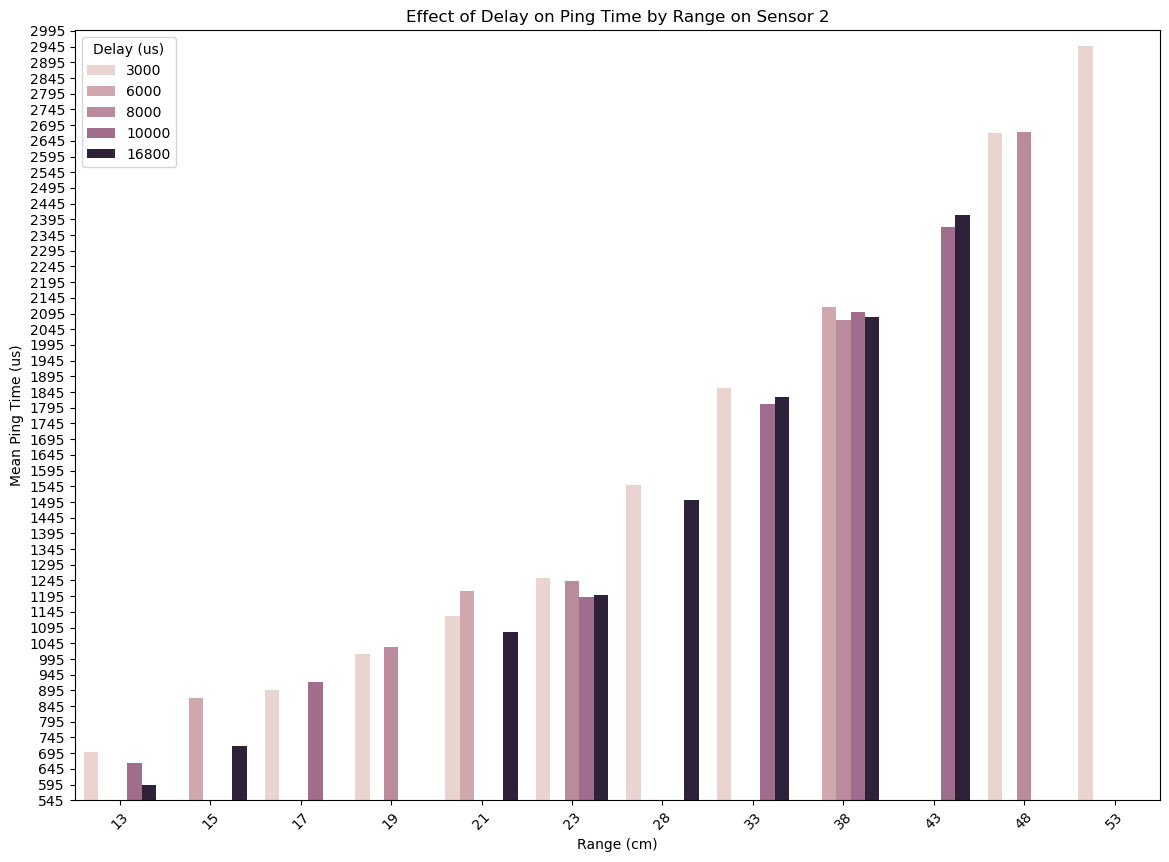

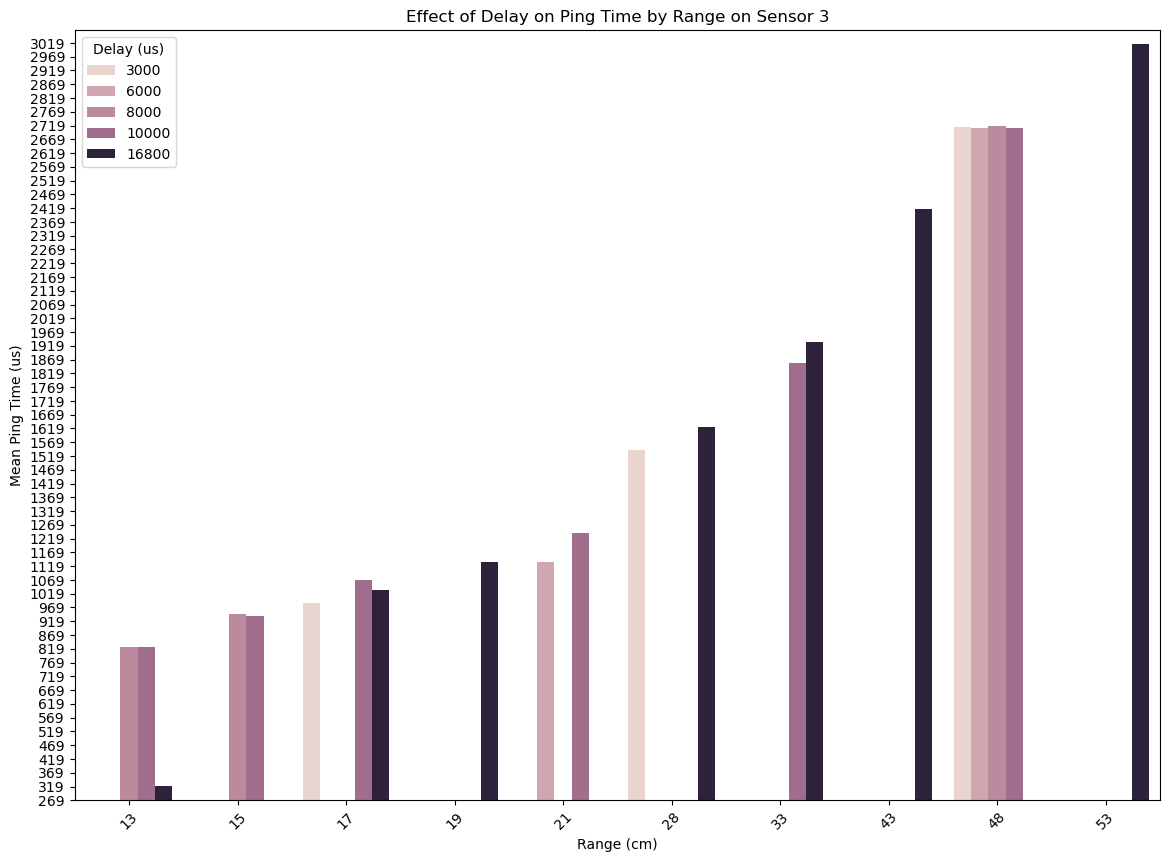

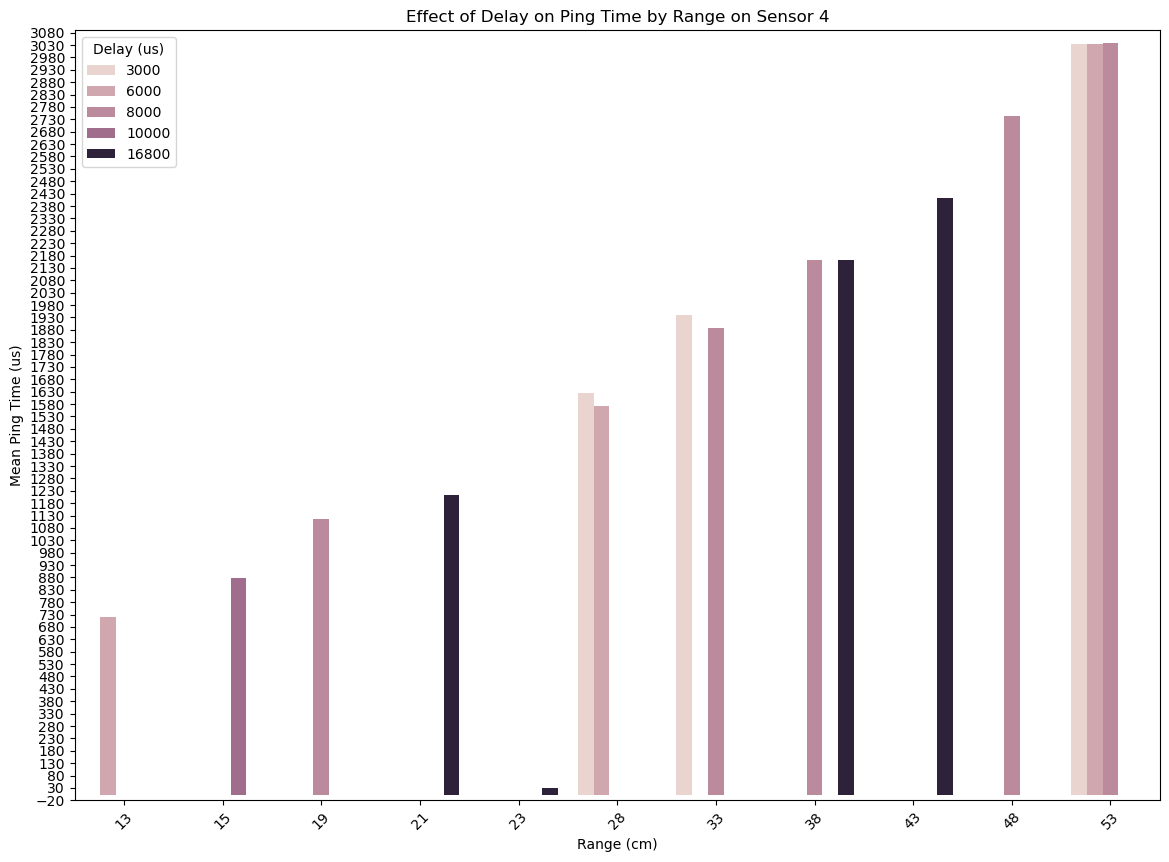

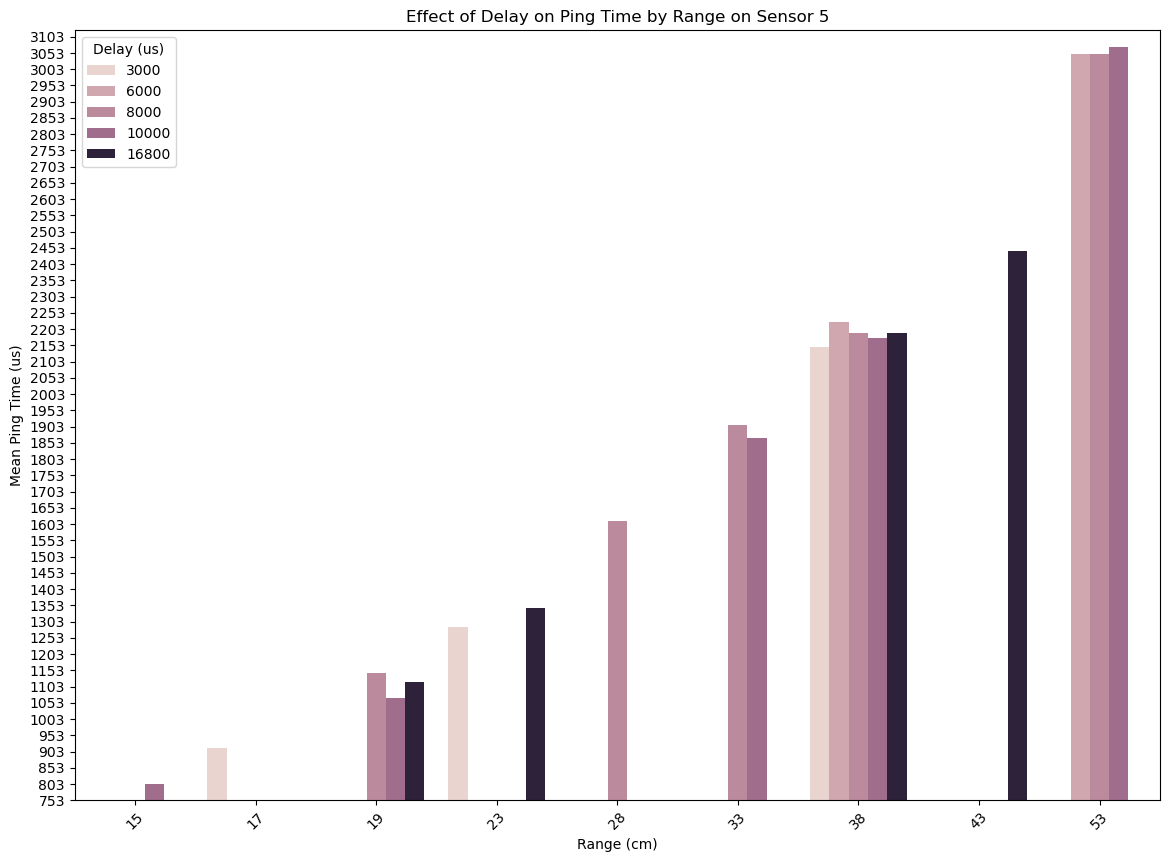

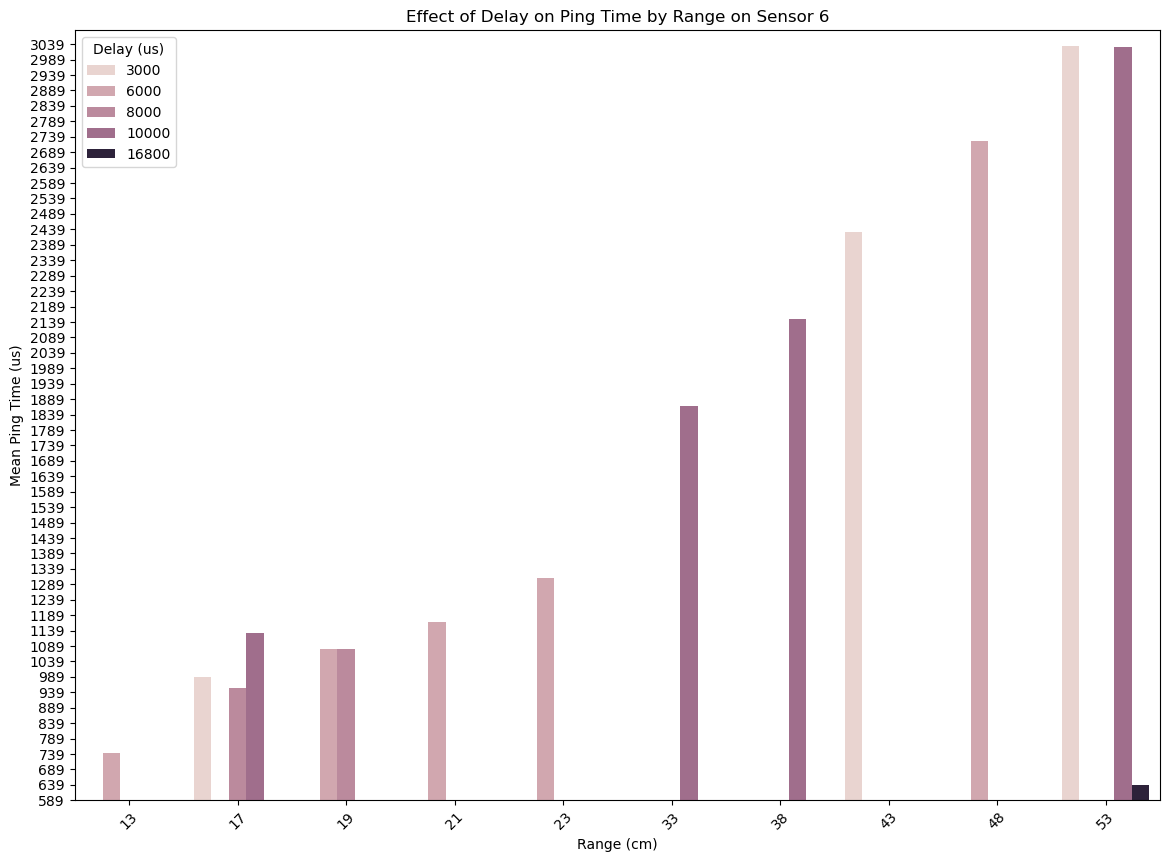

In [33]:
visualize_effect_on_ping_time_sensors(df_outliers_lower)

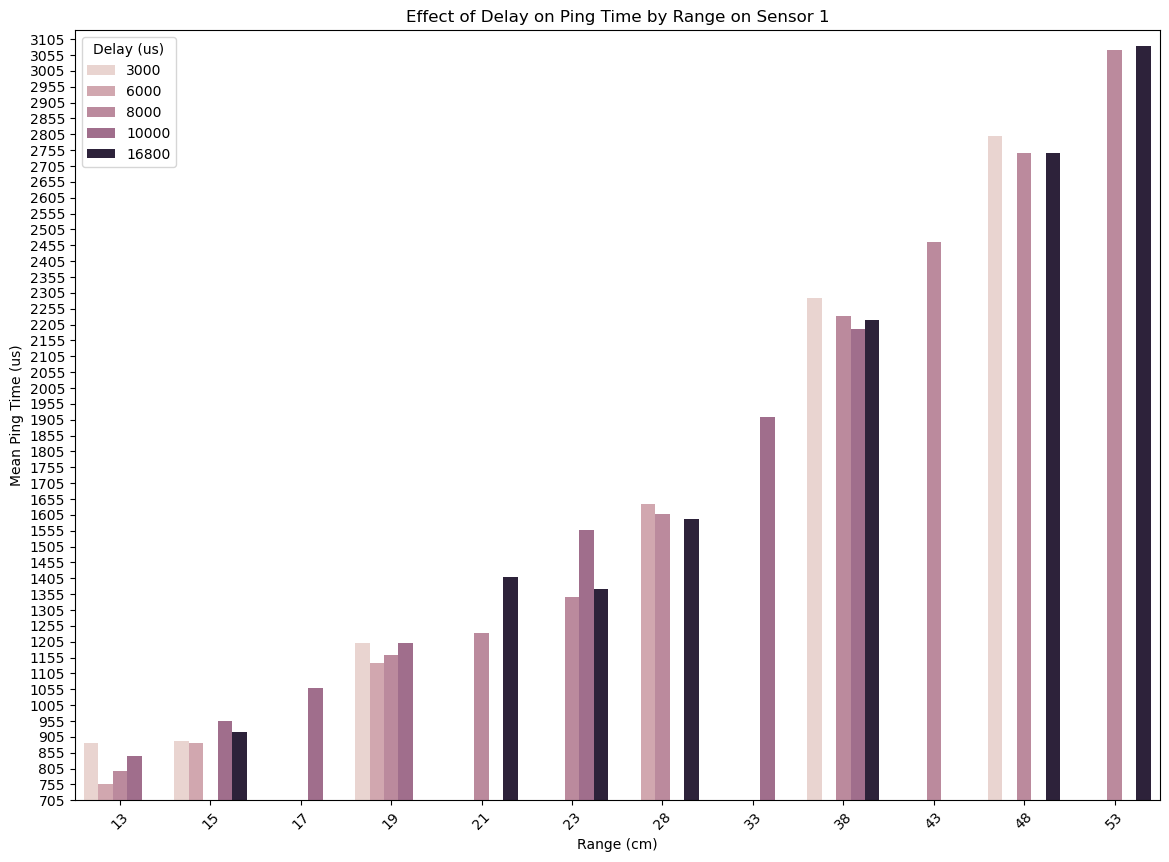

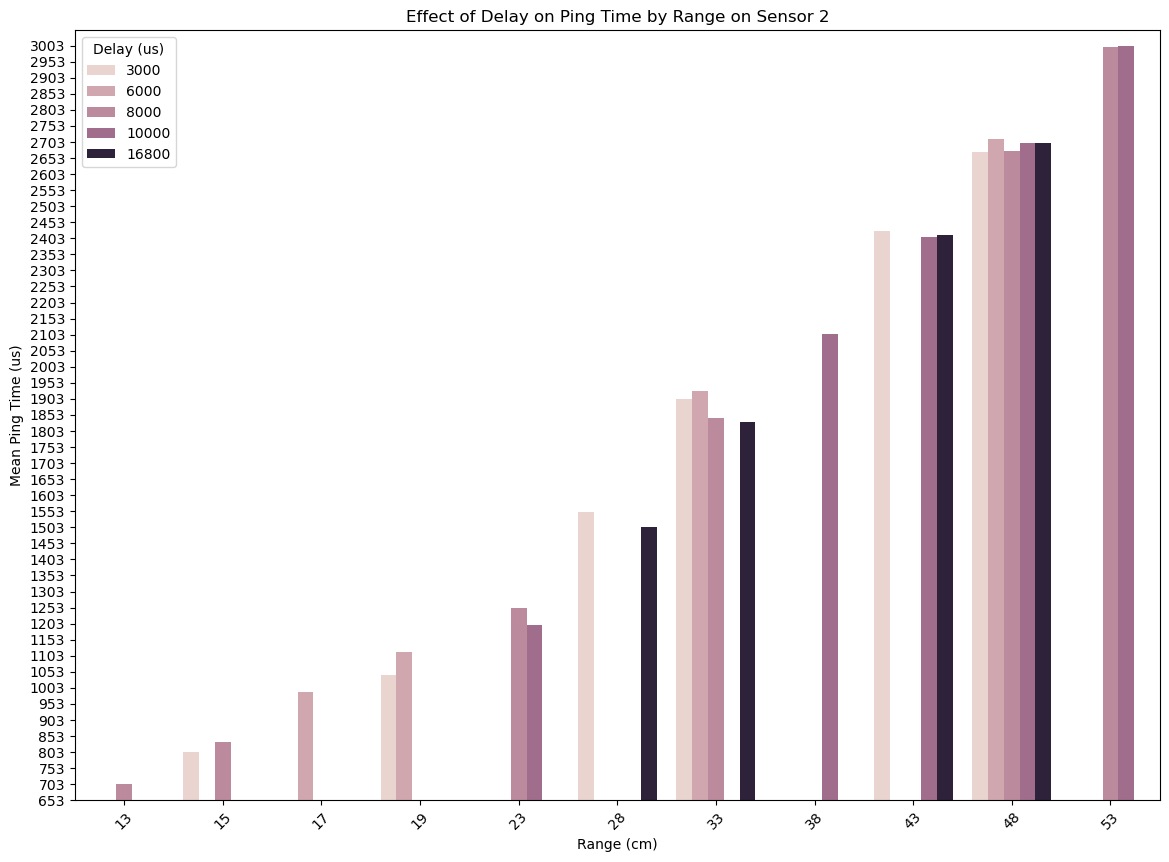

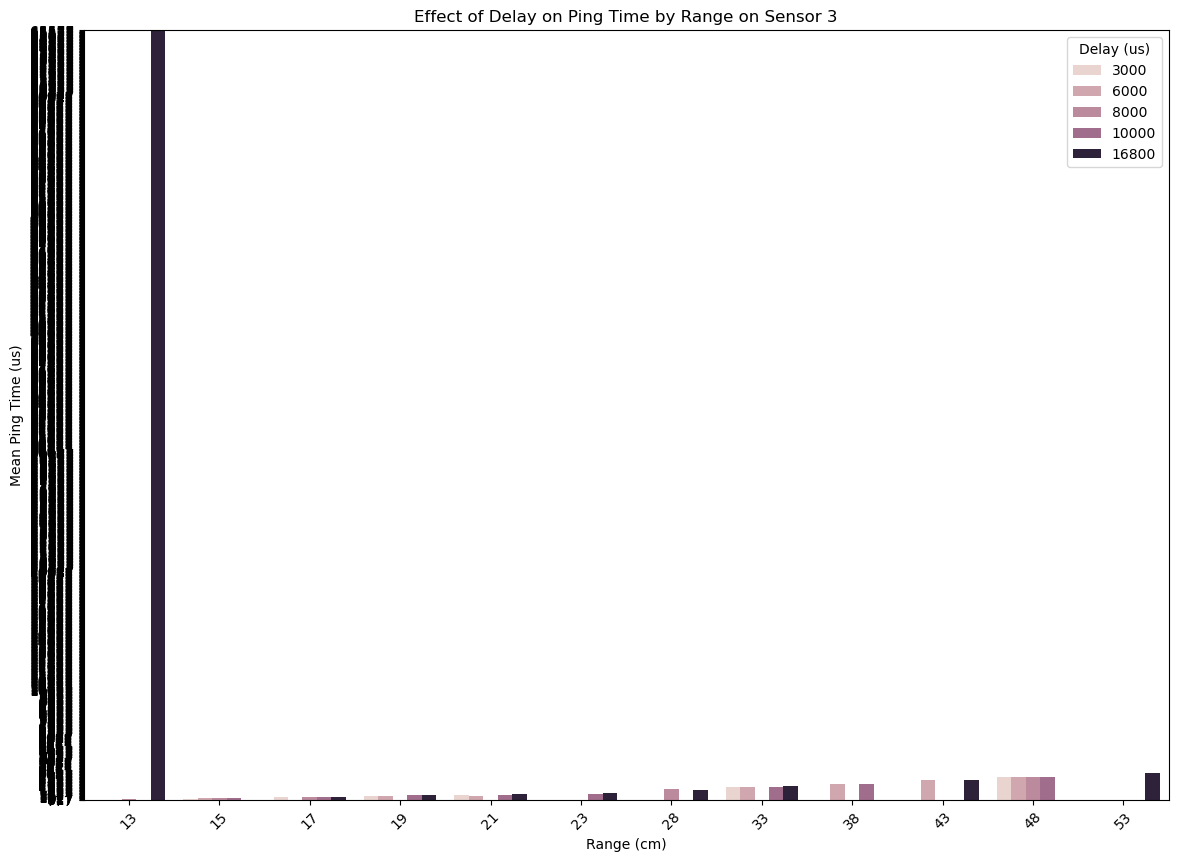

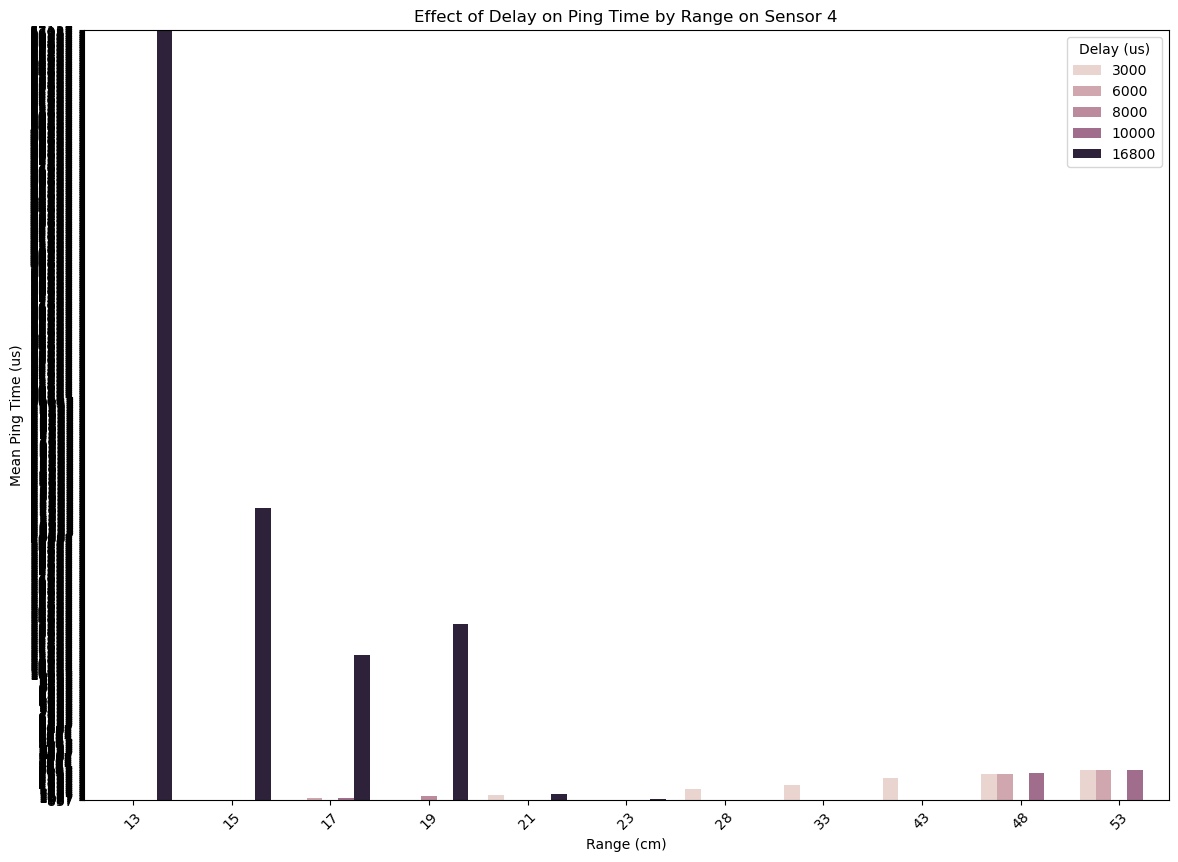

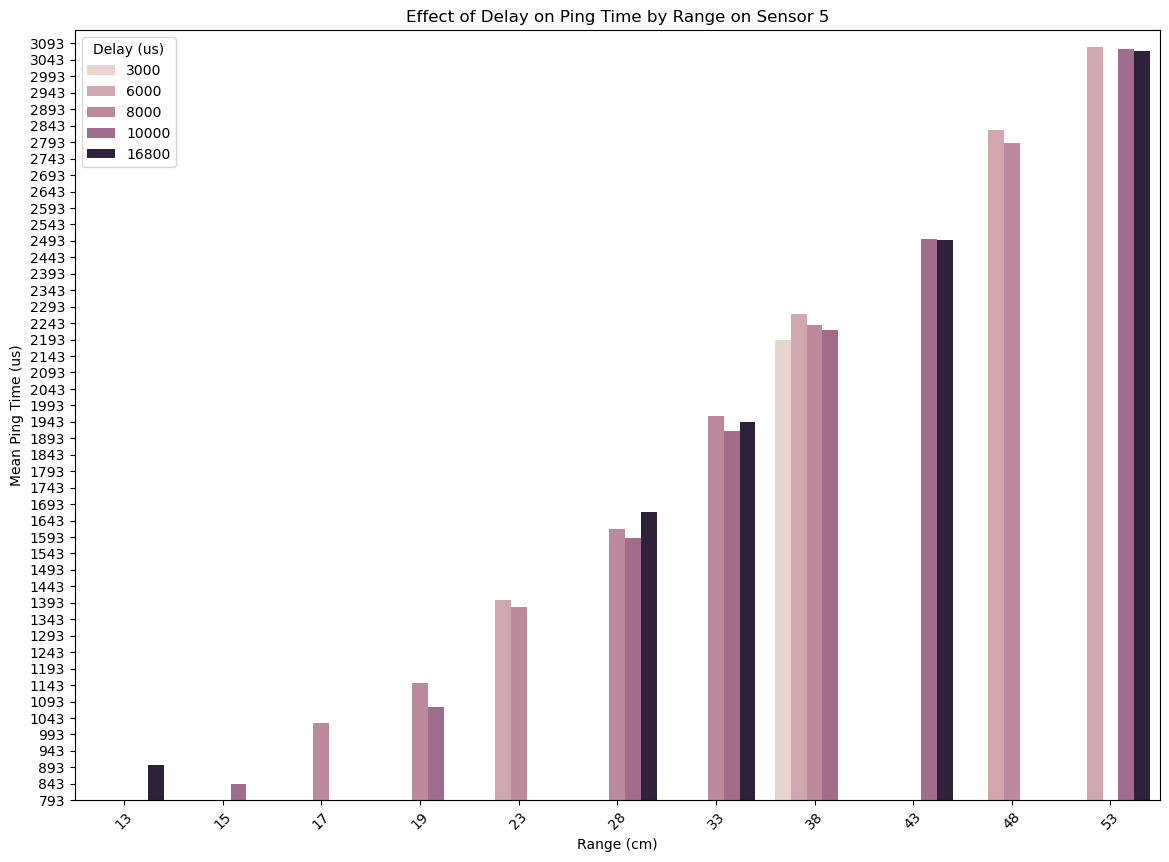

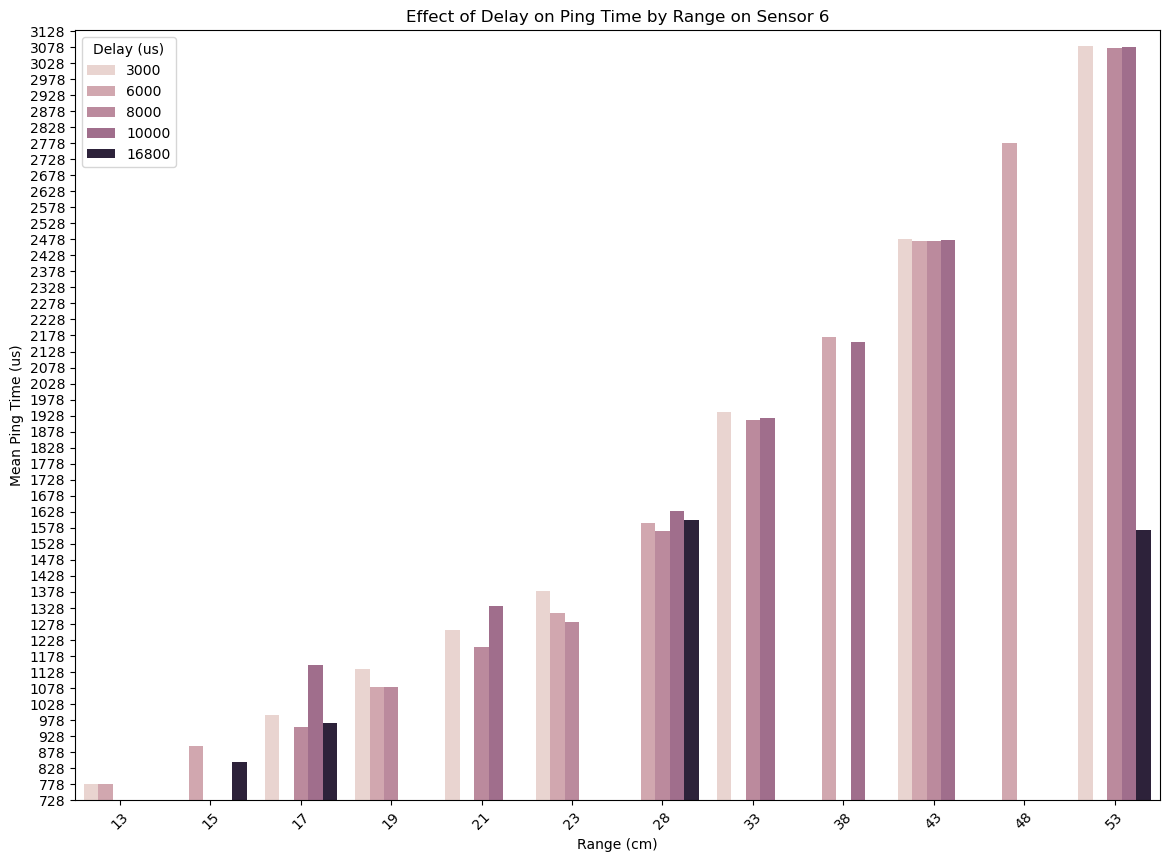

In [34]:
visualize_effect_on_ping_time_sensors(df_outliers_upper)

It does have some different patterns for each sensors this info might also be considered to be used later for characterization.

another thing that are noticable is the frequency and next we will be investigating on frequency

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


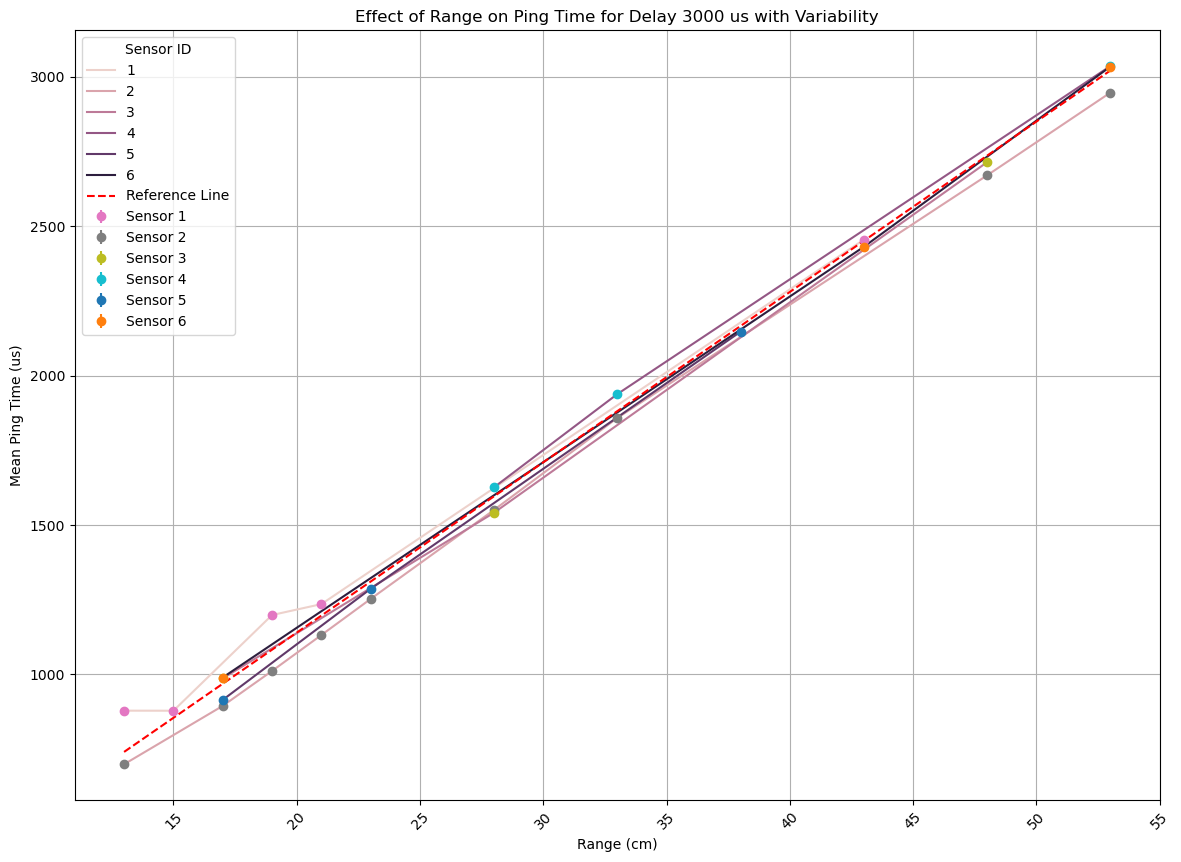

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


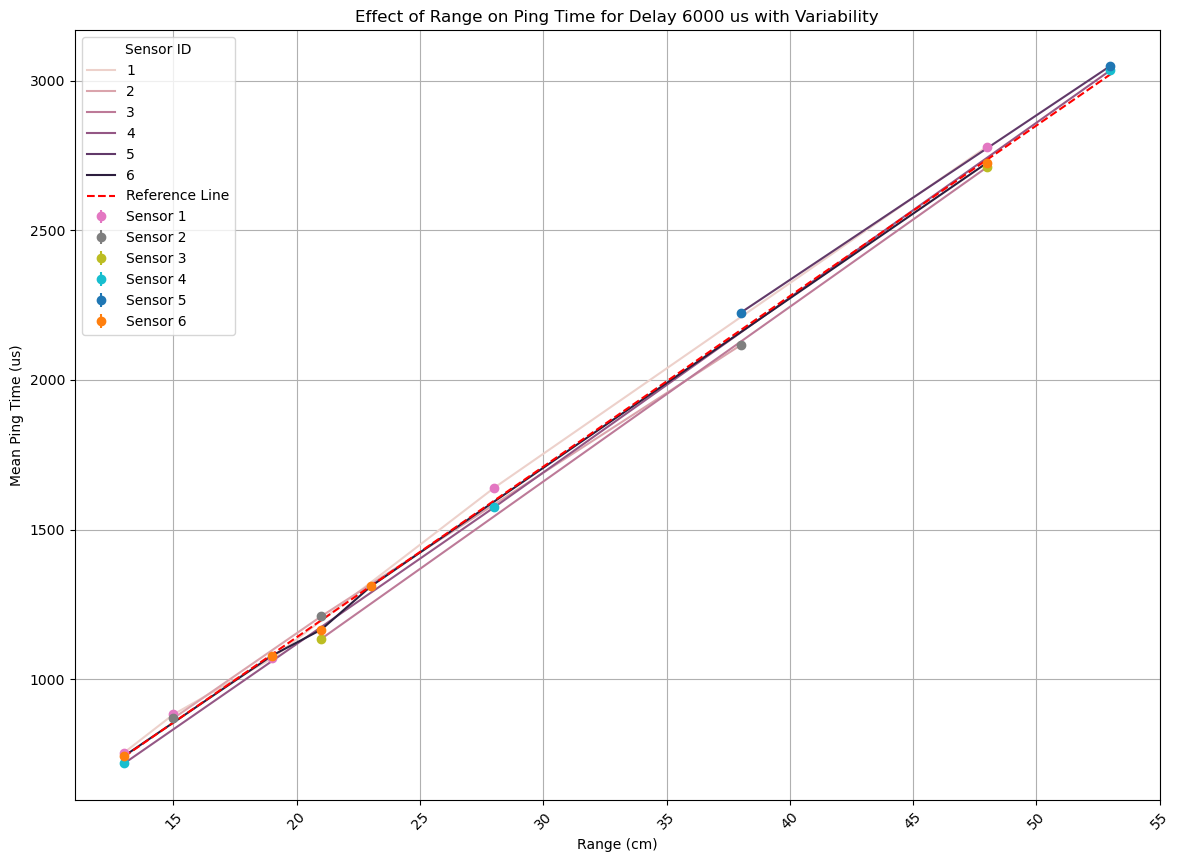

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


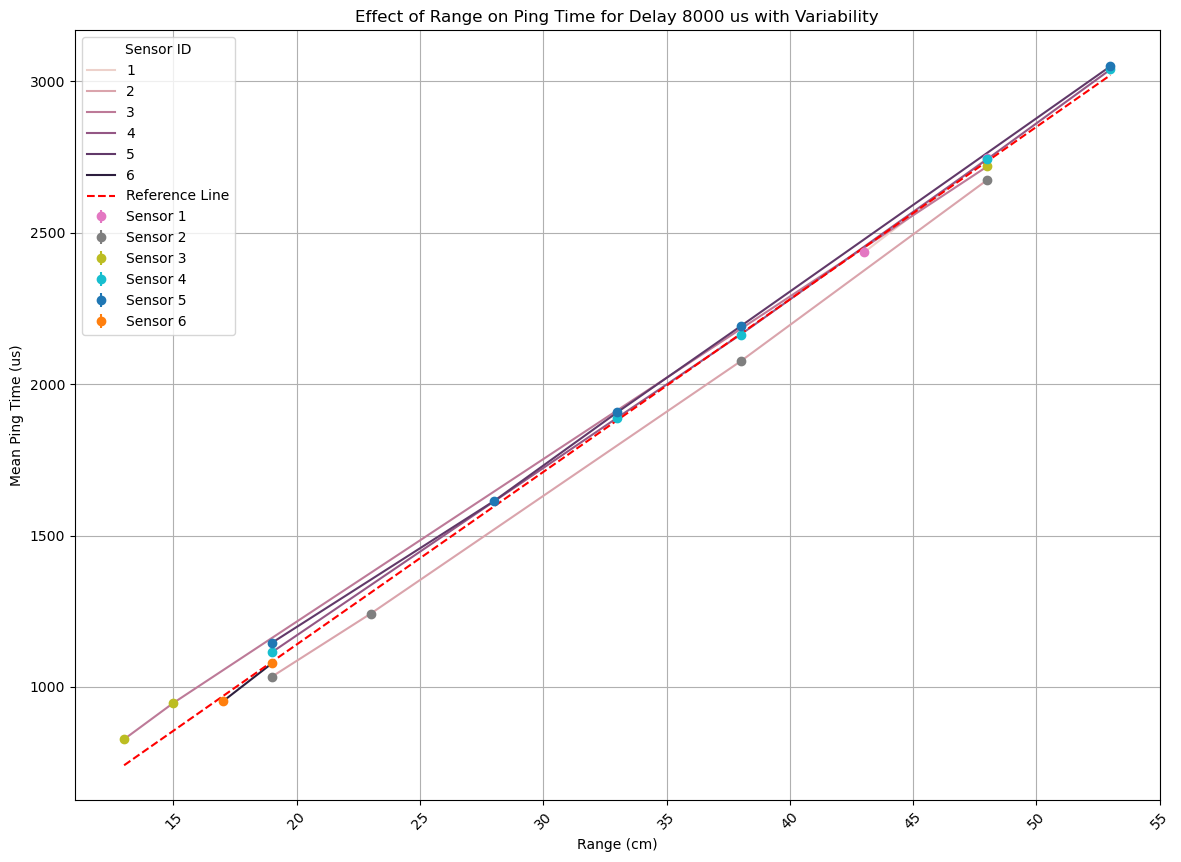

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


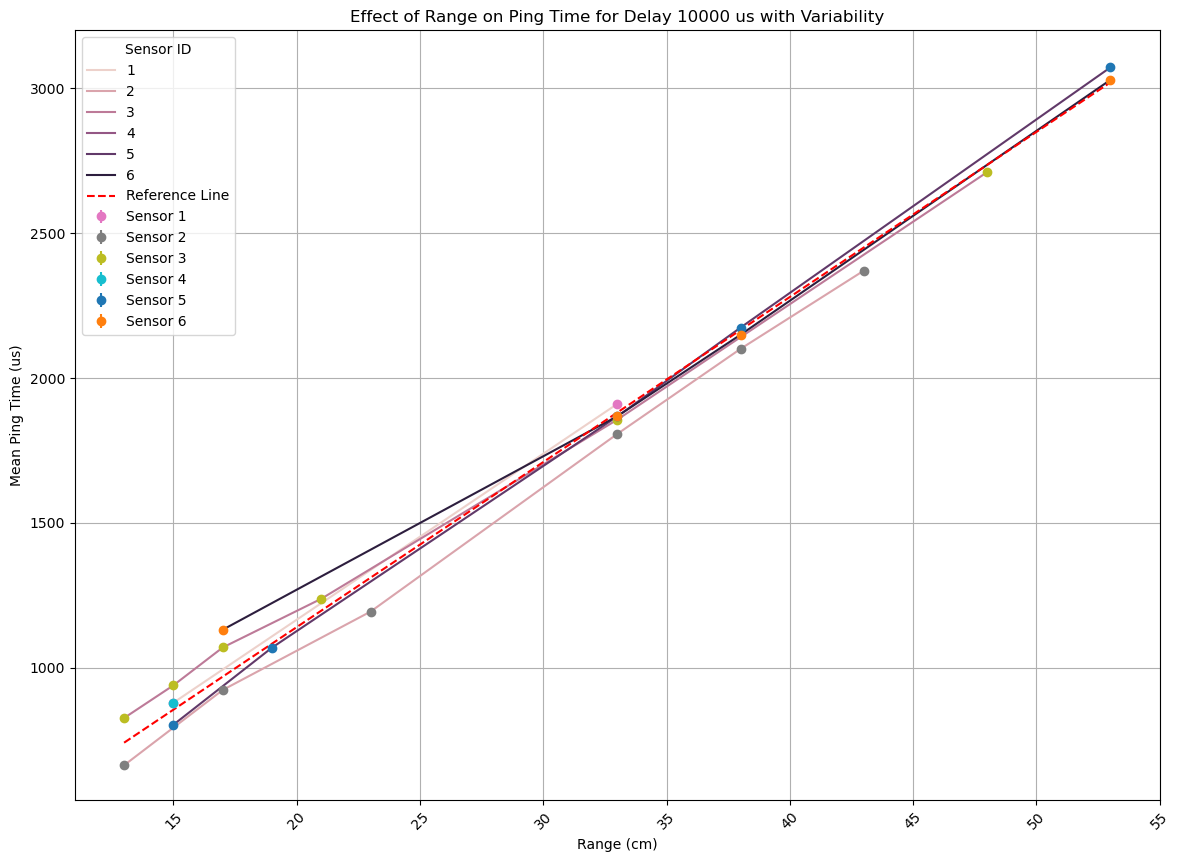

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


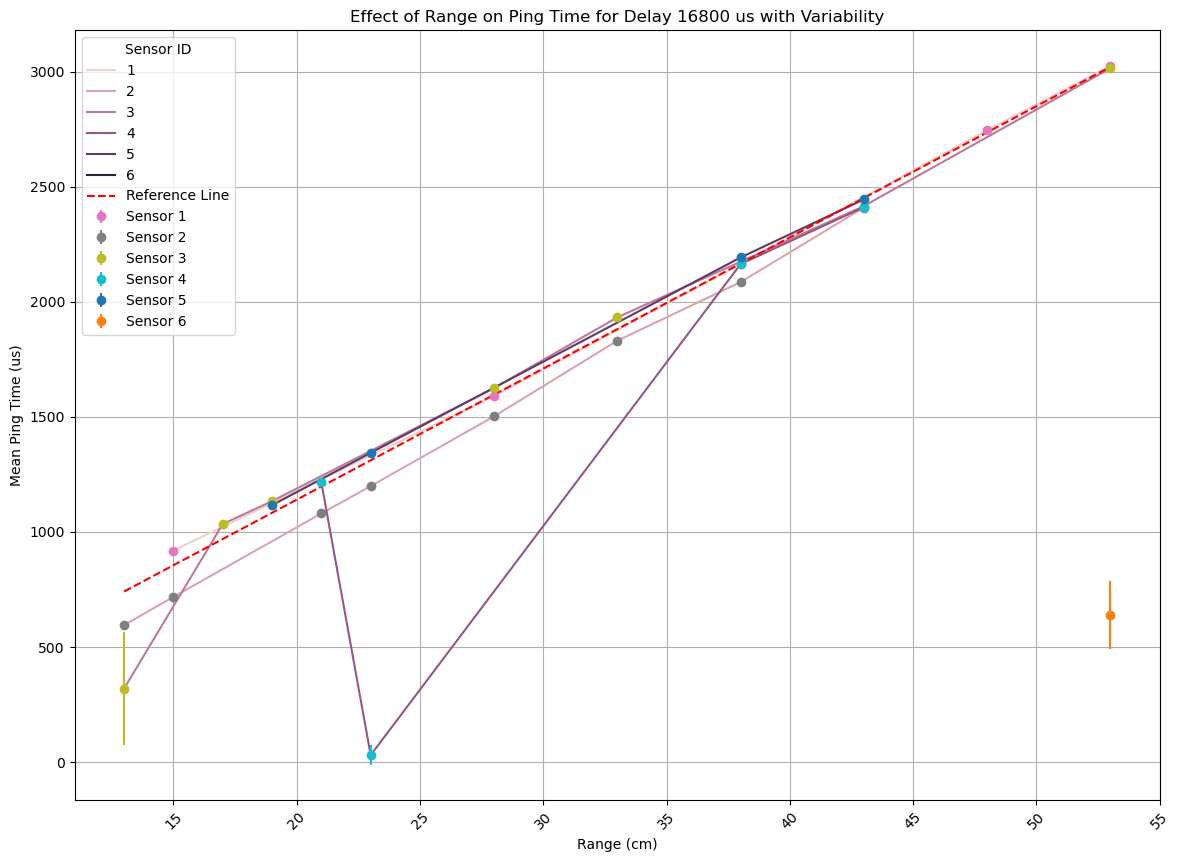

In [35]:
visualize_lineplot_ping_time_with_variability(df_outliers_lower)

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


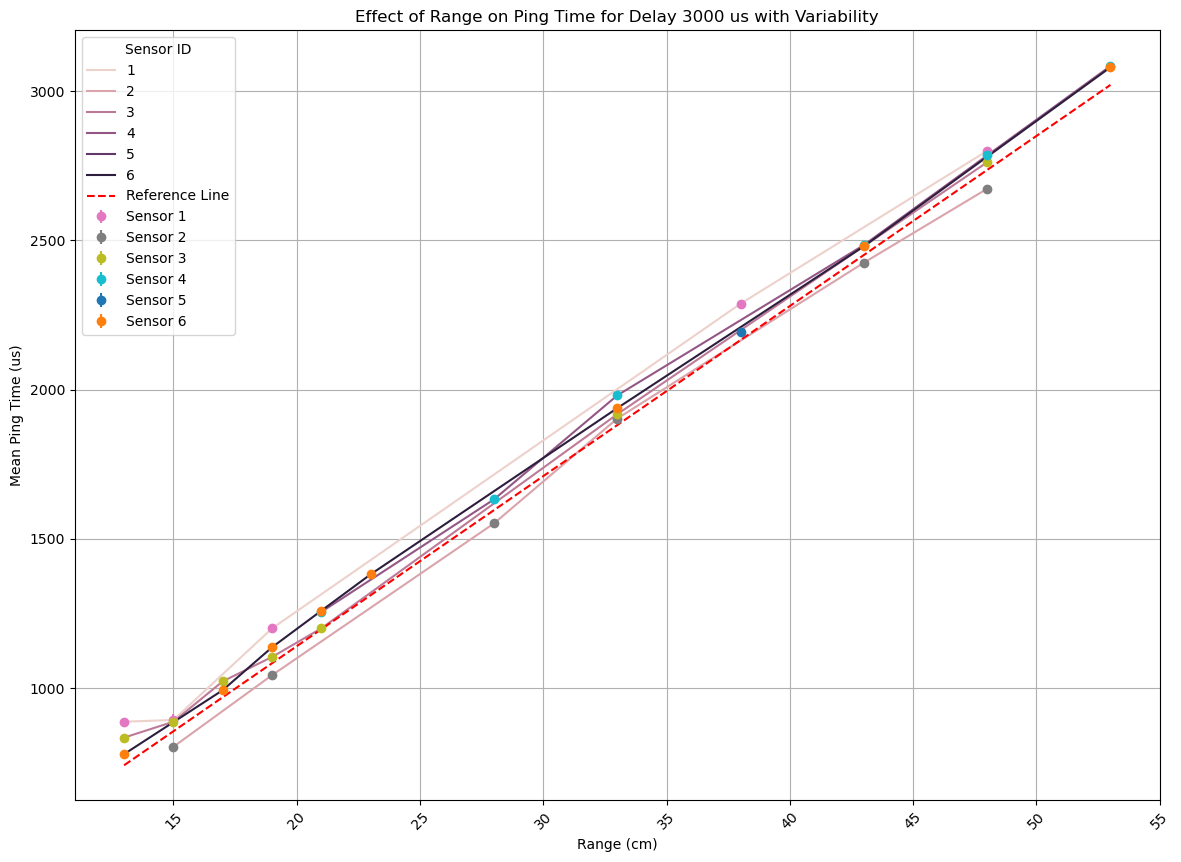

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


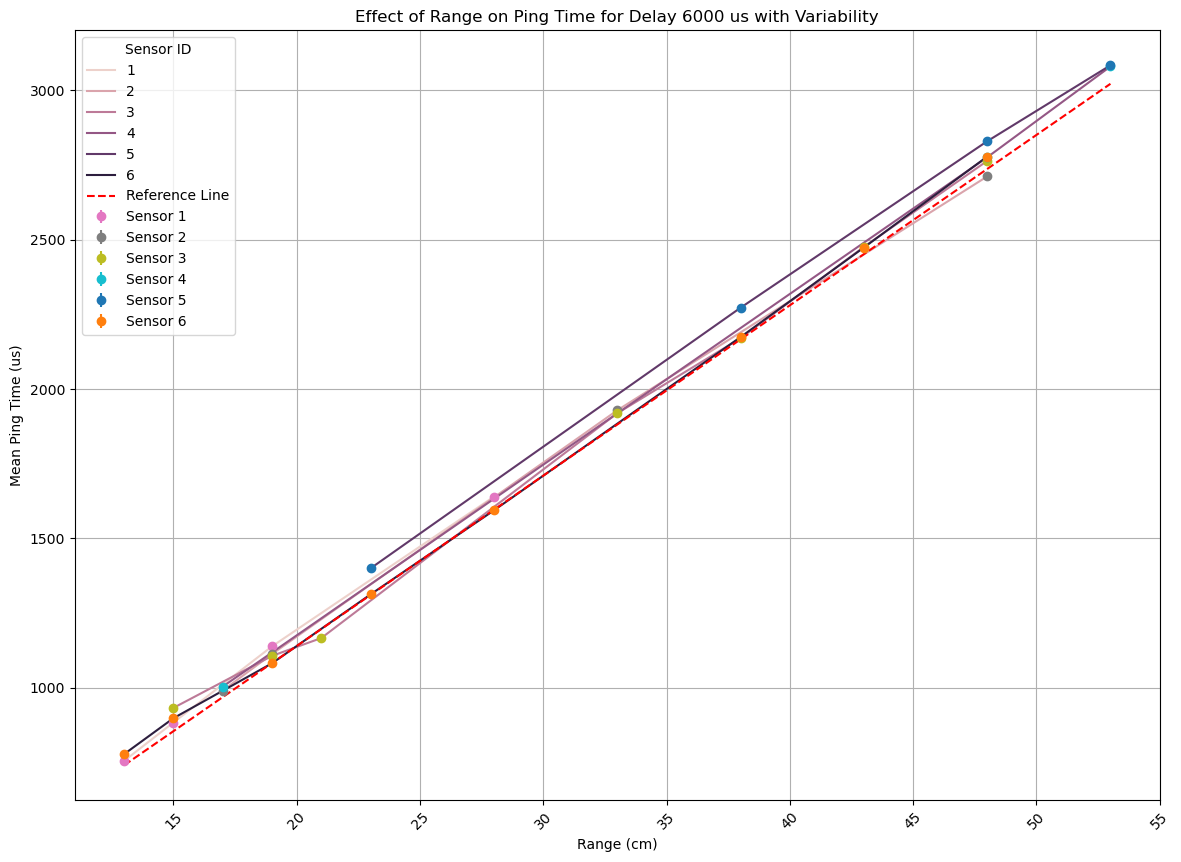

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


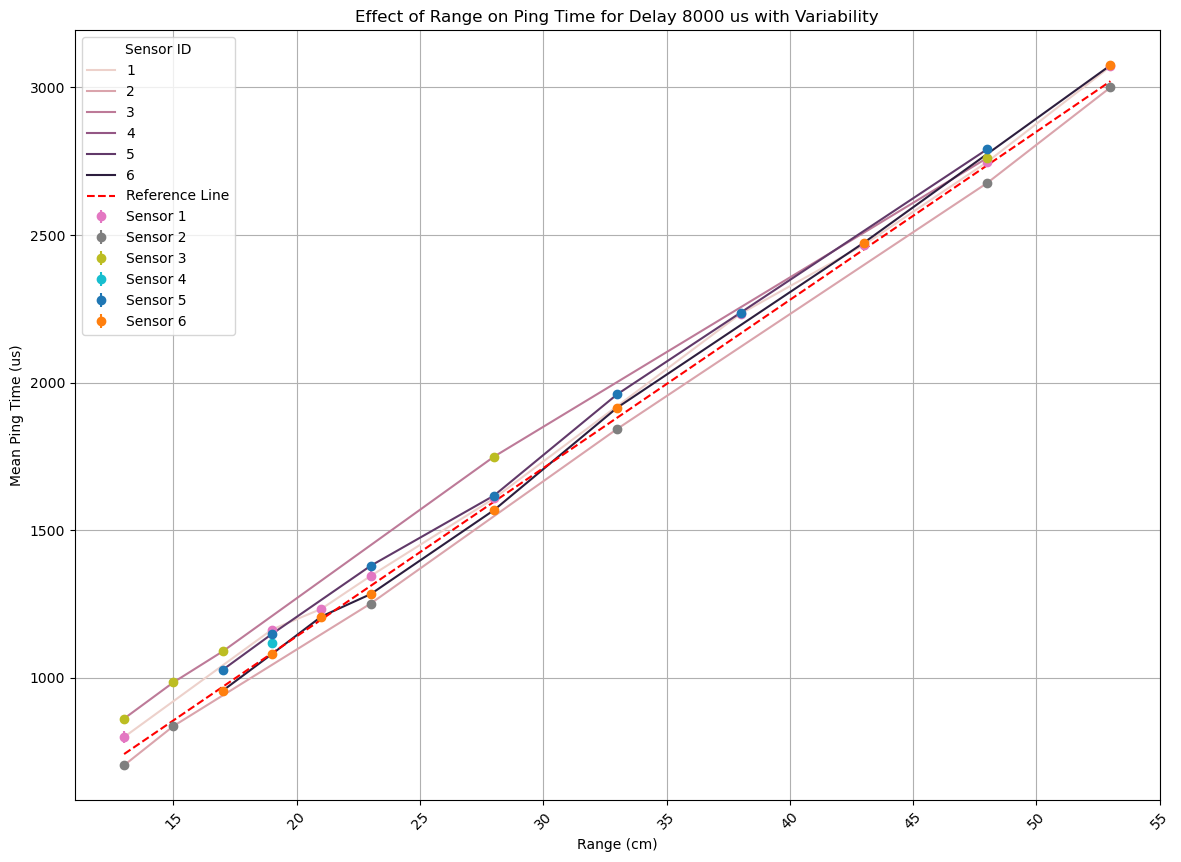

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


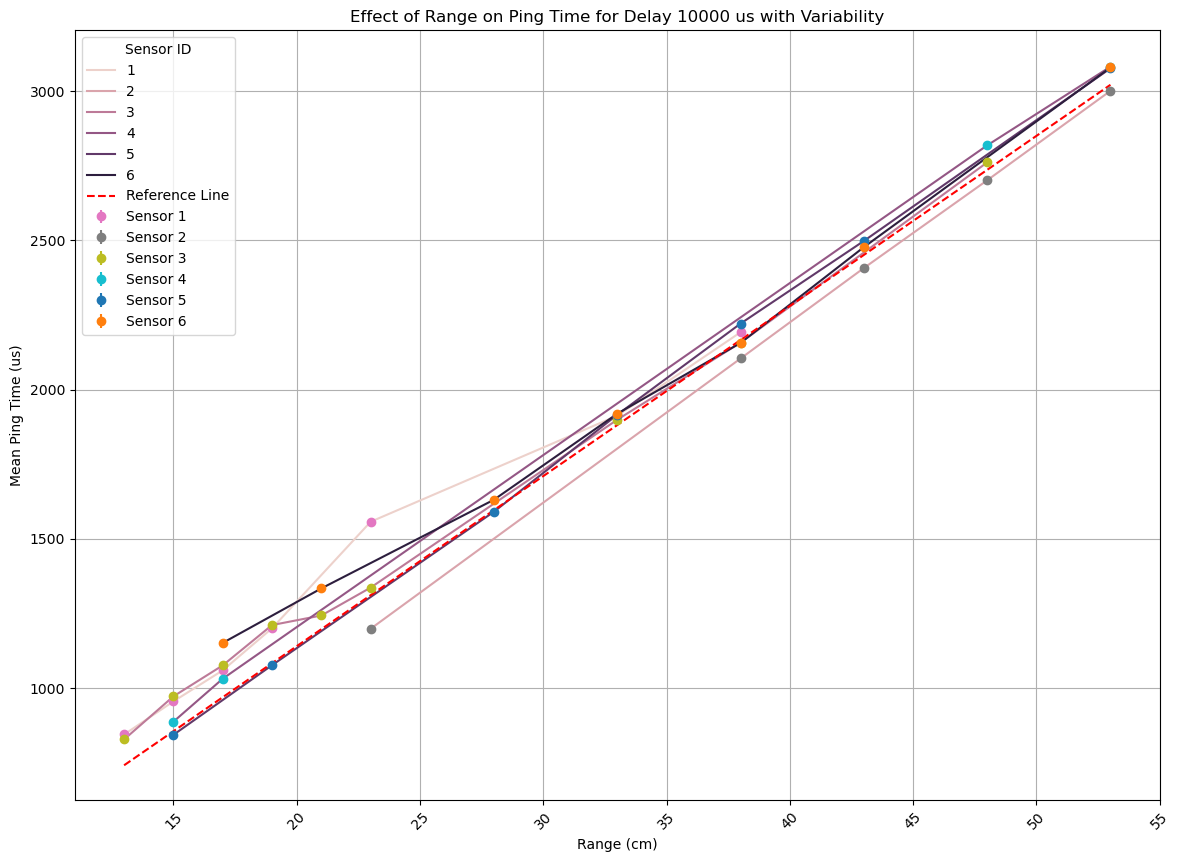

C:\Users\Jihoon.DESKTOP-1HIBMQO\AppData\Local\Temp\ipykernel_4304\2302568329.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(


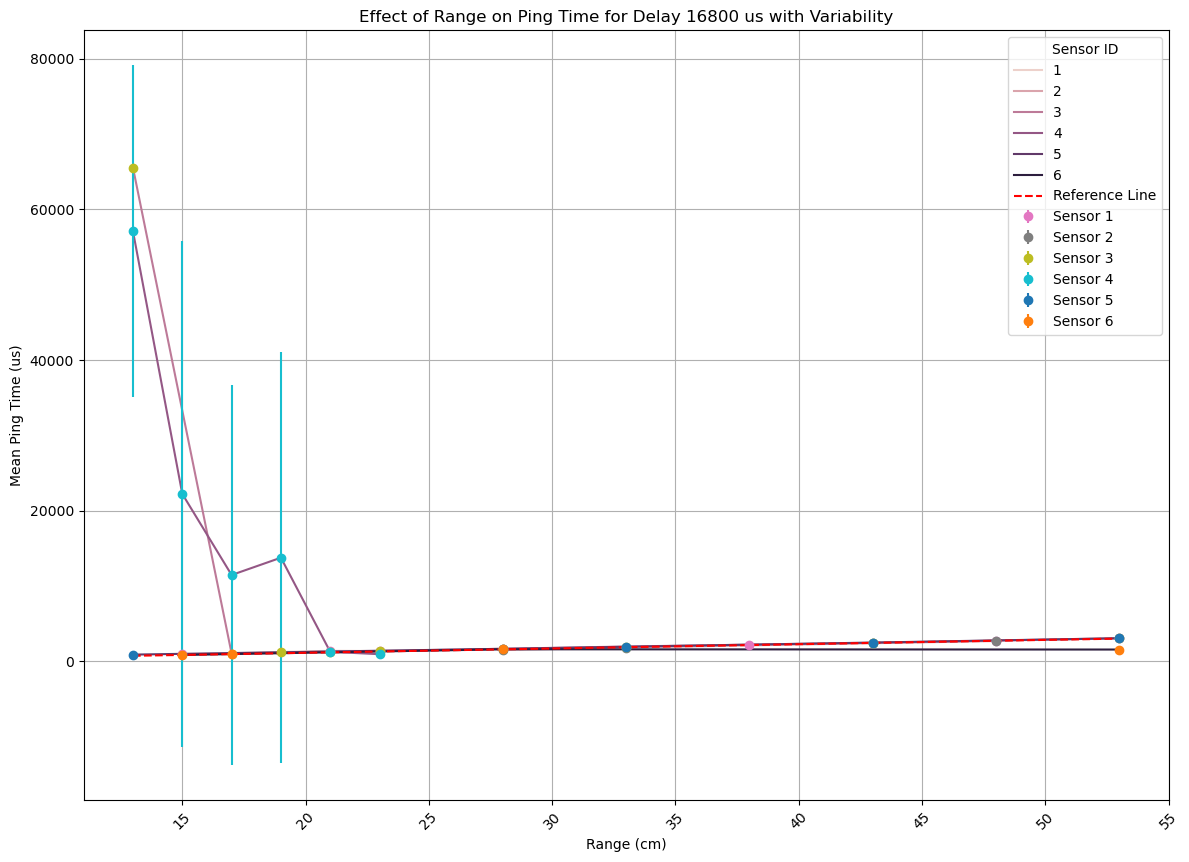

In [36]:
visualize_lineplot_ping_time_with_variability(df_outliers_upper)

#### Investigate Frequency on lower and upper bound

In [37]:
df_outliers_lower.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count()

Sensor ID  Delay (us)
1          3000          264
           6000          526
           8000          194
           10000         182
           16800         572
2          3000          496
           6000          108
           8000          272
           10000         350
           16800         628
3          3000           40
           6000            4
           8000            6
           10000         510
           16800         290
4          3000          192
           6000           42
           8000          250
           10000          44
           16800          50
5          3000           58
           6000           44
           8000          400
           10000         338
           16800         142
6          3000          212
           6000          408
           8000          330
           10000         210
           16800          10
Name: Ping Time (us), dtype: int64

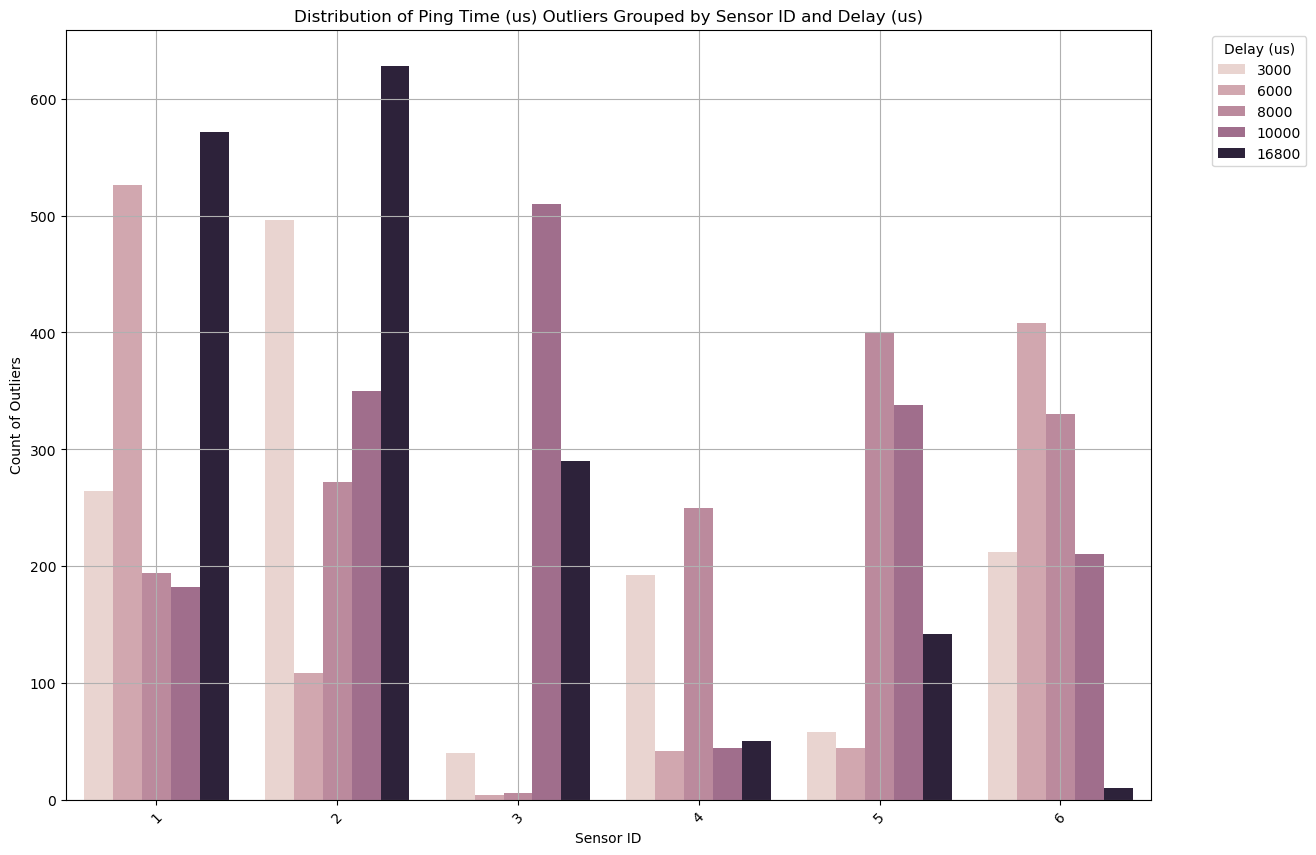

In [38]:
# Group the outliers by 'Sensor ID' and 'Delay (us)'
grouped_outliers = df_outliers_lower.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count().reset_index()

# Plot the distribution of outliers
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Sensor ID', 
    y='Ping Time (us)', 
    hue='Delay (us)', 
    data=grouped_outliers
)
plt.title('Distribution of Ping Time (us) Outliers Grouped by Sensor ID and Delay (us)')
plt.xlabel('Sensor ID')
plt.ylabel('Count of Outliers')
plt.legend(title='Delay (us)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [39]:
df_outliers_upper.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count()

Sensor ID  Delay (us)
1          3000          344
           6000          546
           8000          296
           10000         272
           16800         590
2          3000          370
           6000           60
           8000          268
           10000         328
           16800         498
3          3000          168
           6000          162
           8000          124
           10000         628
           16800         372
4          3000          294
           6000           40
           8000          194
           10000         104
           16800         104
5          3000            8
           6000           90
           8000          440
           10000         476
           16800         112
6          3000          274
           6000          520
           8000          390
           10000         258
           16800          96
Name: Ping Time (us), dtype: int64

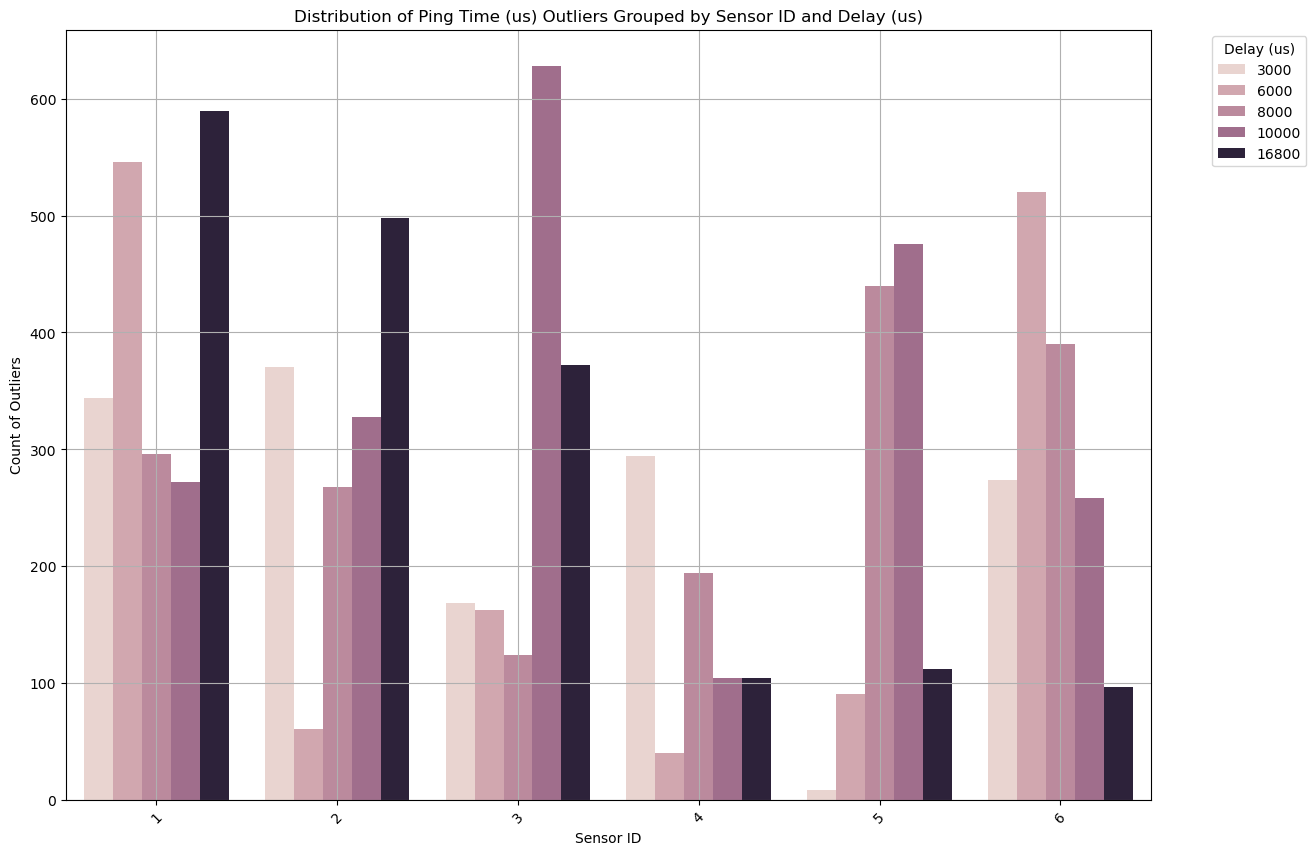

In [40]:
# Group the outliers by 'Sensor ID' and 'Delay (us)'
grouped_upper_outliers = df_outliers_upper.groupby(['Sensor ID', 'Delay (us)'])['Ping Time (us)'].count().reset_index()

# Plot the distribution of outliers
plt.figure(figsize=(14, 10))
sns.barplot(
    x='Sensor ID', 
    y='Ping Time (us)', 
    hue='Delay (us)', 
    data=grouped_upper_outliers
)
plt.title('Distribution of Ping Time (us) Outliers Grouped by Sensor ID and Delay (us)')
plt.xlabel('Sensor ID')
plt.ylabel('Count of Outliers')
plt.legend(title='Delay (us)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Further ideas

Ideas for feature engineering:
- new features related to IQR methods: range_delay_middle, range_delay_lower,range_delay_upper
- Another features which is a product of IQR method: lower_delay_freq and upper_delay_freq 

Ideas for characterization:
- Do feature importance to find out which features are important features like L1... but theres no target. 
- Use anamoly detection without labels -> we can use clustering methods